In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import numpy as np
%matplotlib inline

import seaborn as sns

import pandas as pd

import argparse
import ellc

import gatspy
from gatspy import datasets, periodic
from gatspy.periodic import LombScargleMultiband, LombScargle

import astropy
from astropy import units, constants

import csv
import pylab

from scipy import stats

In [11]:
dat = pd.read_csv('Thesis_dat_42918.csv', sep=",", header=0)
#print (dat)

In [12]:
PeriodIn = dat["PERIOD"]
PeriodOut = dat["LSM_PERIOD"]
INCL = dat["INCLINATION"]
MIN_INCL = dat["MIN_INCLINATION"]
mass_1 = dat["MASS_1"]
mass_2 = dat["MASS_2"]
mass_rat = mass_2/mass_1
radius_1 = dat["RADIUS_1"]
radius_2 = dat["RADIUS_2"]
radius_rat = radius_2/radius_1
AppMagError = dat["appmag_error"]
InclinationError = dat["inclination_error"]
PeriodError = dat["period_error"]
RadiusError = dat["radius_error"]
#will change to just radius_error for new data
MaxAppmag = dat["max(app_magnitude)"]
delta_mag = dat["delta_mag"]
Chi2 = dat["chi2"]
delmag = abs(MaxAppmag - delta_mag)
Avg_sigma = dat["mean(dmag)"]
dist_kpc = dat['dist_kpc']
ecc = dat['eccentricity']
Sigma_Period_Whole = abs(PeriodOut - PeriodIn)/PeriodIn
Sigma_Period_Half = abs(PeriodOut - 0.5*PeriodIn)/(0.5*PeriodIn)
Sigma_Period_Twice = abs(PeriodOut - 2*PeriodIn)/(2*PeriodIn)

obs = np.where(PeriodOut != -999)[0]

ten = np.where(PeriodIn <= 10.)[0]
tenten = np.where(PeriodOut[ten] != -999)[0]

#prsamag = np.where(np.logical_and(MaxAppmag <= 24., MaxAppmag >= 16.))[0]
#prsa = np.where(PeriodIn[prsamag] <= 1000.)[0]
prsa = np.where(np.logical_and( np.logical_and(MaxAppmag <= 22., MaxAppmag >= 16.), PeriodIn <=1000))[0]
prsaobs = np.where(PeriodOut[prsa] != -999)[0]

usetwice = np.where(np.logical_and(np.isfinite(Sigma_Period_Twice), Sigma_Period_Twice <= 0.1))[0]
usehalf = np.where(np.logical_and(np.isfinite(Sigma_Period_Half), Sigma_Period_Half <= 0.1))[0]
usewhole = np.where(np.logical_and(np.isfinite(Sigma_Period_Whole), Sigma_Period_Whole <= 0.1))[0]

usetwice10 = np.where(np.logical_and(np.isfinite(Sigma_Period_Twice[ten]), Sigma_Period_Twice[ten] <= 0.1))[0]
usehalf10 = np.where(np.logical_and(np.isfinite(Sigma_Period_Half[ten]), Sigma_Period_Half[ten] <= 0.1))[0]
usewhole10 = np.where(np.logical_and(np.isfinite(Sigma_Period_Whole[ten]), Sigma_Period_Whole[ten] <= 0.1))[0]

usetwicep = np.where(np.logical_and(np.isfinite(Sigma_Period_Twice[prsa]), Sigma_Period_Twice[prsa] <= 0.1))[0]
usehalfp = np.where(np.logical_and(np.isfinite(Sigma_Period_Half[prsa]), Sigma_Period_Half[prsa] <= 0.1))[0]
usewholep = np.where(np.logical_and(np.isfinite(Sigma_Period_Whole[prsa]), Sigma_Period_Whole[prsa] <= 0.1))[0]

use = np.concatenate((usehalf, usewhole, usetwice), axis=0)

use10 = np.concatenate((usehalf10, usewhole10, usetwice10), axis=0)

usep = np.concatenate((usehalfp, usewholep, usetwicep), axis=0)


n_i = len(np.where(InclinationError ==1)[0])
n_p = len(np.where(PeriodError ==1)[0])
n_r = len(np.where(RadiusError == 1)[0])
n_am = len(np.where(AppMagError ==1)[0])



N0 = len(PeriodOut)
N1 = len(np.where(PeriodOut != -999)[0])
N2 = float(len(use))
N10 = float(len(tenten))
N11 = float(len(use10))

Npobs = float(len(prsaobs))
Npid = float(len(usep))

print ("For periods under 10 days - identification = ", N11/N10 * 100, "%")
print ("For Prsa conditions - periods 0-1000, appmag 16-22 - identification = ", Npid/Npobs * 100, "%")

print ("total number of binaries RUN = ", len(PeriodOut))
print ("total number of binaries NOT EXCLUDED (OBSERVED) = ", len(np.where(PeriodOut != -999)[0]))
print ("##################################")
print ("number binaries excluded for INCLINATION errors = ", len(np.where(InclinationError == 1)[0]))
print ("PERCENT INCLINATION errors = ", (n_i/(N0- N1))* 100, "%")
print ("number binaries excluded for PERIOD errors = ", len(np.where(PeriodError ==1)[0]))
print ("PERCENT PERIOD errors = ", (n_p/(N0- N1))* 100, "%")
print ("number of binaries excluded for APPARENT MAGNITUDE errors = ", len(np.where(AppMagError ==1)[0]))
print ("PERCENT APPARENT MAGNITUDE errors = ", (n_am/(N0- N1))* 100, "%")
print ("number binaries excluded for RADIUS errors = ", len(np.where(RadiusError == 1)[0]))
print ("PERCENT RADIUS errors = ", (n_r/(N0- N1))* 100, "%")
print ("##################################")
print ("total number of acceptable ~IDENTIFICATIONS~ = ", len(use))
print ("number WHOLE periods returned = ", len(usewhole))
print ("number HALF periods returned = ", len(usehalf))
print ("number TWICE periods returned = ", len(usetwice))
print ("##################################")
print ("Percent of run binaries observed = ", (N1/N0)*100, "%")
print("Percent of observed binaries identified = ",(N2/N1) * 100, "%")

For periods under 10 days - identification =  18.245378151260503 %
For Prsa conditions - periods 0-1000, appmag 16-22 - identification =  10.507889309865234 %
total number of binaries RUN =  5775865
total number of binaries NOT EXCLUDED (OBSERVED) =  34849
##################################
number binaries excluded for INCLINATION errors =  5698057
PERCENT INCLINATION errors =  99.25171781440775 %
number binaries excluded for PERIOD errors =  1370712
PERCENT PERIOD errors =  23.875773904827994 %
number of binaries excluded for APPARENT MAGNITUDE errors =  1420458
PERCENT APPARENT MAGNITUDE errors =  24.742275583276548 %
number binaries excluded for RADIUS errors =  1013010
PERCENT RADIUS errors =  17.645134589417623 %
##################################
total number of acceptable ~IDENTIFICATIONS~ =  3090
number WHOLE periods returned =  1587
number HALF periods returned =  1262
number TWICE periods returned =  241
##################################
Percent of run binaries observed =  0

In [13]:
mpl.rcParams.update({'font.size': 40})
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 3
mpl.rcParams['ytick.minor.width'] = 3
mpl.rcParams['xtick.major.size'] = 15
mpl.rcParams['ytick.major.size'] = 15
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.width'] = 3

fig = plt.figure(figsize=(30,15))

# PERIOD #

/anaconda/envs/NUREU17/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


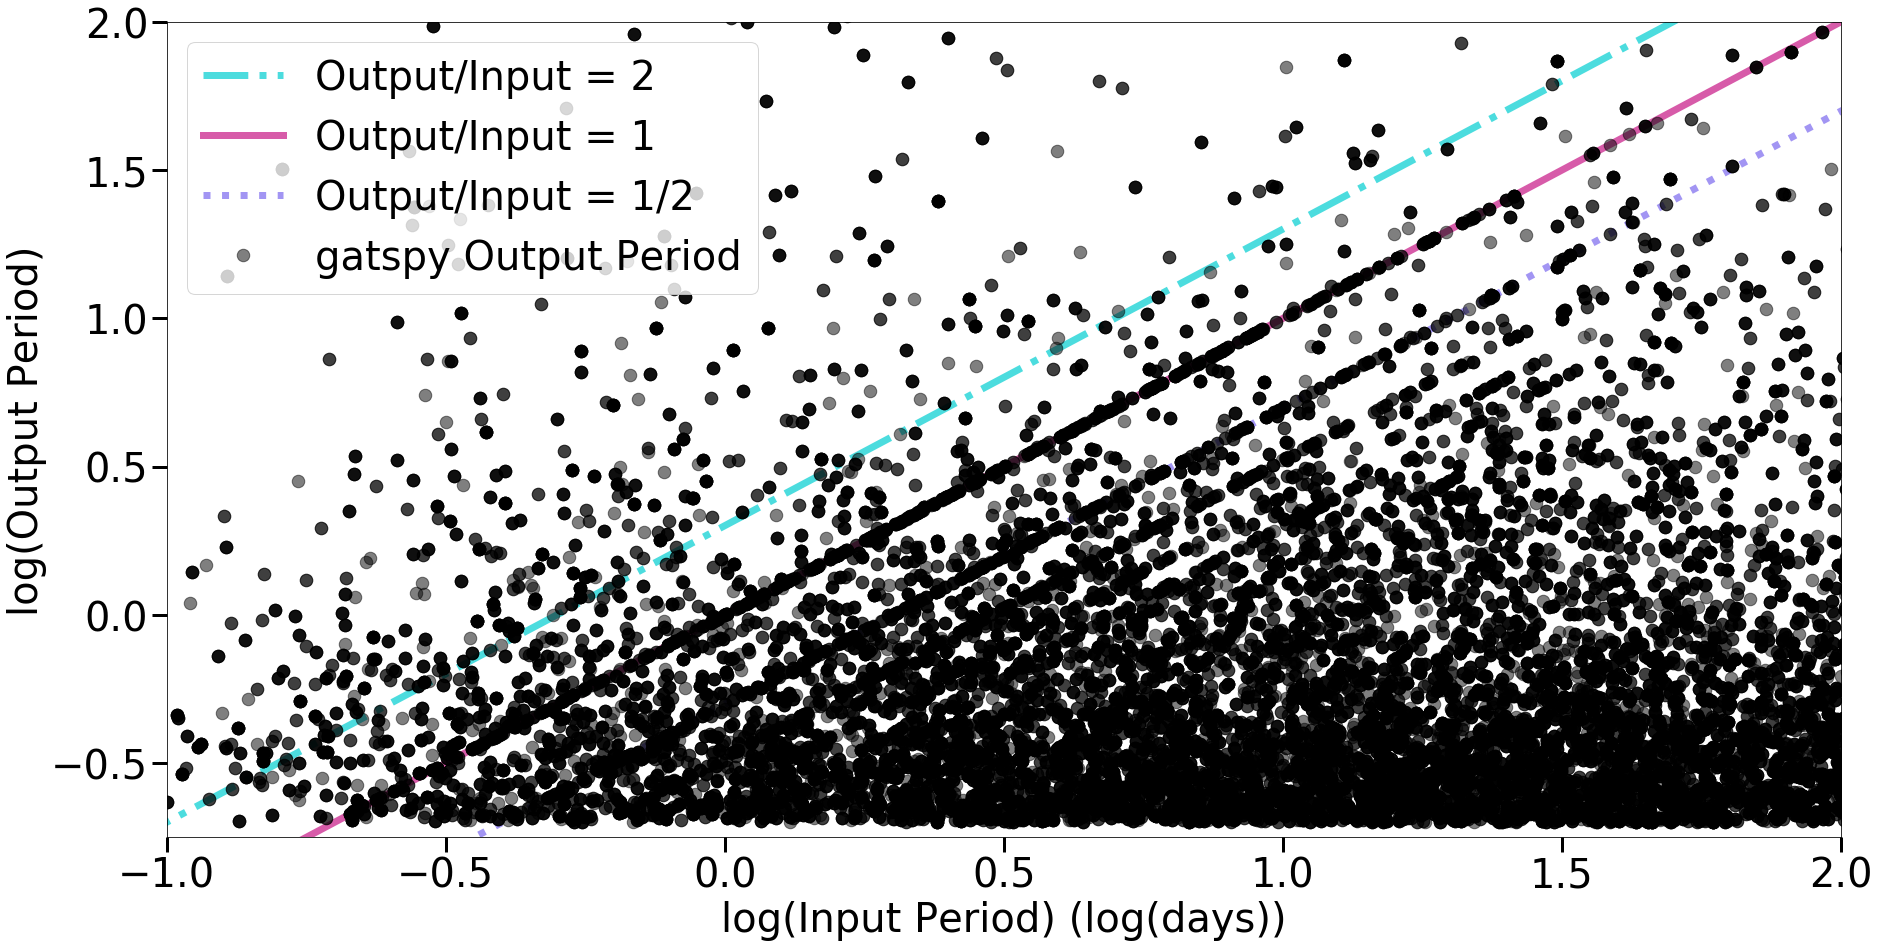

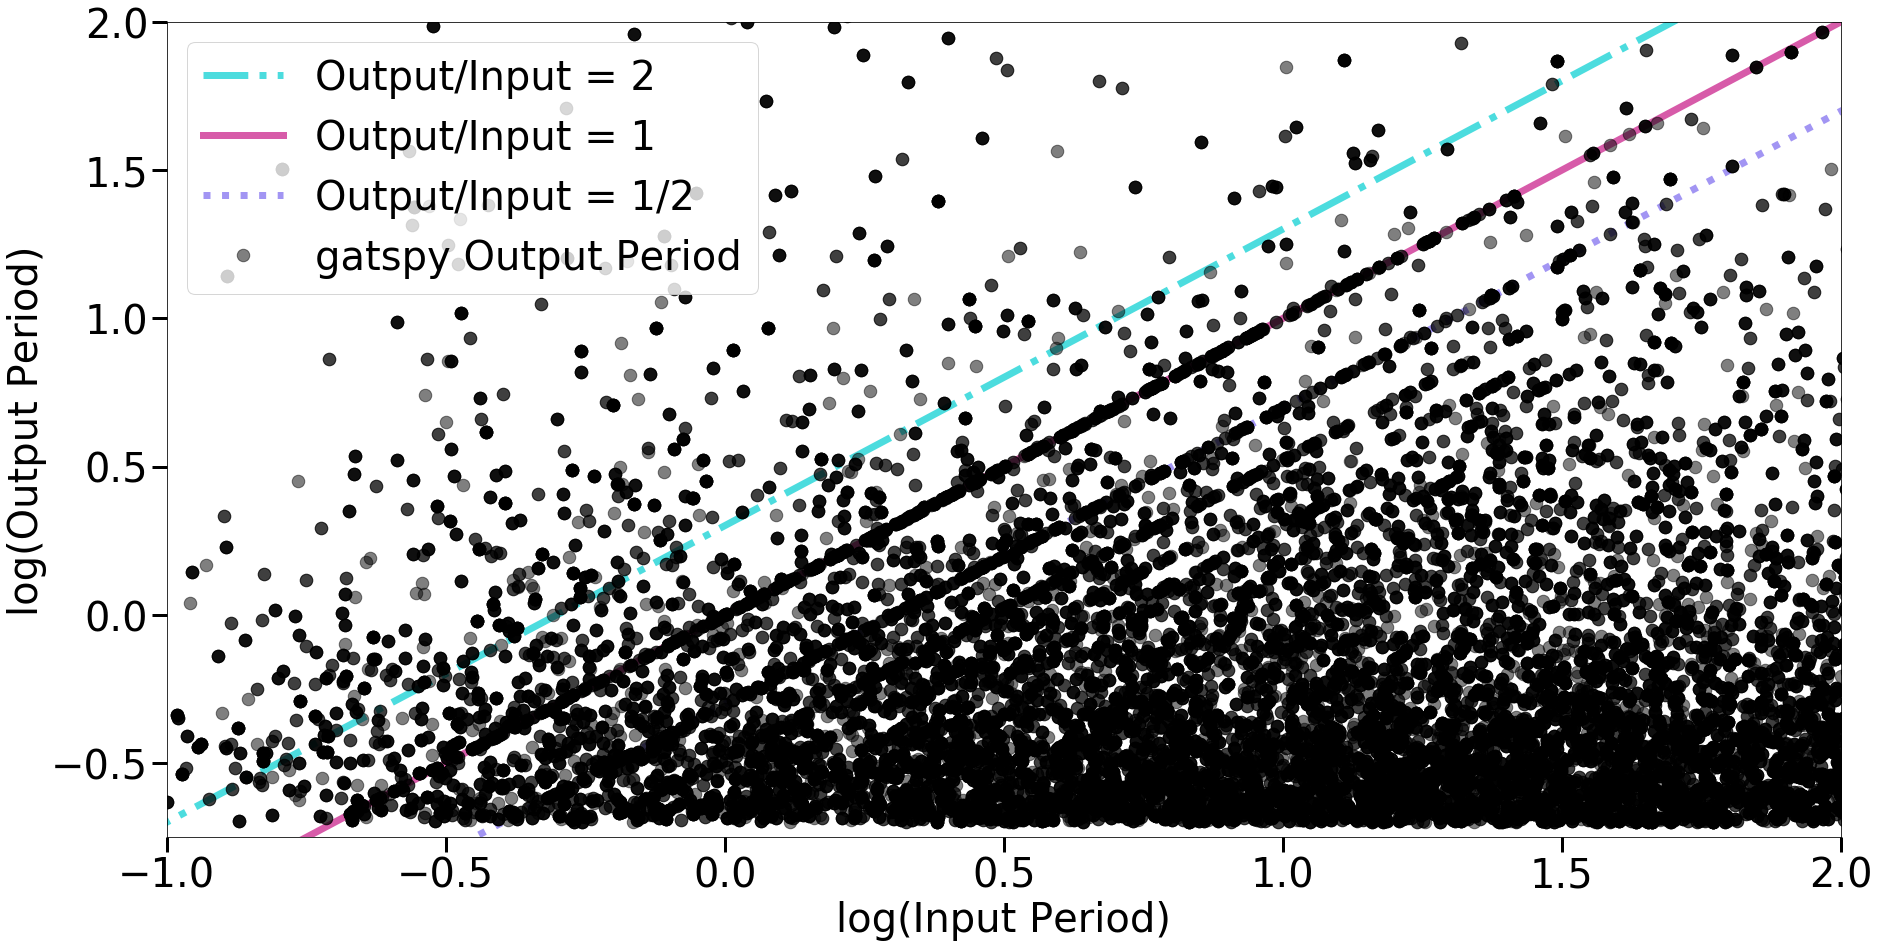

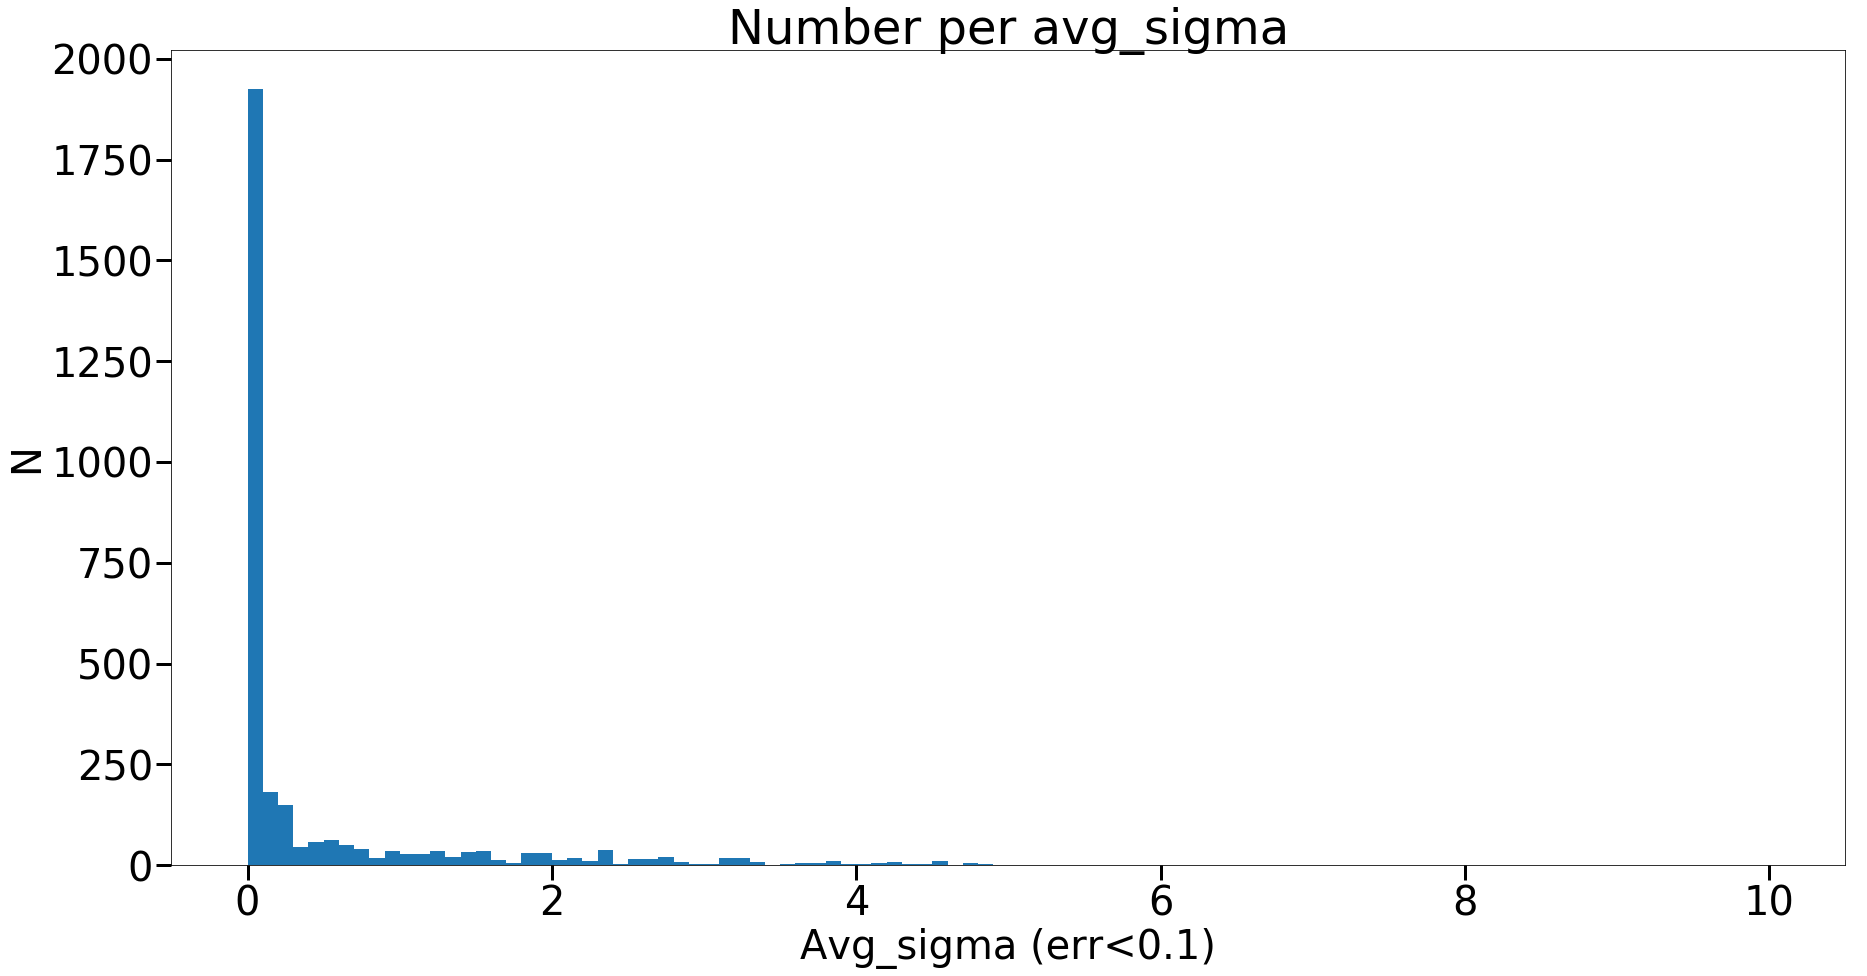

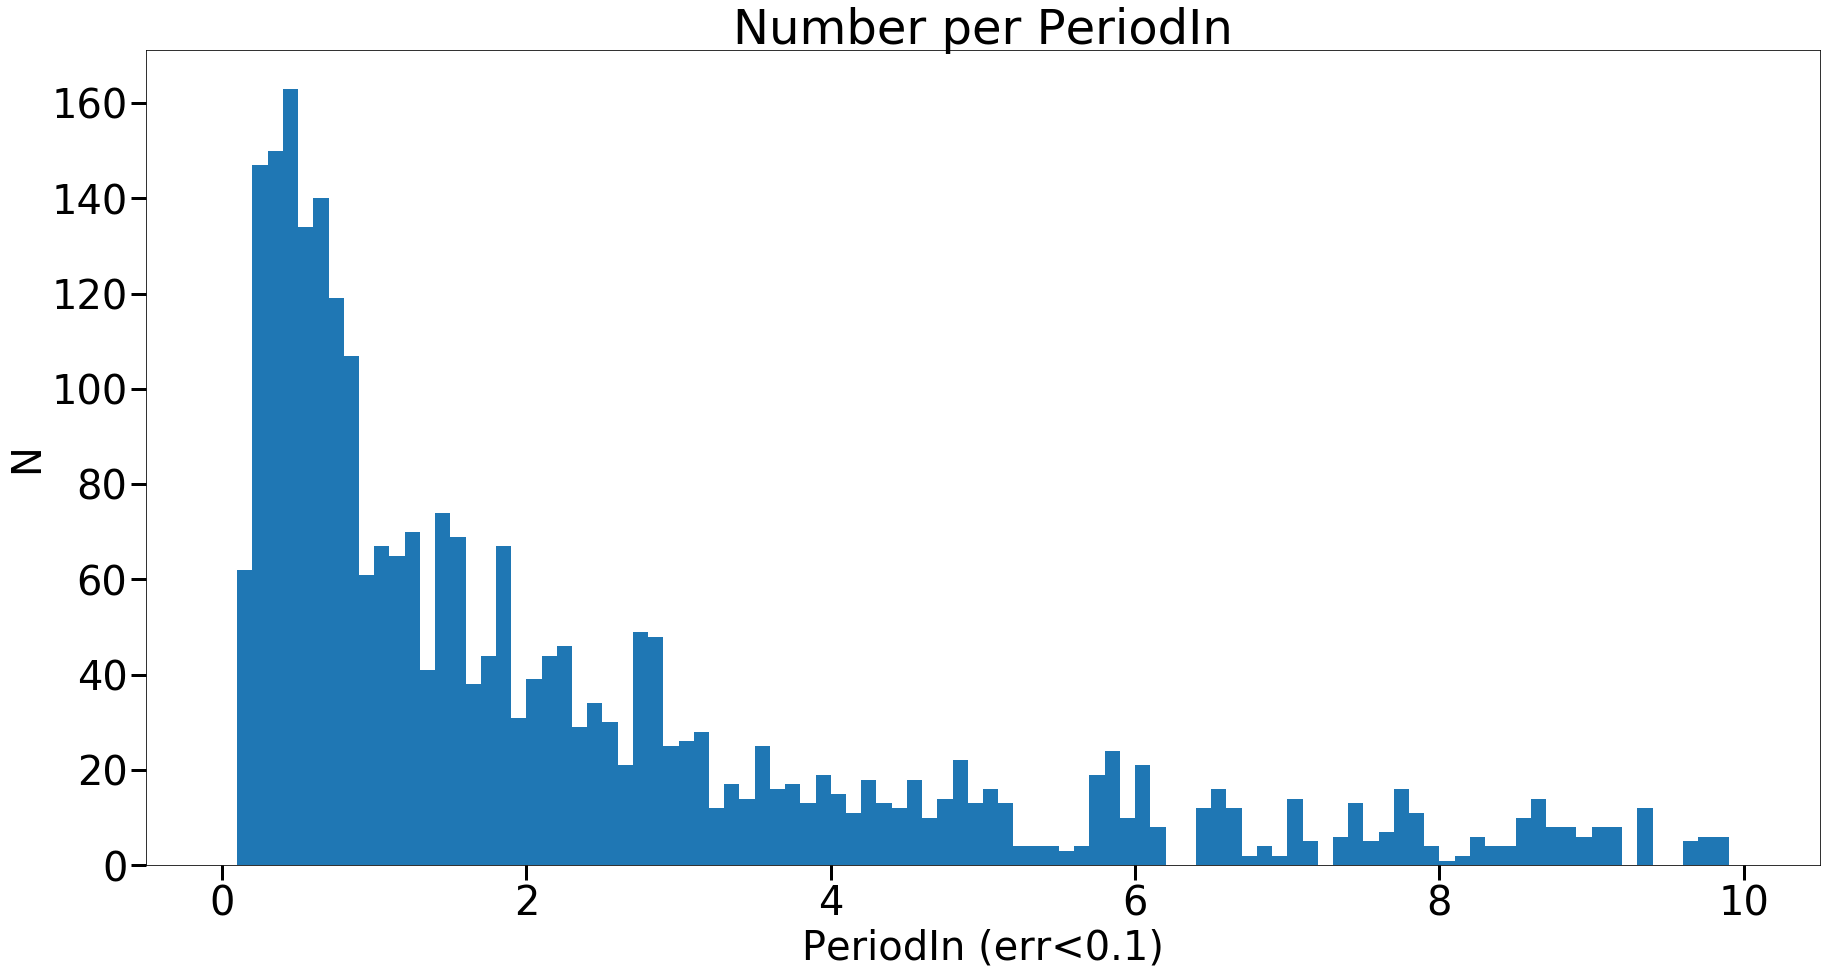

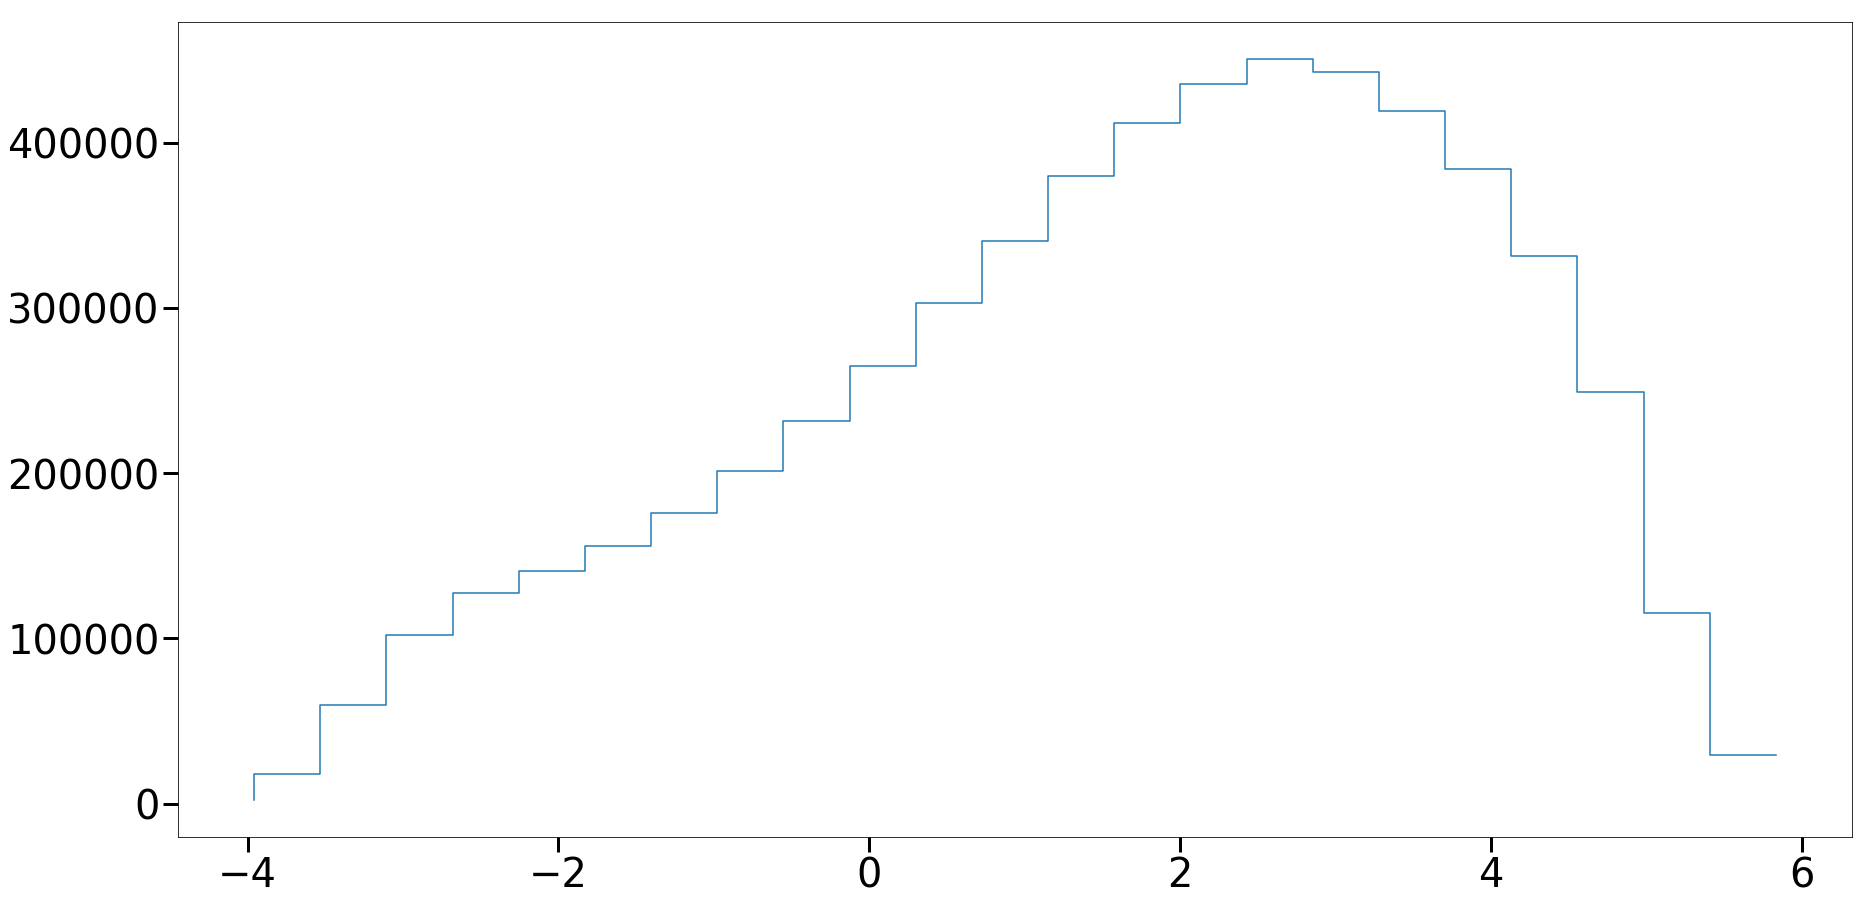

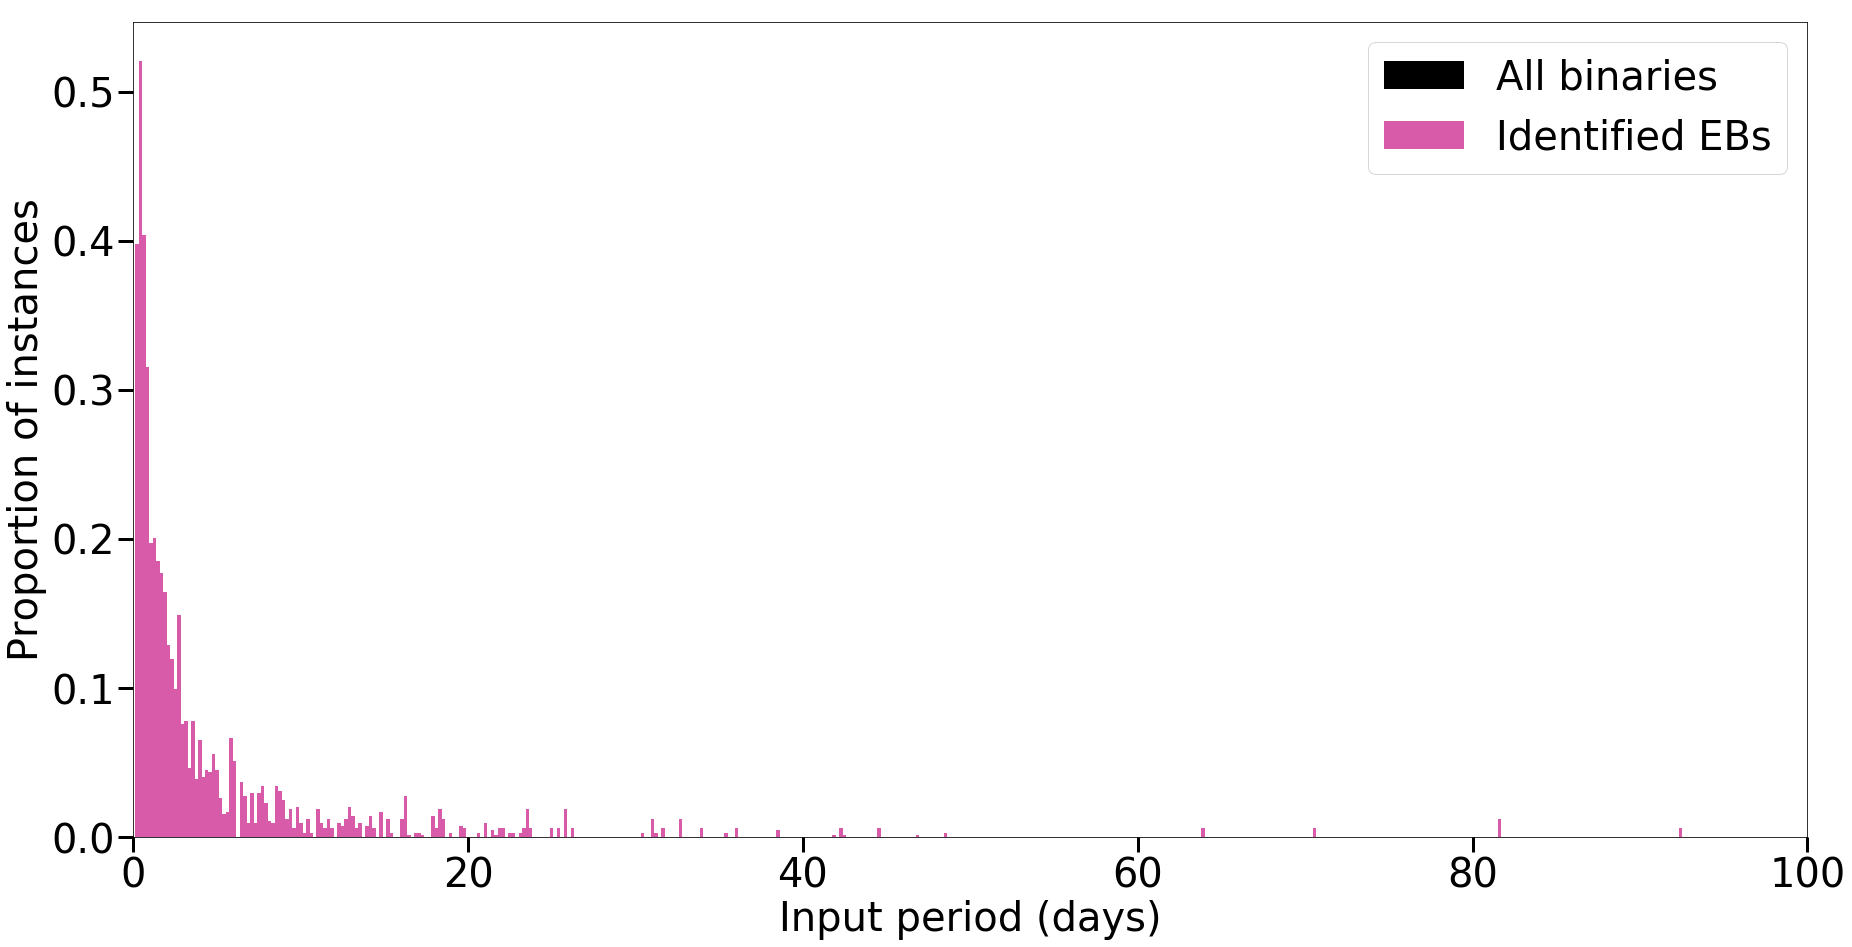

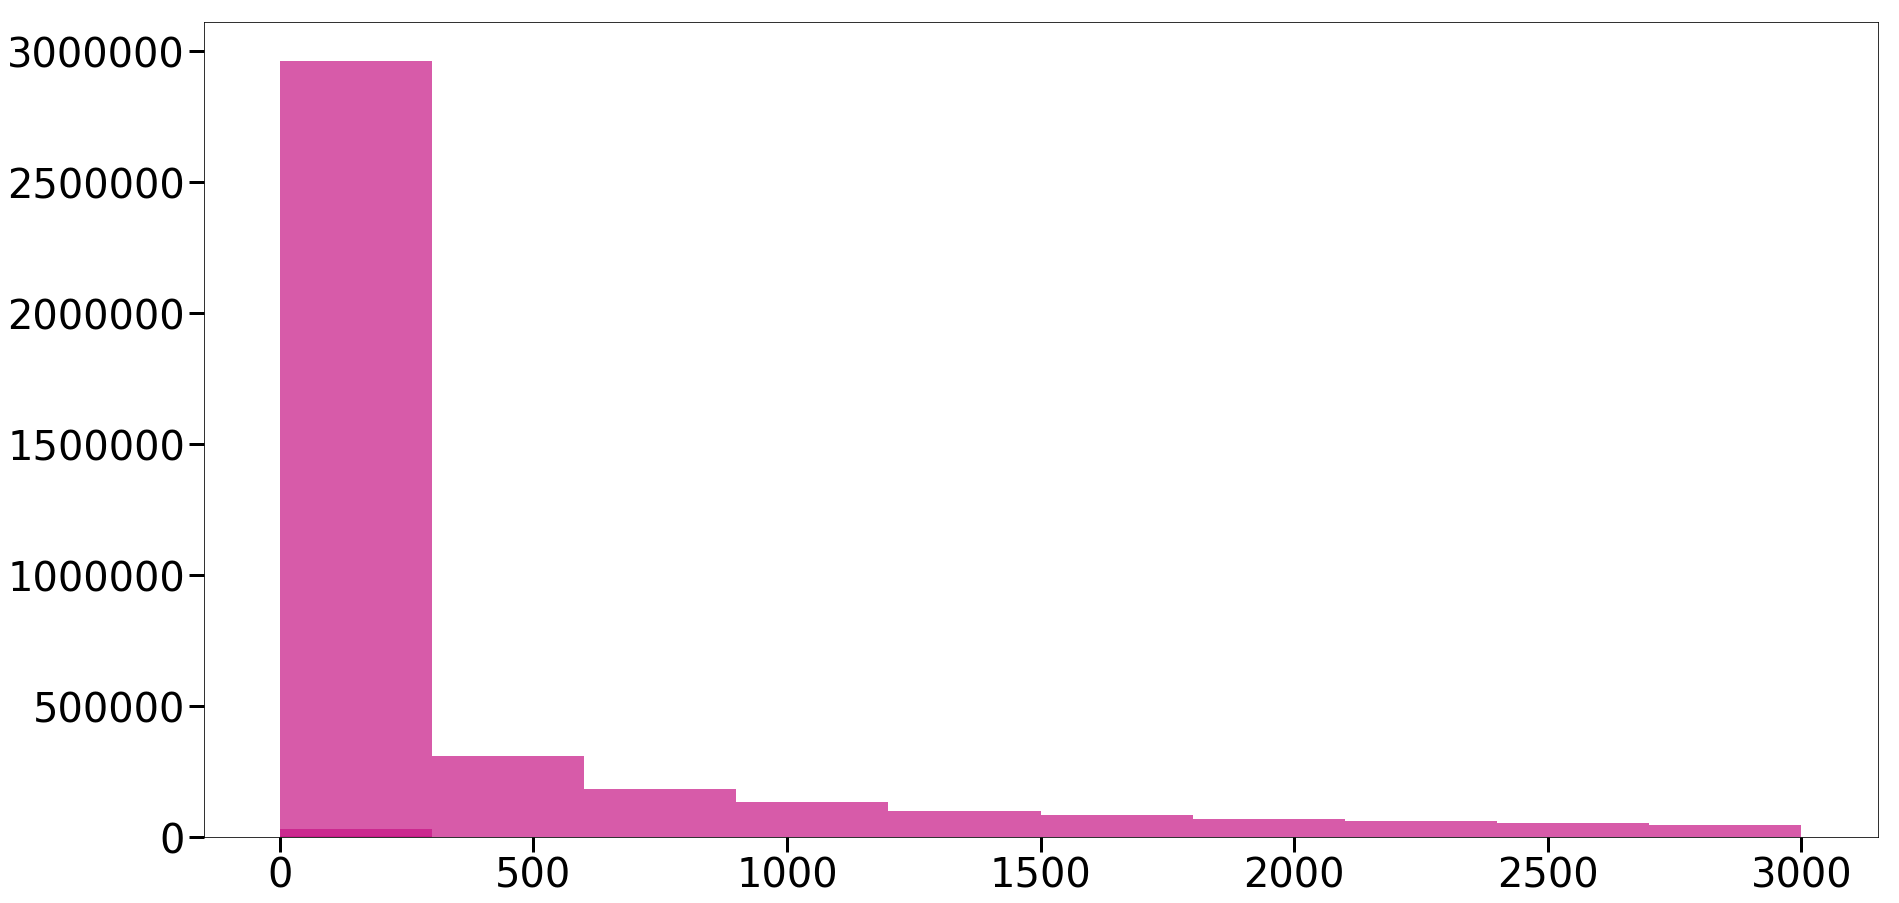

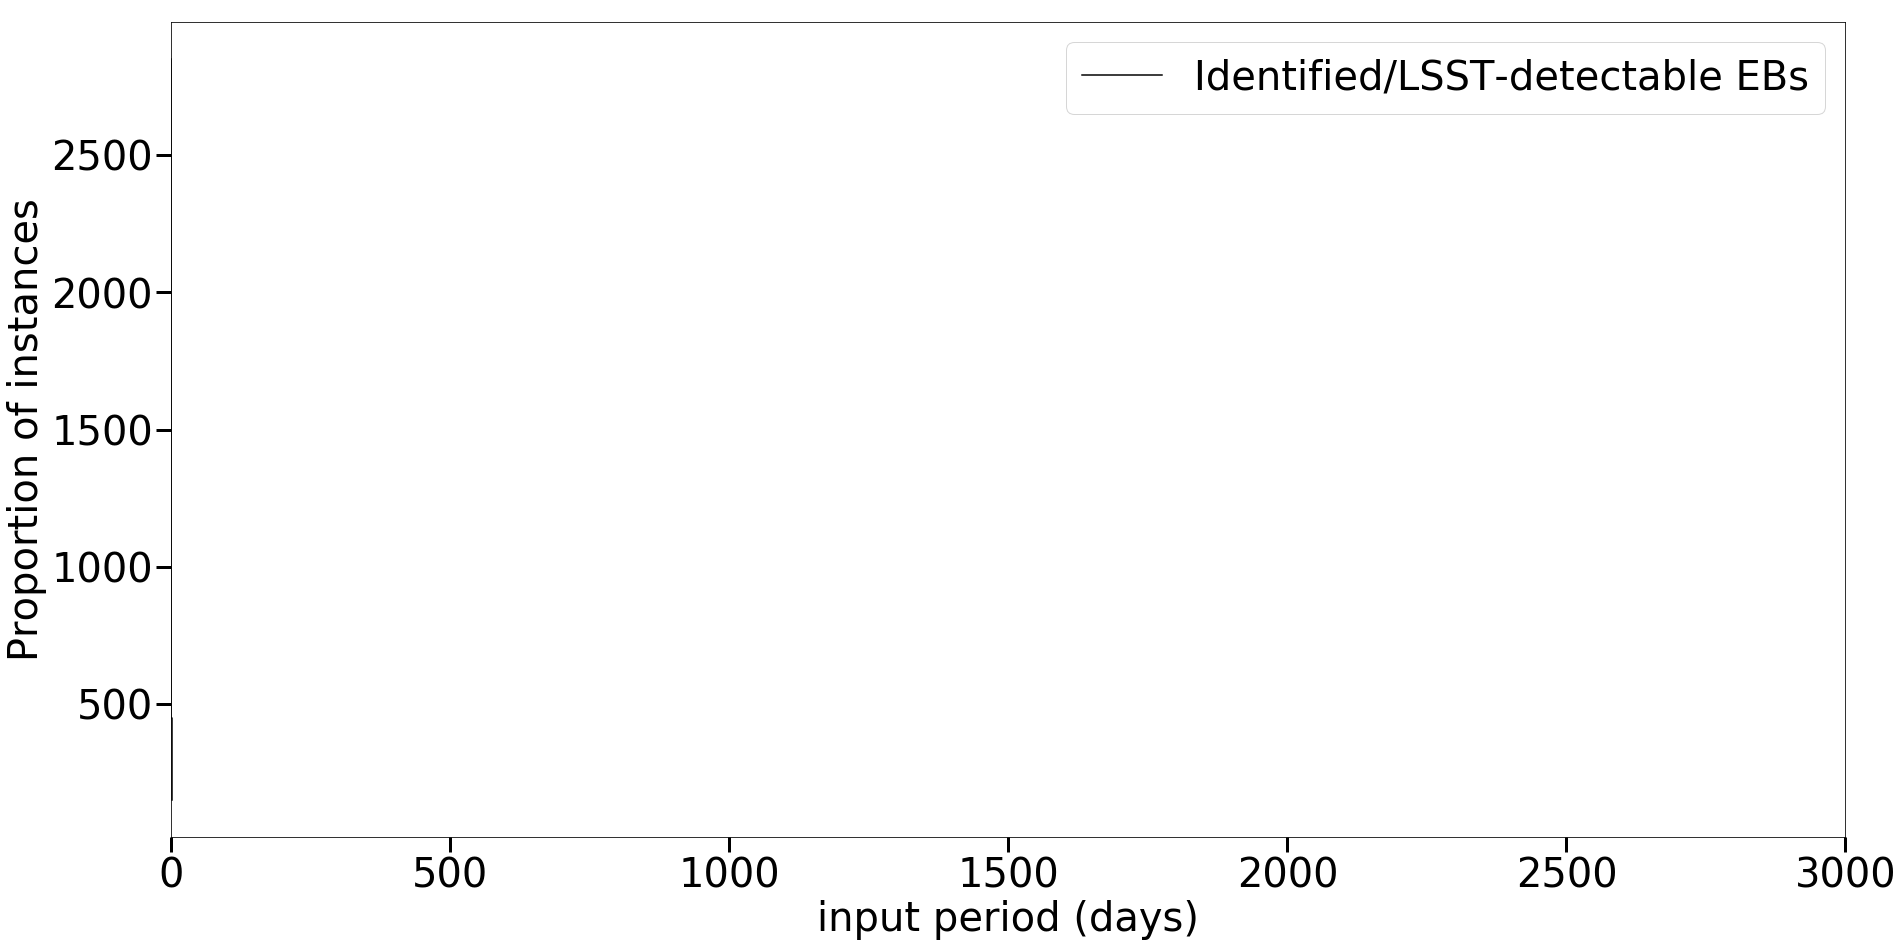

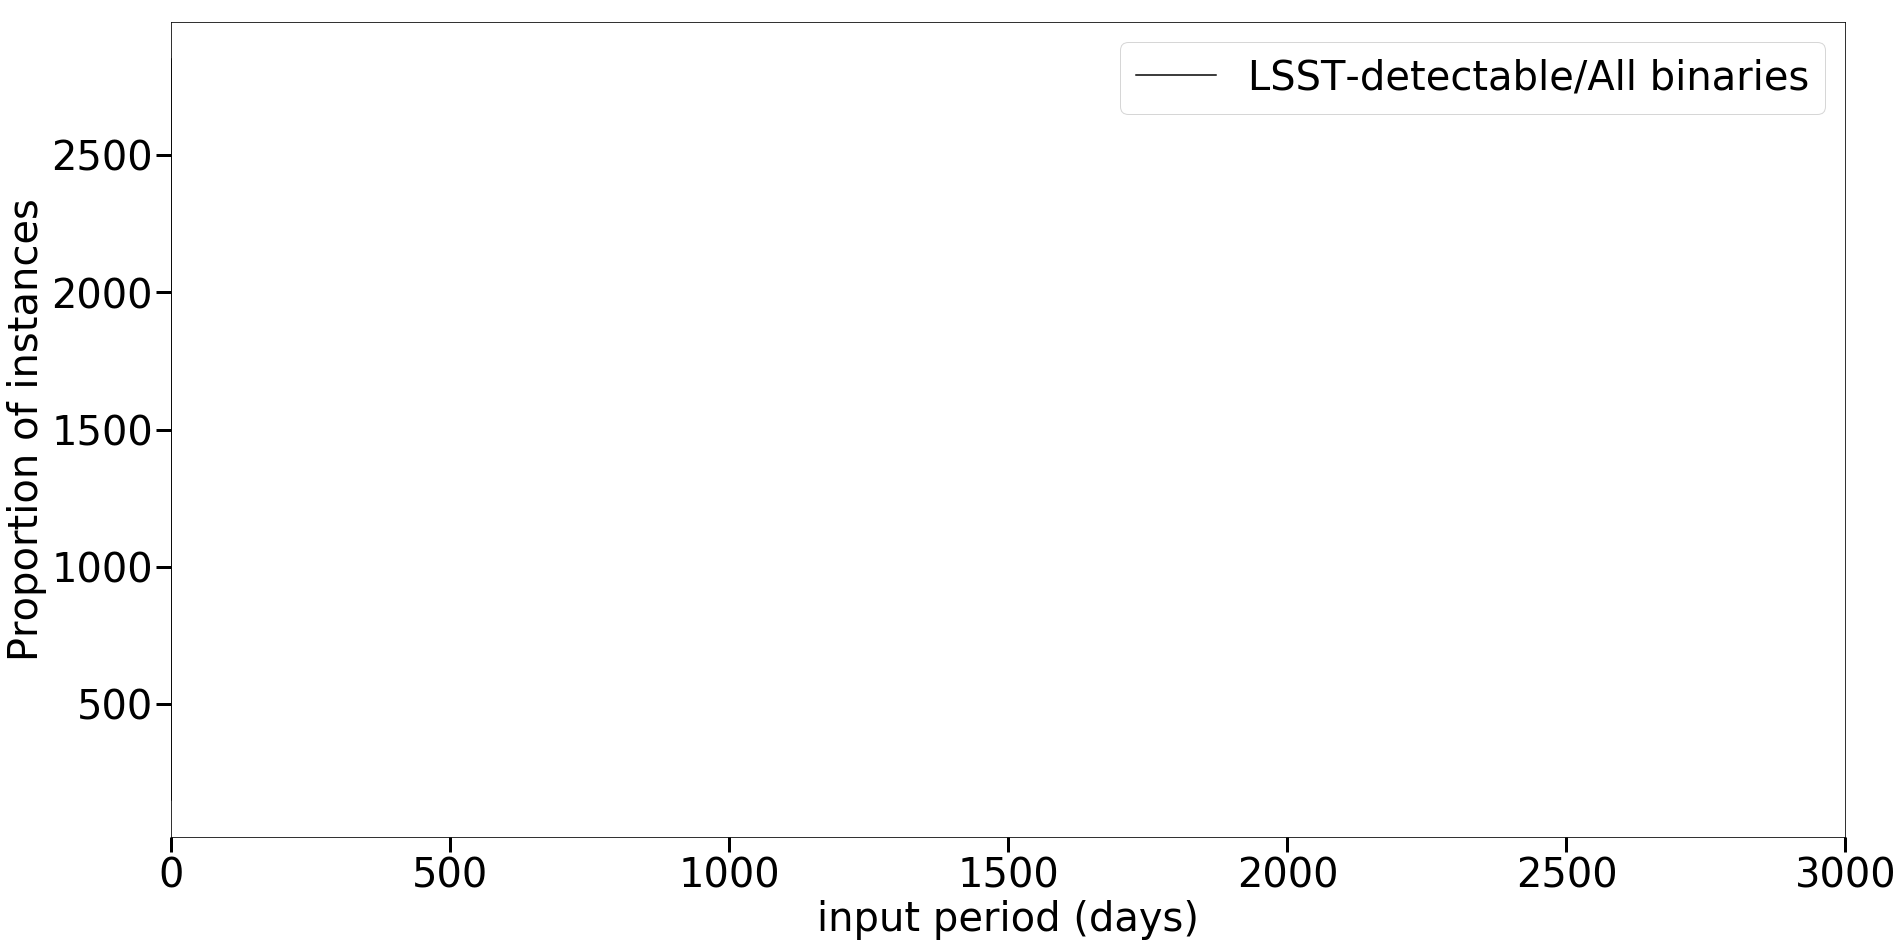

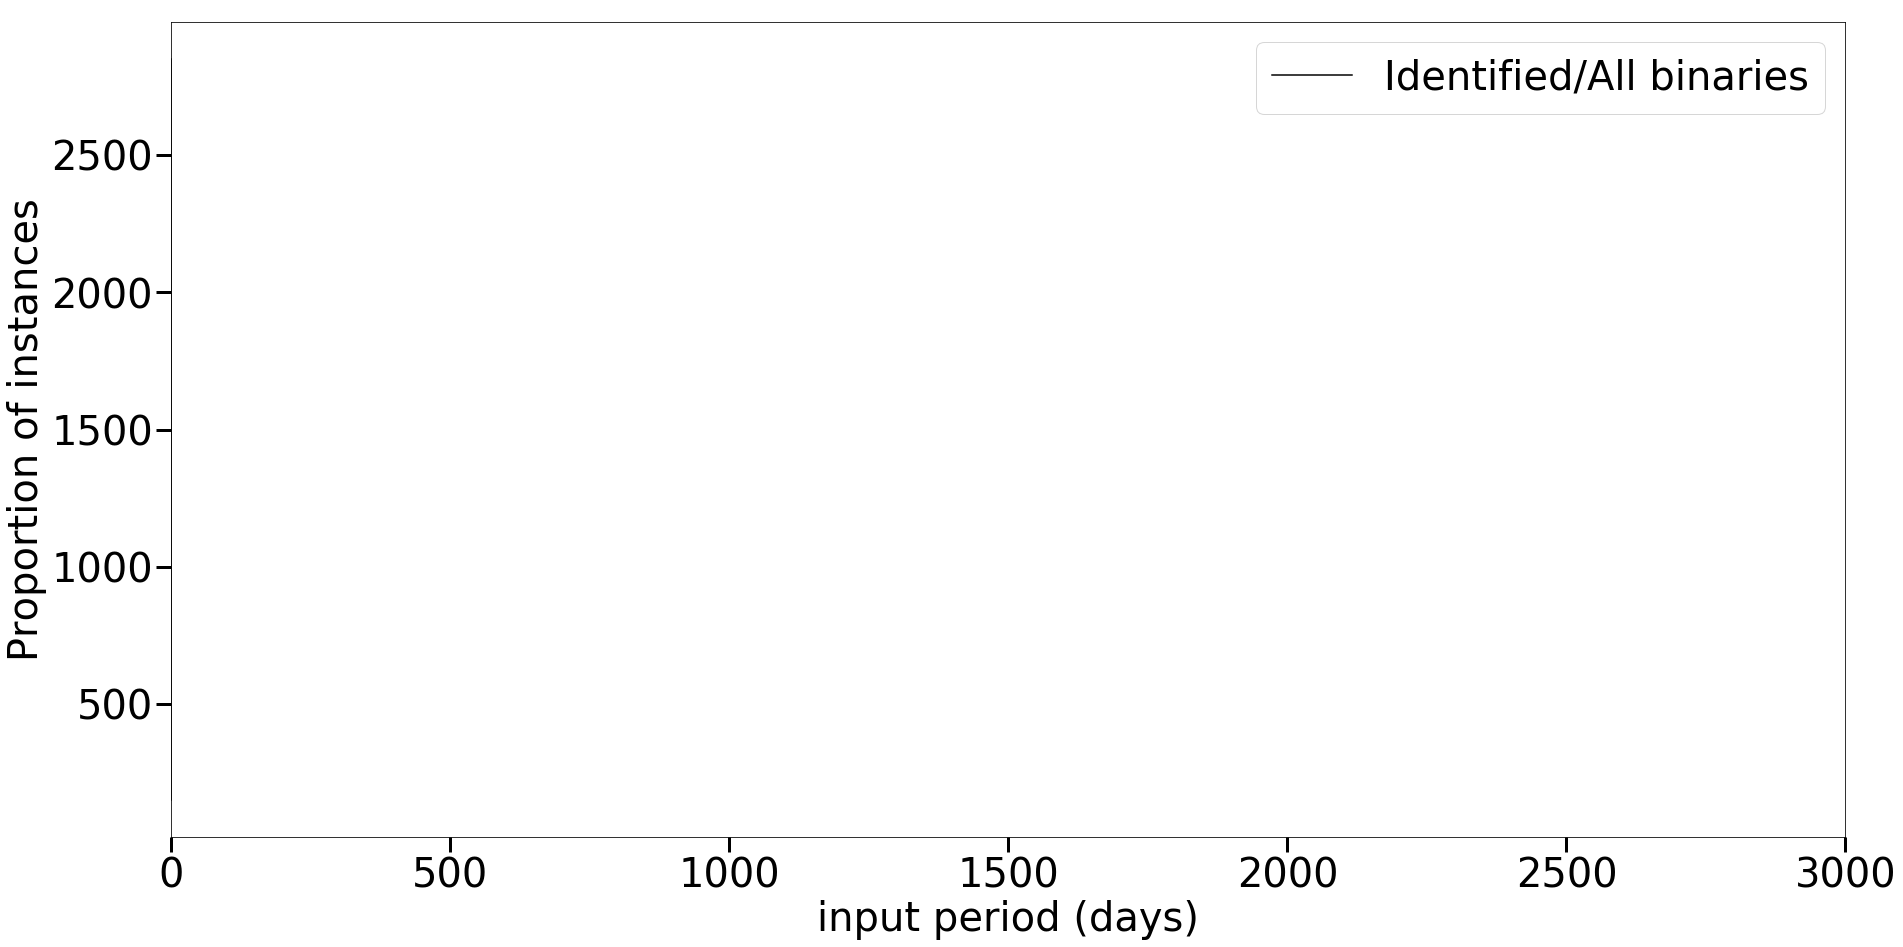

Ks_2sampResult(statistic=0.62629153317785602, pvalue=0.0)

In [14]:
ig = plt.figure(figsize=(30,15))
x = np.linspace(0.01, 4000, 1000)
plt.plot(np.log10(x), np.log10(2.*x), '-.', label = "Output/Input = 2", color = 'darkturquoise', linewidth = 7, alpha = 0.7)
plt.plot(np.log10(x), np.log10(x), '-', label = "Output/Input = 1", color = 'mediumvioletred', linewidth = 7, alpha = 0.7)
plt.plot(np.log10(x), np.log10(x/2.), ':', label = "Output/Input = 1/2", color = 'mediumslateblue', linewidth = 7, alpha = 0.7)
#plt.plot(np.log10(x), np.log10(2.*x), '-', label = "Output/Input = 2", color = 'mediumslateblue', linewidth = 7, alpha = 0.5)
#plt.plot(x, x/6, '-.', label = "Output/Input = 1/6", color = 'dimgrey', linewidth = 5)
#plt.plot(x, x/8, '-', label = "LSM expected eighth period")
#plt.plot(x, x/10, '-', label = "LSM expected tenth period")
#plt.plot(x, x/20, '-', label = "LSM expected twentieth period")
plt.plot(np.log10(PeriodIn), np.log10(PeriodOut), '.', ms = 25, alpha = 0.5, label = "gatspy Output Period", color = 'k')
#plt.title('gatspy LSM accuracy')
plt.xlabel("log(Input Period) (log(days))")
plt.ylabel("log(Output Period)")
plt.legend(loc = 'best')
plt.xlim([-1,2])
plt.ylim([-0.75,2])
plt.show()
ig.set_rasterized(True)
ig.savefig("loglogperiods.eps")
ig.savefig("loglogperiods.pdf")

obsig = plt.figure(figsize=(30,15))
x = np.linspace(0.01, 4000, 1000)
plt.plot(np.log10(x), np.log10(2.*x), '-.', label = "Output/Input = 2", color = 'darkturquoise', linewidth = 7, alpha = 0.7)
plt.plot(np.log10(x), np.log10(x), '-', label = "Output/Input = 1", color = 'mediumvioletred', linewidth = 7, alpha = 0.7)
plt.plot(np.log10(x), np.log10(x/2.), ':', label = "Output/Input = 1/2", color = 'mediumslateblue', linewidth = 7, alpha = 0.7)
#plt.plot(np.log10(x), np.log10(2.*x), '-', label = "Output/Input = 2", color = 'mediumslateblue', linewidth = 7, alpha = 0.5)
#plt.plot(x, x/6, '-.', label = "Output/Input = 1/6", color = 'dimgrey', linewidth = 5)
#plt.plot(x, x/8, '-', label = "LSM expected eighth period")
#plt.plot(x, x/10, '-', label = "LSM expected tenth period")
#plt.plot(x, x/20, '-', label = "LSM expected twentieth period")
plt.plot(np.log10(PeriodIn[obs]), np.log10(PeriodOut[obs]), '.', ms = 25, alpha = 0.5, label = "gatspy Output Period", color = 'k')
#plt.title('gatspy LSM accuracy')
plt.xlabel("log(Input Period)")
plt.ylabel("log(Output Period)")
plt.legend(loc = 'best')
plt.xlim([-1,2])
plt.ylim([-0.75,2])
plt.show()
obsig.set_rasterized(True)
obsig.savefig("loglogperiods_obs.eps")
obsig.savefig("loglogperiods_obs.pdf")

fig = plt.figure(figsize=(30,15))
pylab.hist(Avg_sigma[use], bins = 100, range = (0, 10))
pylab.title('Number per avg_sigma')
pylab.xlabel('Avg_sigma (err<0.1)')
pylab.ylabel('N')
pylab.show()

fig = plt.figure(figsize=(30,15))
pylab.hist(PeriodIn[use], bins = 100, range = (0, 10))
pylab.title('Number per PeriodIn')
pylab.xlabel('PeriodIn (err<0.1)')
pylab.ylabel('N')
pylab.show()

#fig = plt.figure(figsize=(30,15))
#pylab.hist(Sigma_Period, bins = 10, range = (0, 1))
#pylab.title('Number per Sigma_Period')
#pylab.xlabel('Sigma_Period')
#pylab.ylabel('N')
#pylab.show()

#if (0. < Sigma_Period < 0.1): | (Sigma_Period = 0.1):
#fig = plt.figure(figsize=(30,15))
#pylab.hist(Sigma_Period[use], bins = 10, range = (0, 0.1))
#pylab.title('Number per Sigma_Period')
#pylab.xlabel('Sigma_Period (err<0.1)')
#pylab.ylabel('N')
#pylab.show()

fig = plt.figure(figsize=(30,15))
values, base = np.histogram(np.log10(PeriodIn), bins=len(list(dat)))
plt.step(base[:-1],values)
plt.show()

prd = plt.figure(figsize=(30,15))
n, bins, patches = plt.hist(PeriodIn, bins = 1000, color = 'k', normed = True, label = "All binaries")
n10, bins10, patches10 = plt.hist(PeriodIn[use], bins = 1000, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs")
plt.xlabel('Input period (days)')
plt.xlim([0,100])
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
prd.set_rasterized(True)
prd.savefig("periodin_relativedistribution.eps")
prd.savefig("periodin_relativedistribution.pdf")


newbins=[]

for i in range(len(bins)-1):
  newbins.append((bins[i] + bins[i+1])/2.)

#print ("bin length = ", len(bins), "   bins = ", bins)
#print ("newbin length = ", len(newbins), "   newbins = ", newbins)

#divhistprd = plt.figure(figsize=(20,15))
#plt.step(newbins, n10/n, label="Identified/All binaries")
#plt.step(newbins, n20/n, label="LSST-Detectable/All binaries")
#plt.step(newbins, n10/n20, label="Identified/LSST-detectable")
#plt.xlabel('PeriodIn (days)')
#plt.ylabel('Normed proportion of instances')
#plt.legend(loc = "best", prop={'size': 30})
#plt.show()
#divhistprd.set_rasterized(True)
#divhistprd.savefig("periodin_divhist.eps")
#divhistprd.savefig("periodin_divhist.pdf")



#densprd = plt.figure(figsize=(30,15))
#sns.distplot(PeriodIn, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'k', label = 'All binaries')
#sns.distplot(PeriodIn[obs], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'darkturquoise', label = 'LSST-detectable EBs')
#sns.distplot(PeriodIn[use], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'mediumvioletred', label = 'Identified EBs')
#plt.xlim([0,100])
#plt.xlabel('Input period (days)')
#plt.ylabel('Proportion of instances')
#plt.legend(loc = "best")
#plt.show()
#densprd.set_rasterized(True)
#densprd.savefig("periodin_dens.eps")
#densprd.savefig("periodin_dens.pdf")


fig = plt.figure(figsize=(30,15))
n1, bins1, patches1 = plt.hist(PeriodIn, bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "All binaries", range = (0,3000))
n11, bins11, patches11 = plt.hist(PeriodIn[use], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "Identified EBs", range = (0,3000))
n21, bins21, patches21 = plt.hist(PeriodIn[obs], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "LSST-detectable EBs", range = (0,3000))
plt.show

newbins1=[]

for i in range(len(bins1)-1):
  newbins1.append((bins1[i] + bins1[i+1])/2.)

densdivprd1 = plt.figure(figsize=(30,15))
plt.step(n11/n21, newbins1, color = 'k', label = 'Identified/LSST-detectable EBs')
plt.xlim([0,3000])
plt.xlabel('input period (days)')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivprd1.set_rasterized(True)
densdivprd1.savefig("periodin_ID-LD_dens.eps")
densdivprd1.savefig("periodin_ID-LD_dens.pdf")


densdivprd2 = plt.figure(figsize=(30,15))
plt.step(n21/n1, newbins1, color = 'k', label = 'LSST-detectable/All binaries')
plt.xlim([0,3000])
plt.xlabel('input period (days)')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivprd2.set_rasterized(True)
densdivprd2.savefig("periodin_LD-AB_dens.eps")
densdivprd2.savefig("periodin_LD-AB_dens.pdf")


densdivprd3 = plt.figure(figsize=(30,15))
plt.step(n11/n1, newbins1, color = 'k', label = 'Identified/All binaries')
plt.xlim([0,3000])
plt.xlabel('input period (days)')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivprd3.set_rasterized(True)
densdivprd3.savefig("periodin_ID-AB_dens.eps")
densdivprd3.savefig("periodin_ID-AB_dens.pdf")

stats.ks_2samp(PeriodIn, PeriodIn[use])

#print(PeriodIn[use])

# MASS

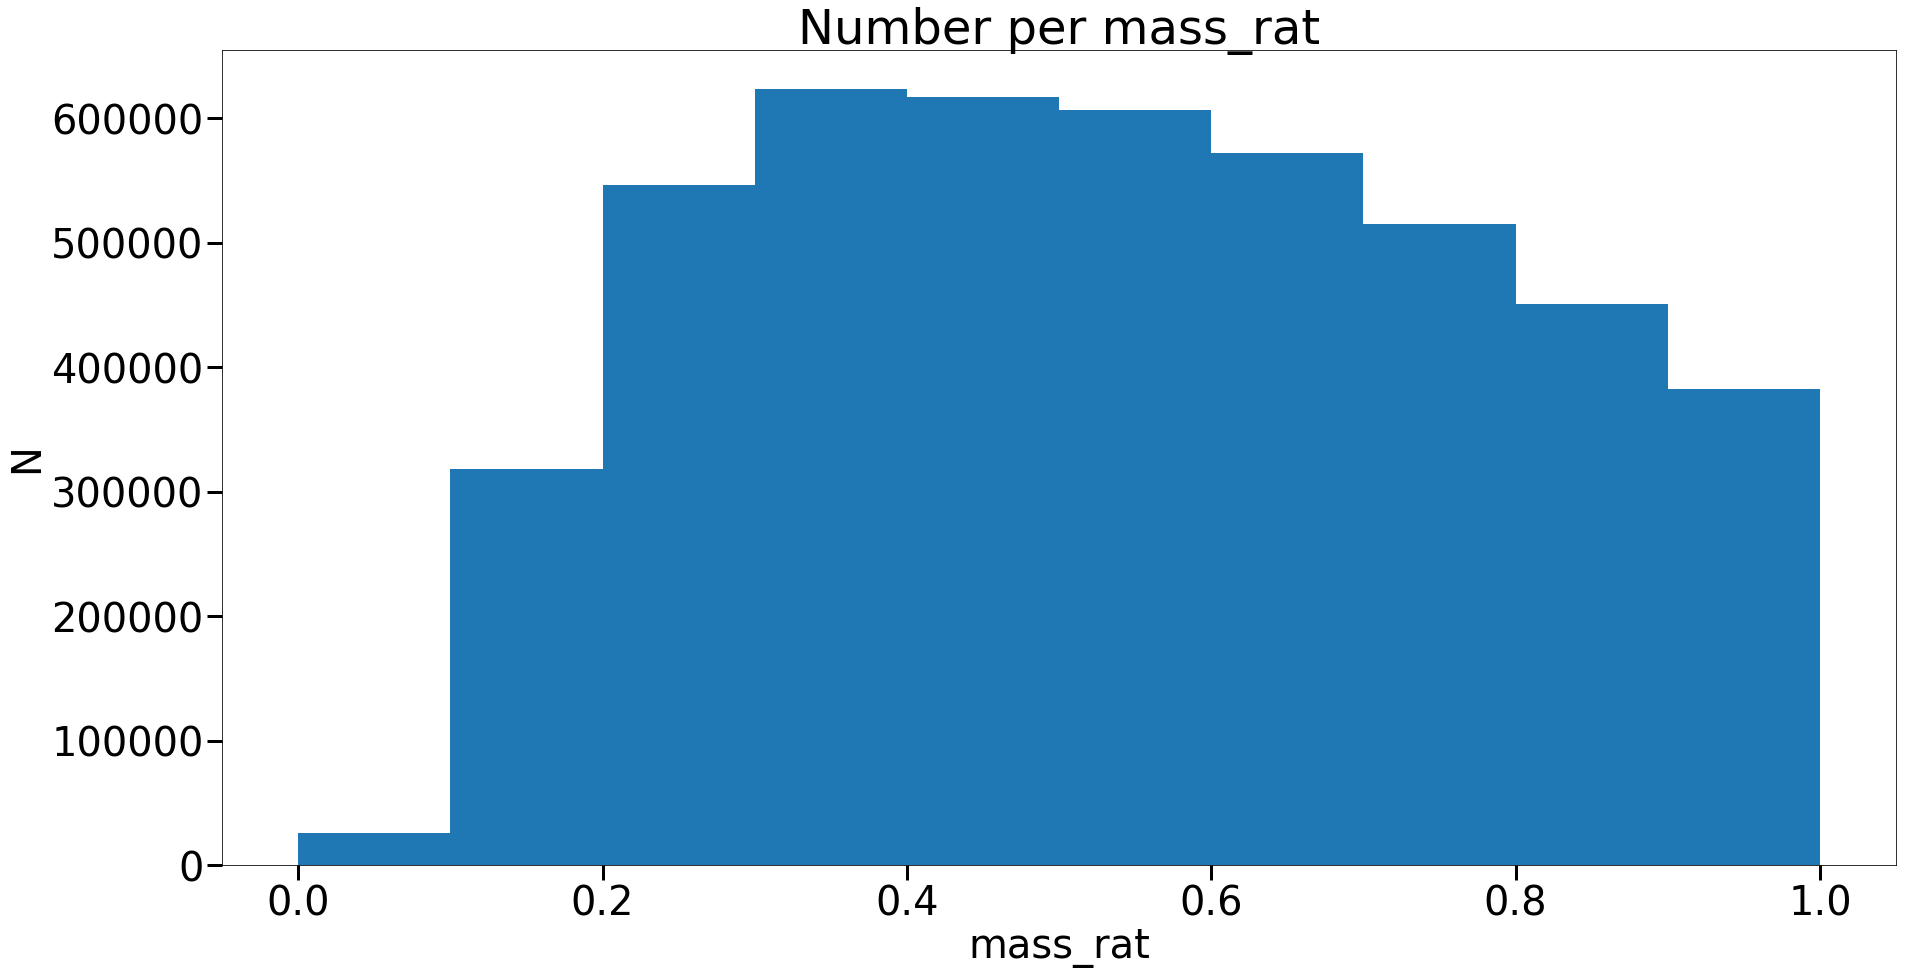

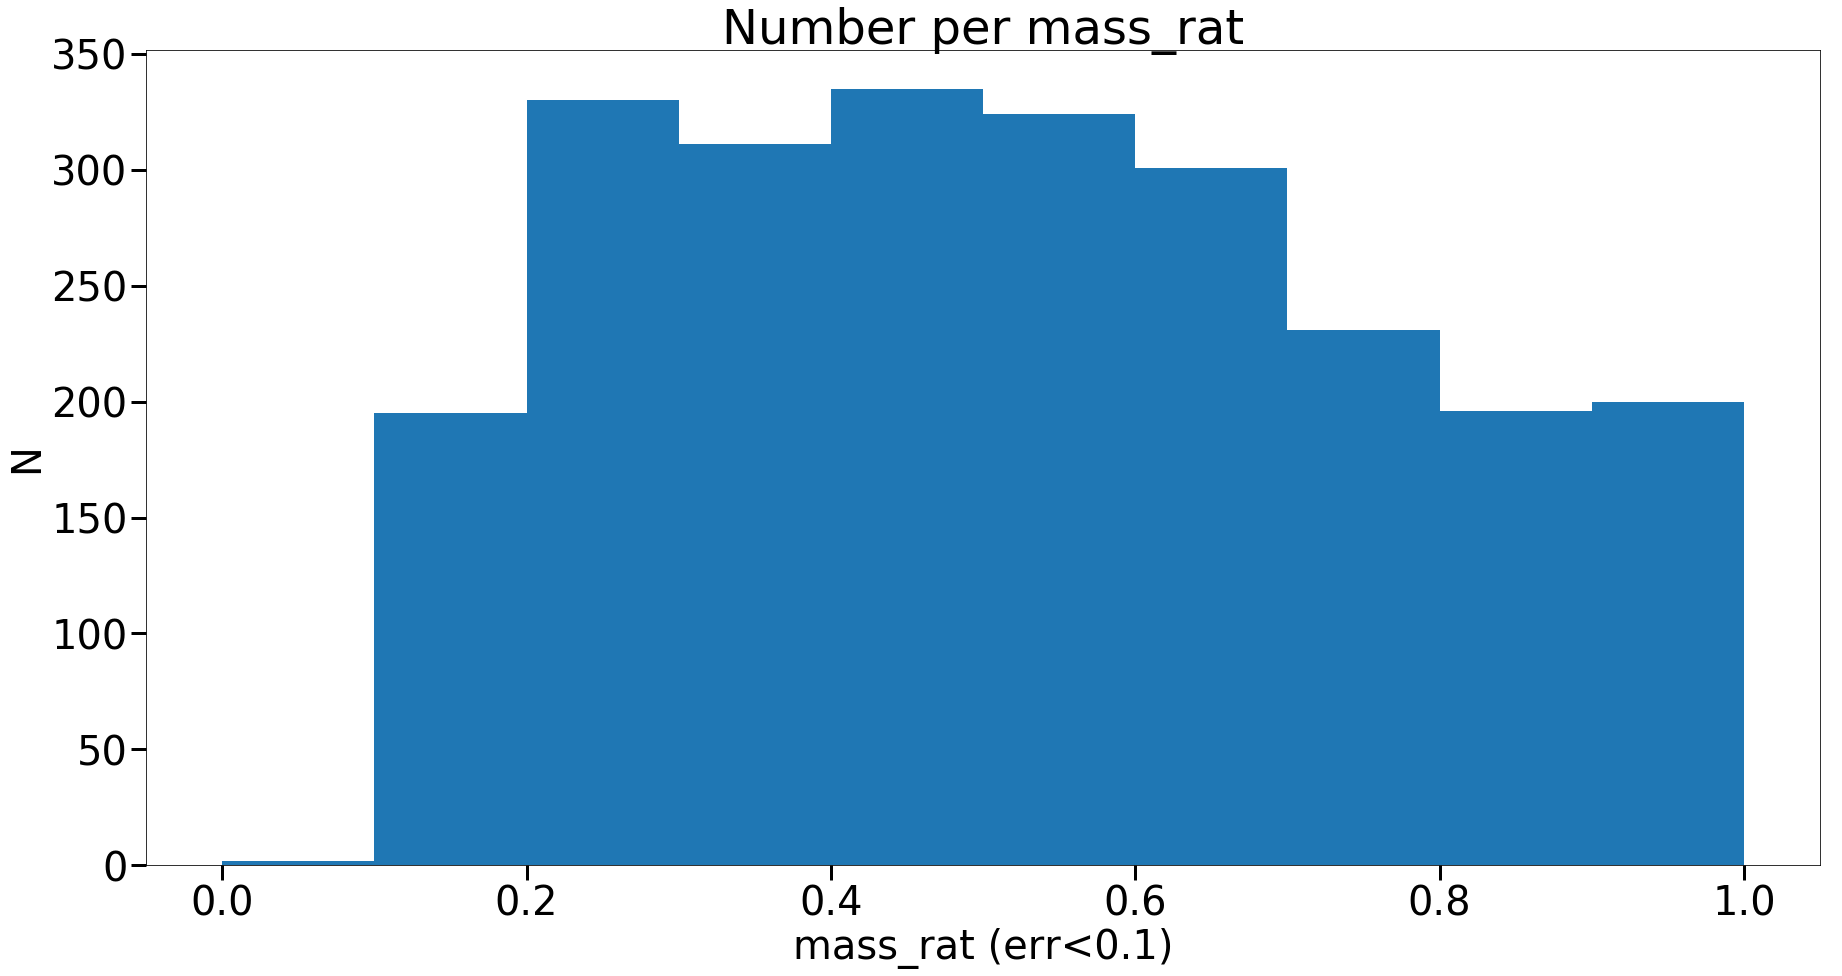

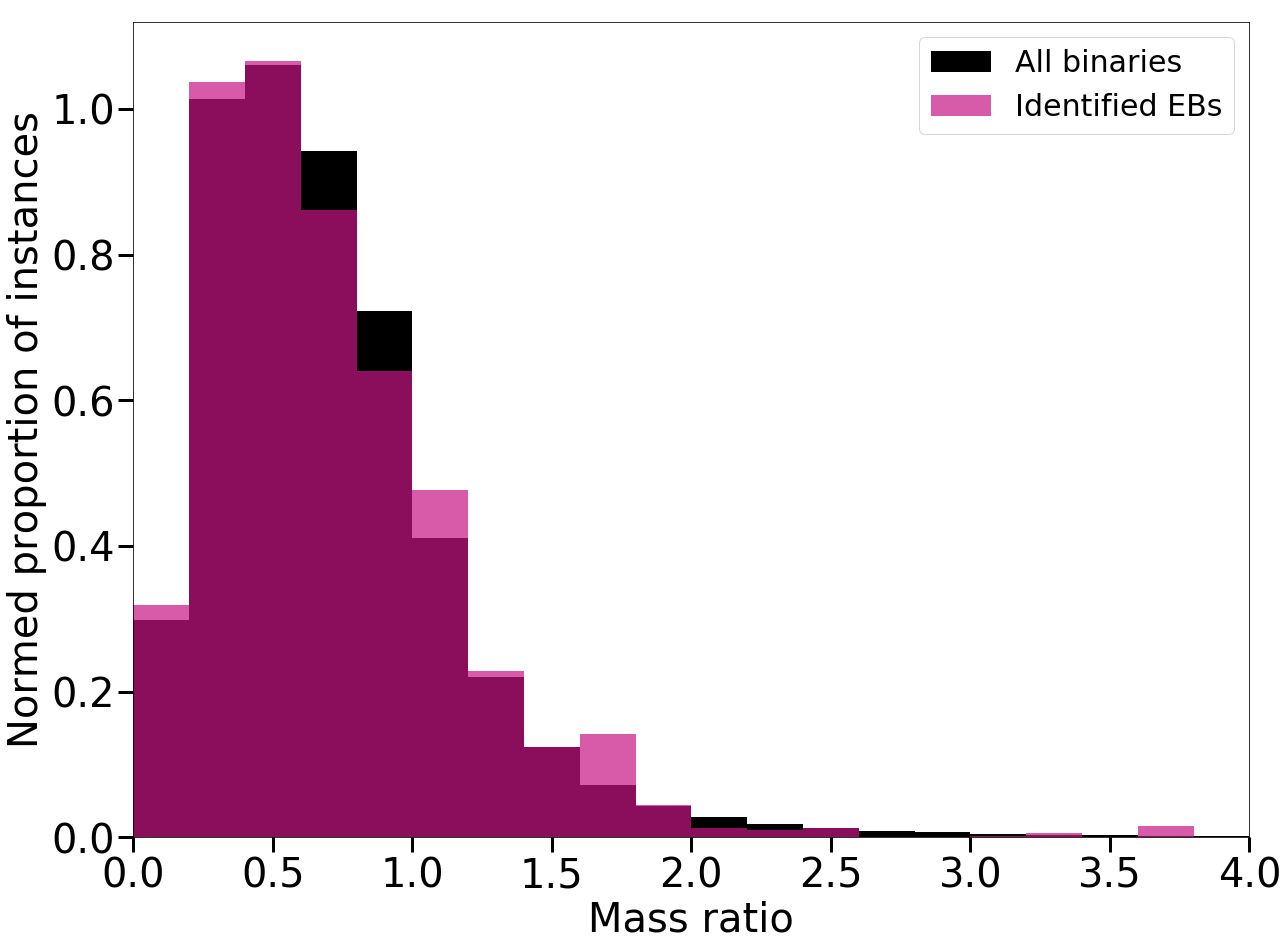

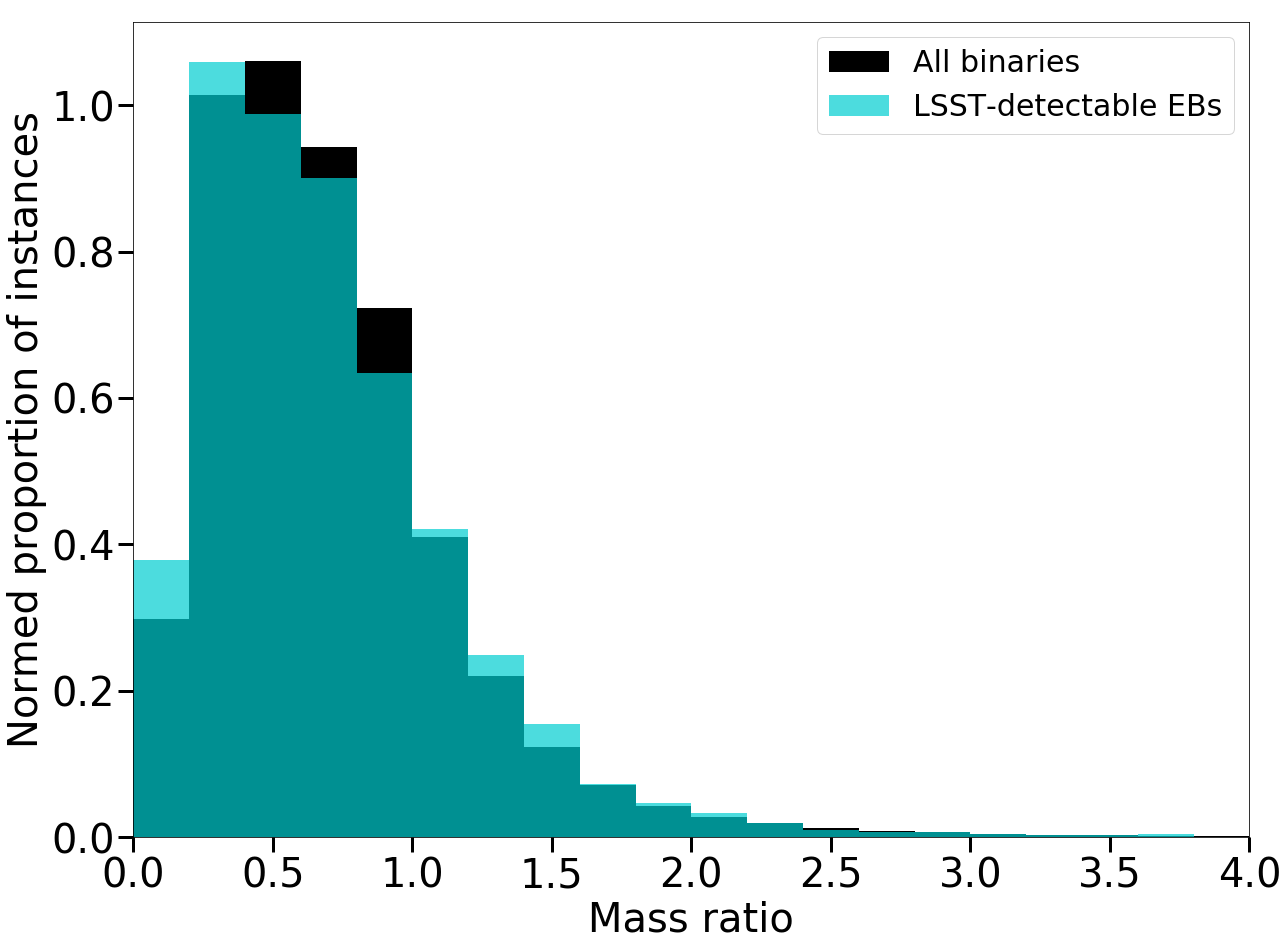

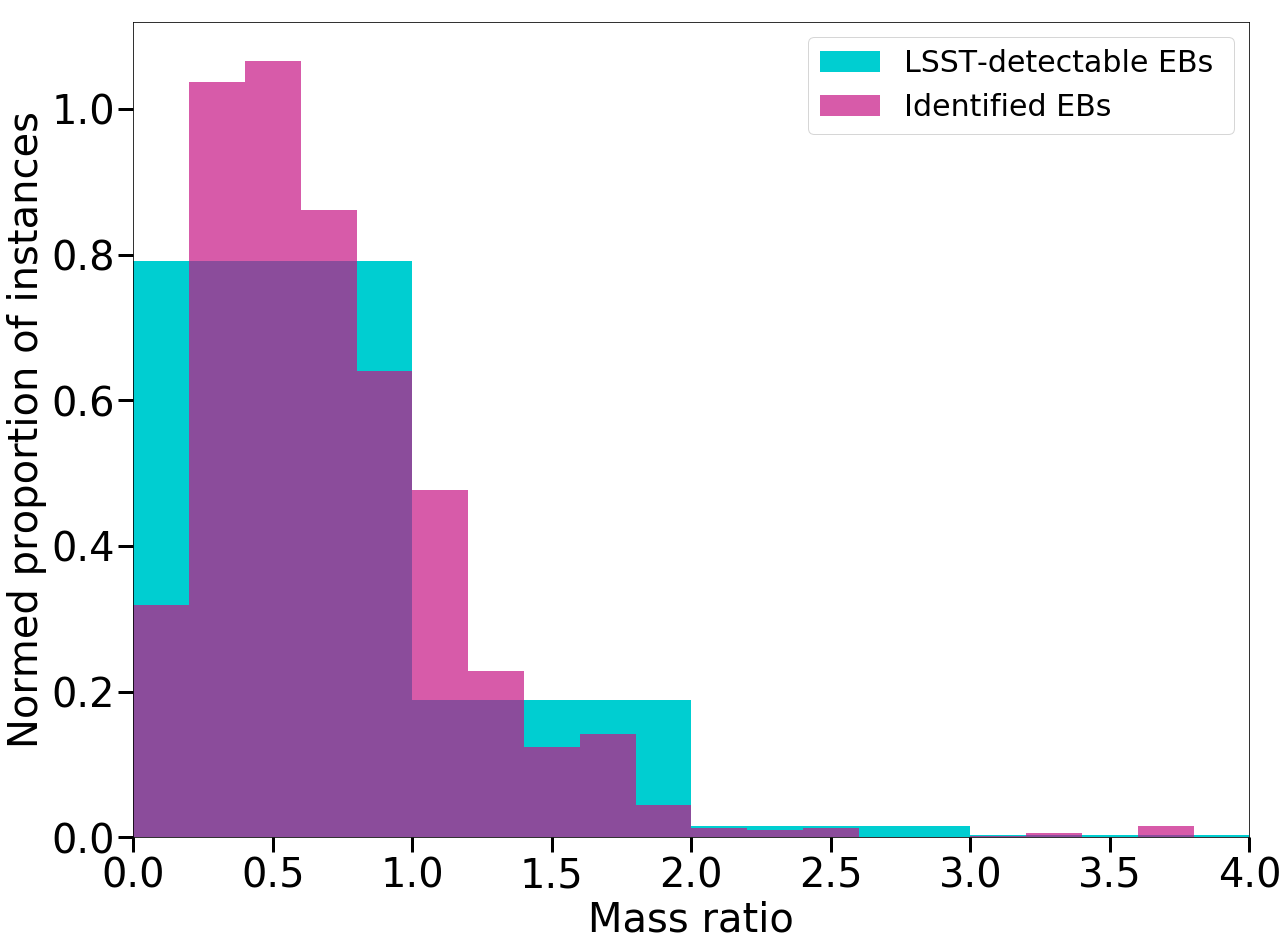

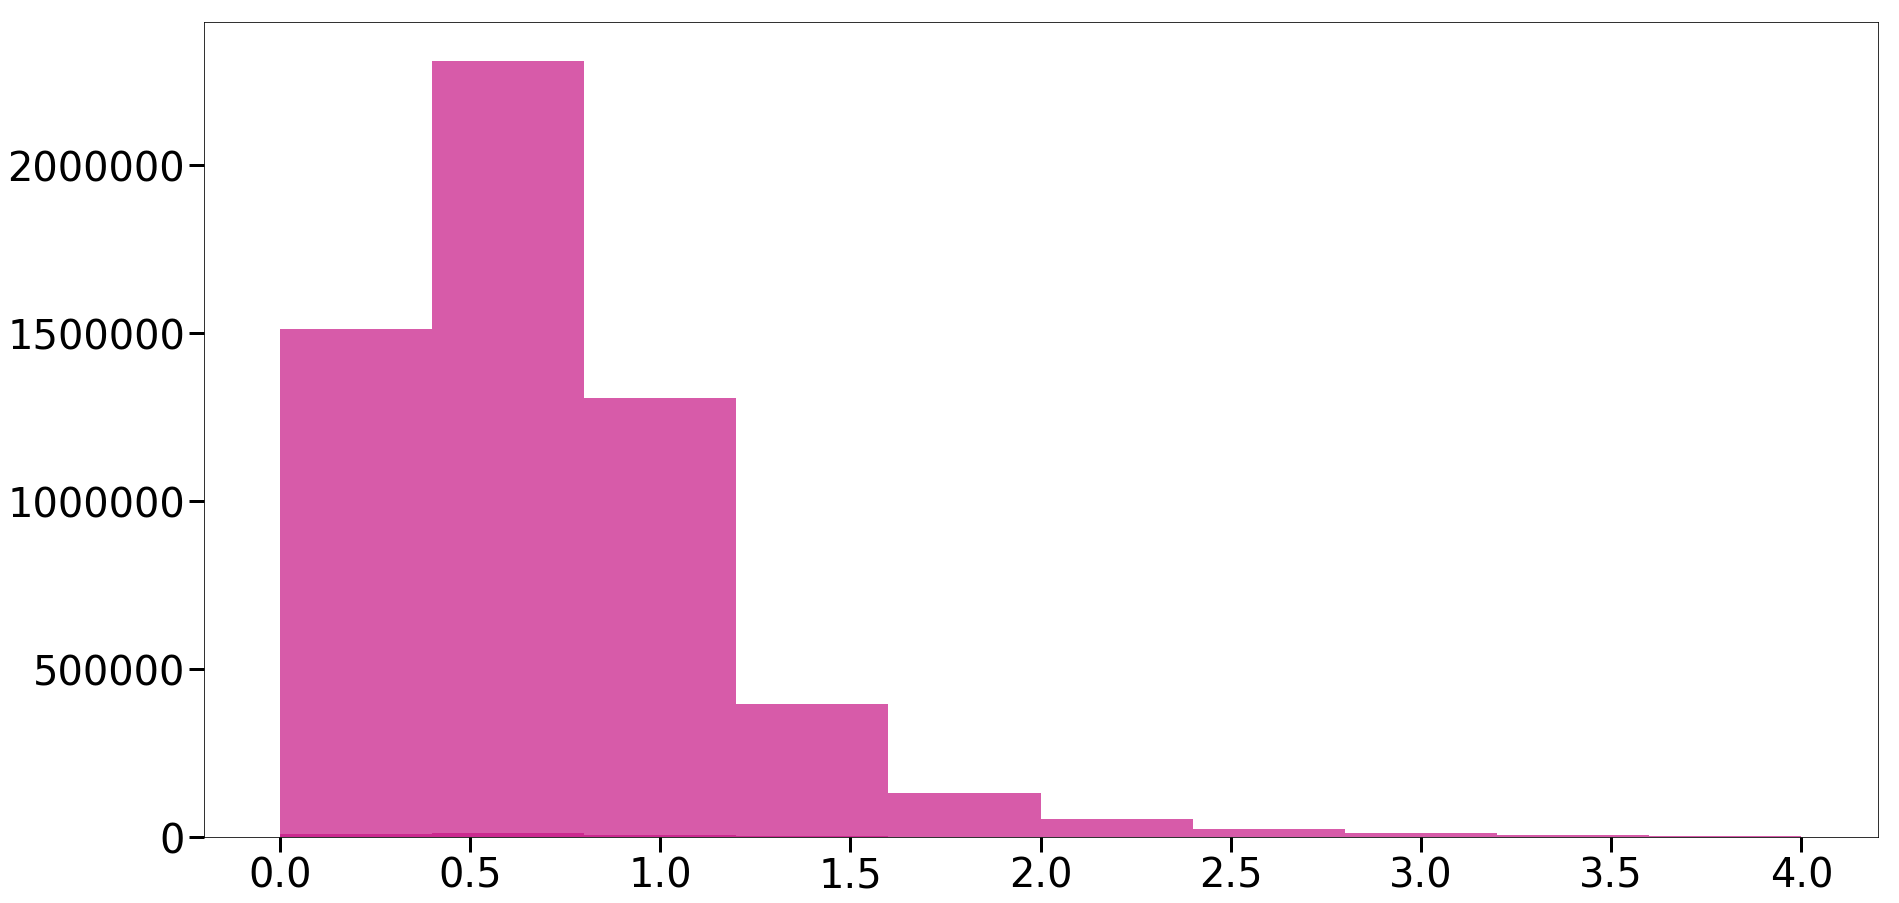

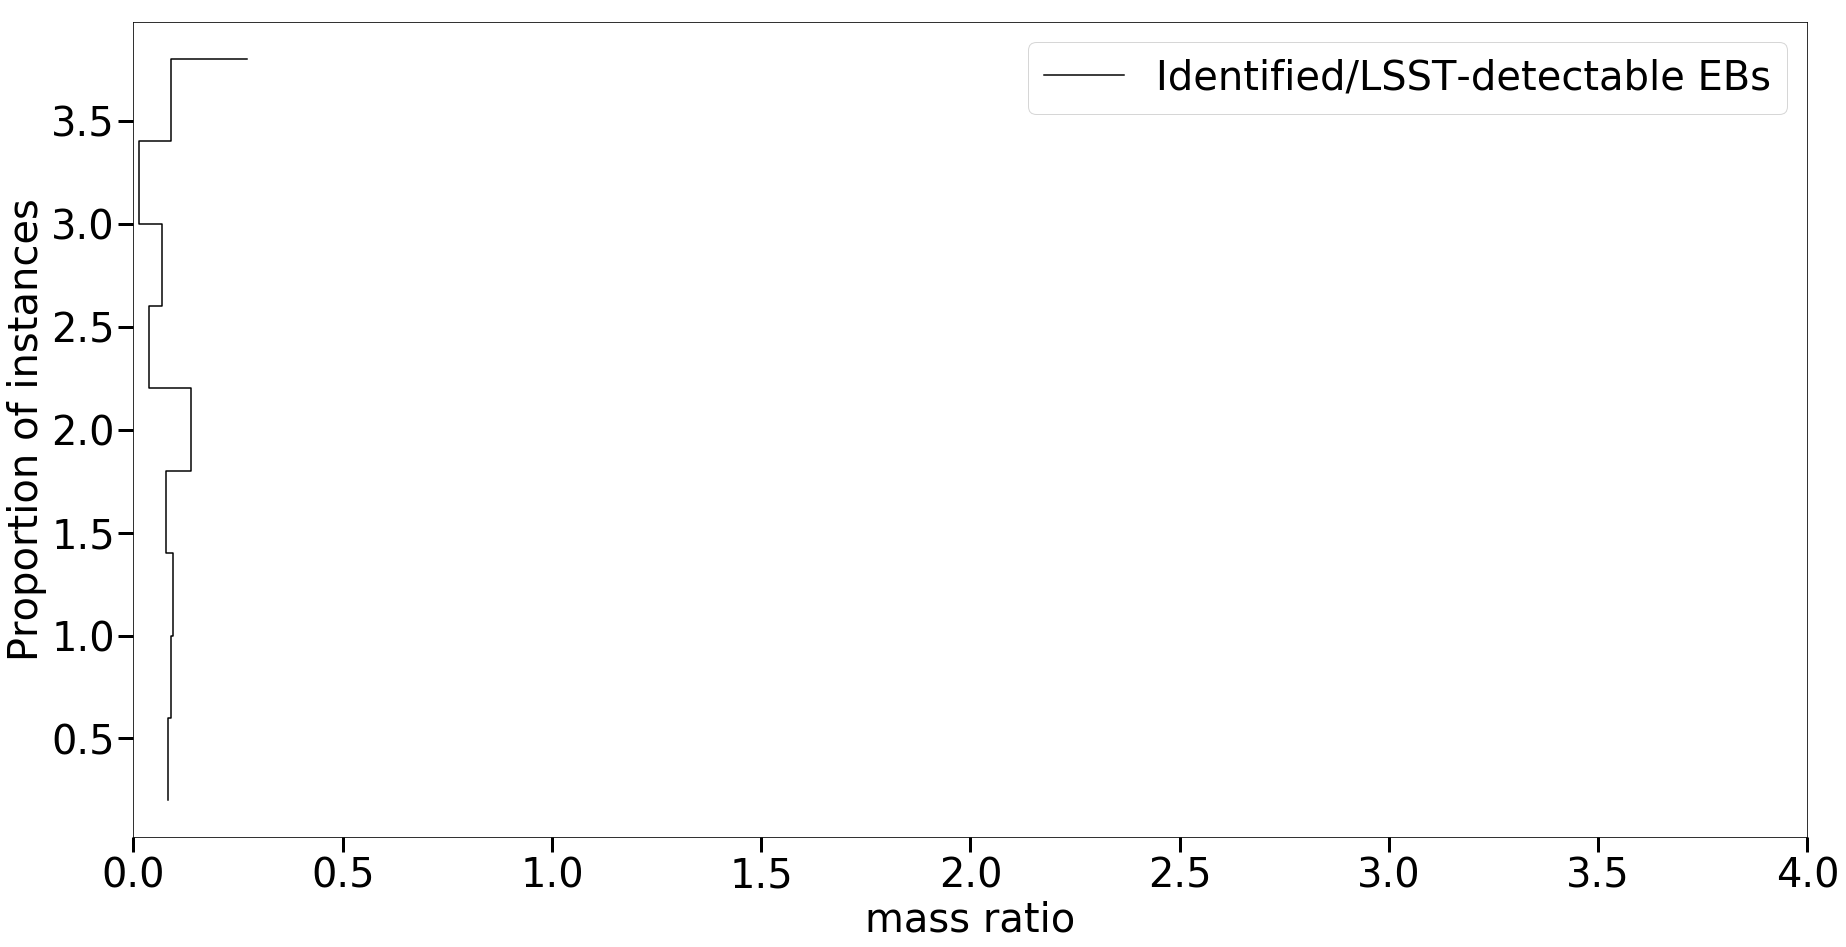

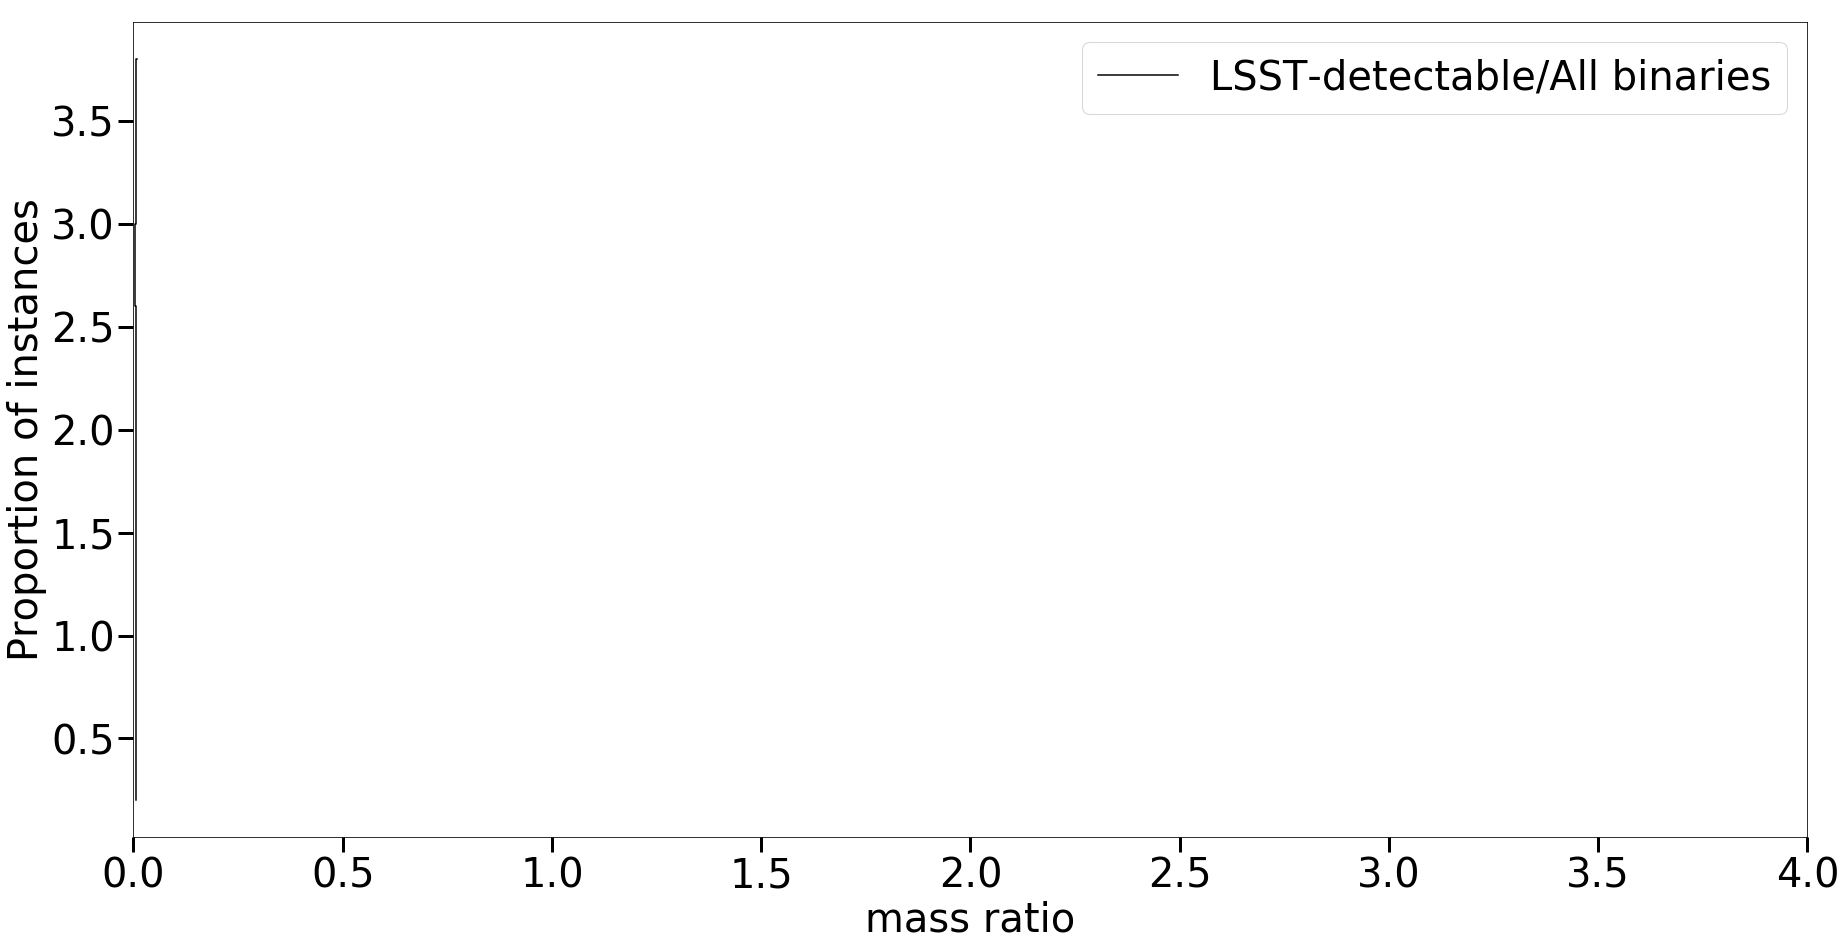

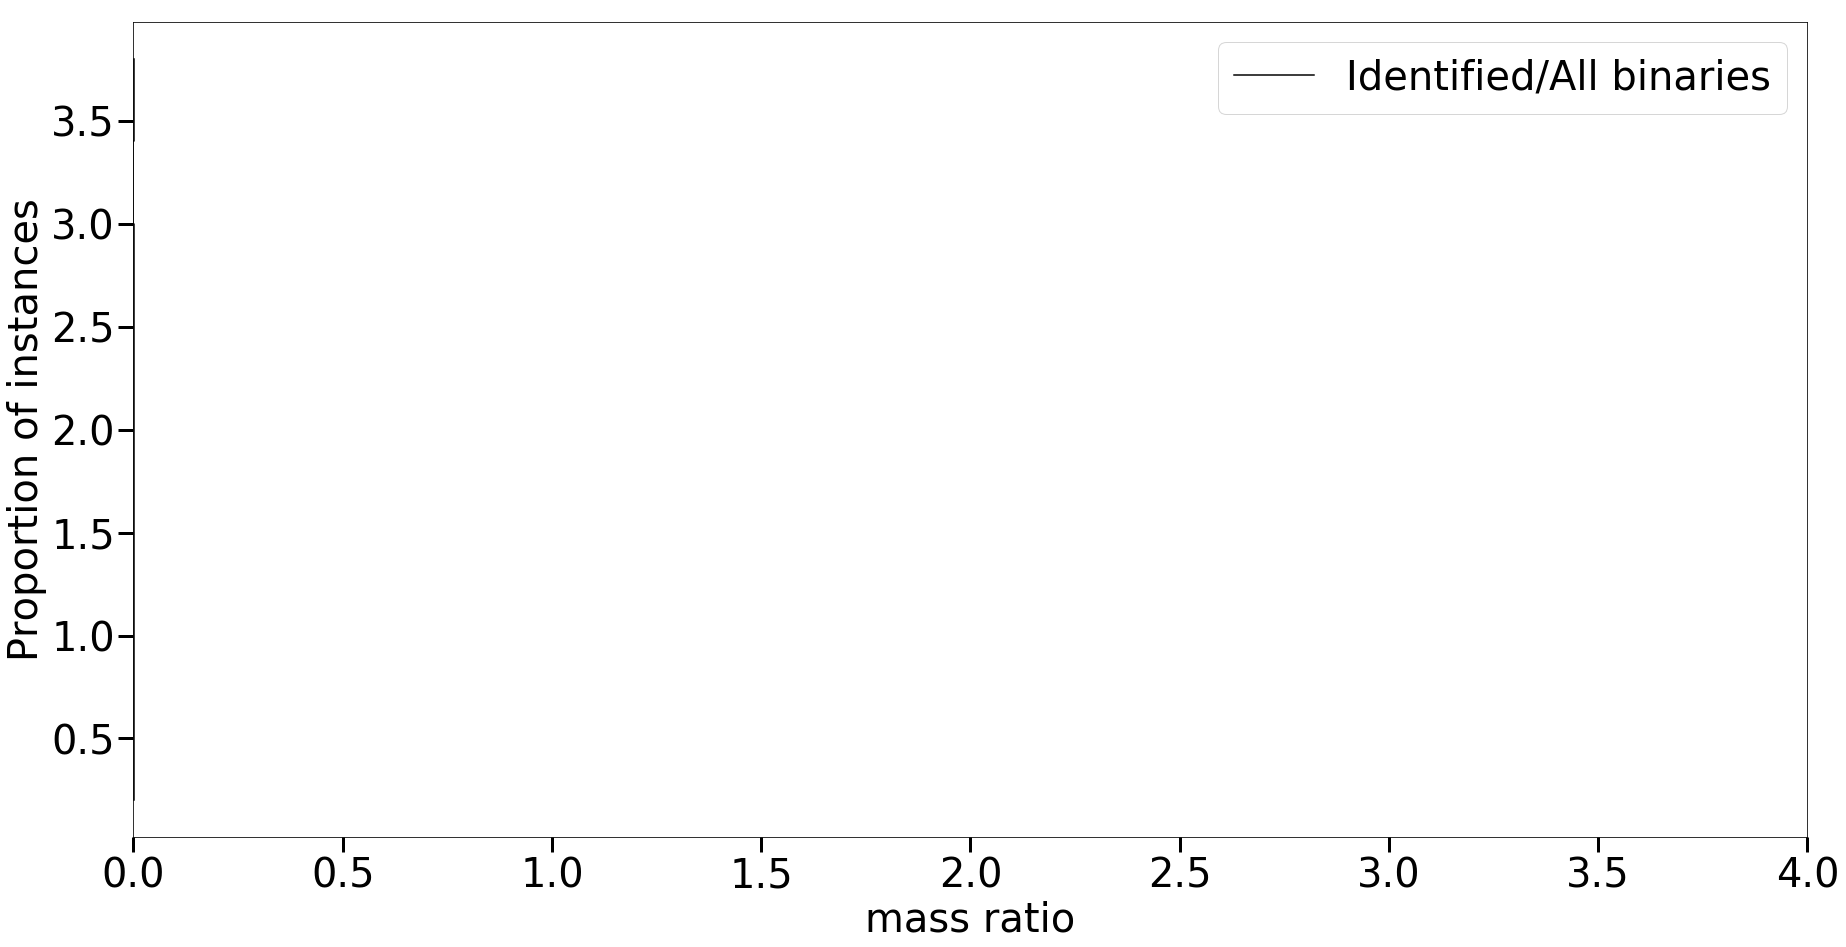

Ks_2sampResult(statistic=0.033639228198148463, pvalue=0.0017872018615622885)

In [15]:
fig = plt.figure(figsize=(30,15))
pylab.hist(mass_rat, bins = 10, range = (0, 1))
pylab.title('Number per mass_rat')
pylab.xlabel('mass_rat')
pylab.ylabel('N')
pylab.show()

fig = plt.figure(figsize=(30,15))
pylab.hist(mass_rat[use], bins = 10, range = (0, 1))
pylab.title('Number per mass_rat')
pylab.xlabel('mass_rat (err<0.1)')
pylab.ylabel('N')
pylab.show()

#bin_edges = [0, 0.25, 0.50, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0, 2.25, 2.50, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.0, 4.5]

mrd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(mass_rat, bins = 20, color = 'k', normed = True, label = "All binaries", range = (0,4))
#n20, bins20, patches20 = plt.hist(mass_rat[obs], bins = 100, color = 'mediumslateblue', alpha = 0.7, normed = True, label = "Observed binaries")
n10, bins10, patches10 = plt.hist(mass_rat[use], bins = 20, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (0,4))
plt.xlabel('Mass ratio')
plt.xlim([0,4])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
mrd.set_rasterized(True)
mrd.savefig("massrat_relativedistribution.eps")
mrd.savefig("massrat_relativedistribution.pdf")

obsmrd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(mass_rat, bins = 20, color = 'k', normed = True, label = "All binaries", range = (0,4))
n20, bins20, patches20 = plt.hist(mass_rat[obs], bins = 20, color = 'darkturquoise', alpha = 0.7, normed = True, label = "LSST-detectable EBs", range = (0,4))
#n10, bins10, patches10 = plt.hist(mass_rat[use], bins = 100, color = 'mediumvioletred', alpha = 0.5, normed = True, label = "Identified binaries")
plt.xlabel('Mass ratio')
plt.xlim([0,4])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsmrd.set_rasterized(True)
obsmrd.savefig("massrat_obs_relativedistribution.eps")
obsmrd.savefig("massrat_obs_relativedistribution.pdf")

obsidmrd = plt.figure(figsize=(20,15))
#n, bins, patches = plt.hist(mass_rat, bins = 100, color = 'k', normed = True, label = "All binaries")
n20, bins20, patches20 = plt.hist(mass_rat[obs], bins = 20, color = 'darkturquoise', alpha = 1.0, normed = True, label = "LSST-detectable EBs ", range = (0,20))
n10, bins10, patches10 = plt.hist(mass_rat[use], bins = 20, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (0,4))
plt.xlabel('Mass ratio')
plt.xlim([0,4])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsidmrd.set_rasterized(True)
obsidmrd.savefig("massrat_obsid_relativedistribution.eps")
obsidmrd.savefig("massrat_obsid_relativedistribution.pdf")

newbins=[]

for i in range(len(bins)-1):
  newbins.append((bins[i] + bins[i+1])/2.)

#print ("bin length = ", len(bins), "   bins = ", bins)
#print ("newbin length = ", len(newbins), "   newbins = ", newbins)

#divhistmrd = plt.figure(figsize=(20,15))
#plt.step(newbins, n10/n, label="Identified/All binaries")
#plt.step(newbins, n20/n, label="LSST-Detectable/All binaries")
#plt.step(newbins, n10/n20, label="Identified/LSST-detectable")
#plt.xlabel('Mass ratio')
#plt.ylabel('Normed proportion of instances')
#plt.legend(loc = "best", prop={'size': 30})
#plt.show()
#divhistmrd.set_rasterized(True)
#divhistmrd.savefig("massrat_divhist.eps")
#divhistmrd.savefig("massrat_divhist.pdf")



#densmrd = plt.figure(figsize=(30,15))
#sns.distplot(mass_rat, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'k', label = 'All binaries')
#sns.distplot(mass_rat[obs], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'darkturquoise', label = 'LSST-detectable EBs')
#sns.distplot(mass_rat[use], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'mediumvioletred', label = 'Identified EBs')
#plt.xlim([0,4])
#plt.xlabel('Mass ratio')
#plt.ylabel('Proportion of instances')
#plt.legend(loc = "best")
#plt.show()
#densmrd.set_rasterized(True)
#densmrd.savefig("massrat_dens.eps")
#densmrd.savefig("massrat_dens.pdf")


fig = plt.figure(figsize=(30,15))
n1, bins1, patches1 = plt.hist(mass_rat, bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "All binaries", range = (0,4))
n11, bins11, patches11 = plt.hist(mass_rat[use], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "Identified EBs", range = (0,4))
n21, bins21, patches21 = plt.hist(mass_rat[obs], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "LSST-detectable EBs", range = (0,4))
plt.show

newbins1=[]

for i in range(len(bins1)-1):
  newbins1.append((bins1[i] + bins1[i+1])/2.)

densdivmrd1 = plt.figure(figsize=(30,15))
plt.step(n11/n21, newbins1, color = 'k', label = 'Identified/LSST-detectable EBs')
plt.xlim([0,4])
plt.xlabel('mass ratio')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivmrd1.set_rasterized(True)
densdivmrd1.savefig("massrat_ID-LD_dens.eps")
densdivmrd1.savefig("massrat_ID-LD_dens.pdf")


densdivmrd2 = plt.figure(figsize=(30,15))
plt.step(n21/n1, newbins1, color = 'k', label = 'LSST-detectable/All binaries')
plt.xlim([0,4])
plt.xlabel('mass ratio')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivmrd2.set_rasterized(True)
densdivmrd2.savefig("massrat_LD-AB_dens.eps")
densdivmrd2.savefig("massrat_LD-AB_dens.pdf")

densdivmrd3 = plt.figure(figsize=(30,15))
plt.step(n11/n1, newbins1, color = 'k', label = 'Identified/All binaries')
plt.xlim([0,4])
plt.xlabel('mass ratio')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivmrd3.set_rasterized(True)
densdivmrd3.savefig("massrat_ID-AB_dens.eps")
densdivmrd3.savefig("massrat_ID-AB_dens.pdf")



#print ("ks stat mass_rat, mass_rat[use]")
stats.ks_2samp(mass_rat, mass_rat[use])
#print ("##########")
#print ("ks stat mass_rat[obs], mass_rat[use]")
#stats.ks_2samp(mass_rat[obs], mass_rat[use])
#print ("##########")
#print ("ks stat mass_Rat, mass_rat[obs]")
#stats.ks_2samp(mass_rat, mass_rat[obs])

# RADIUS

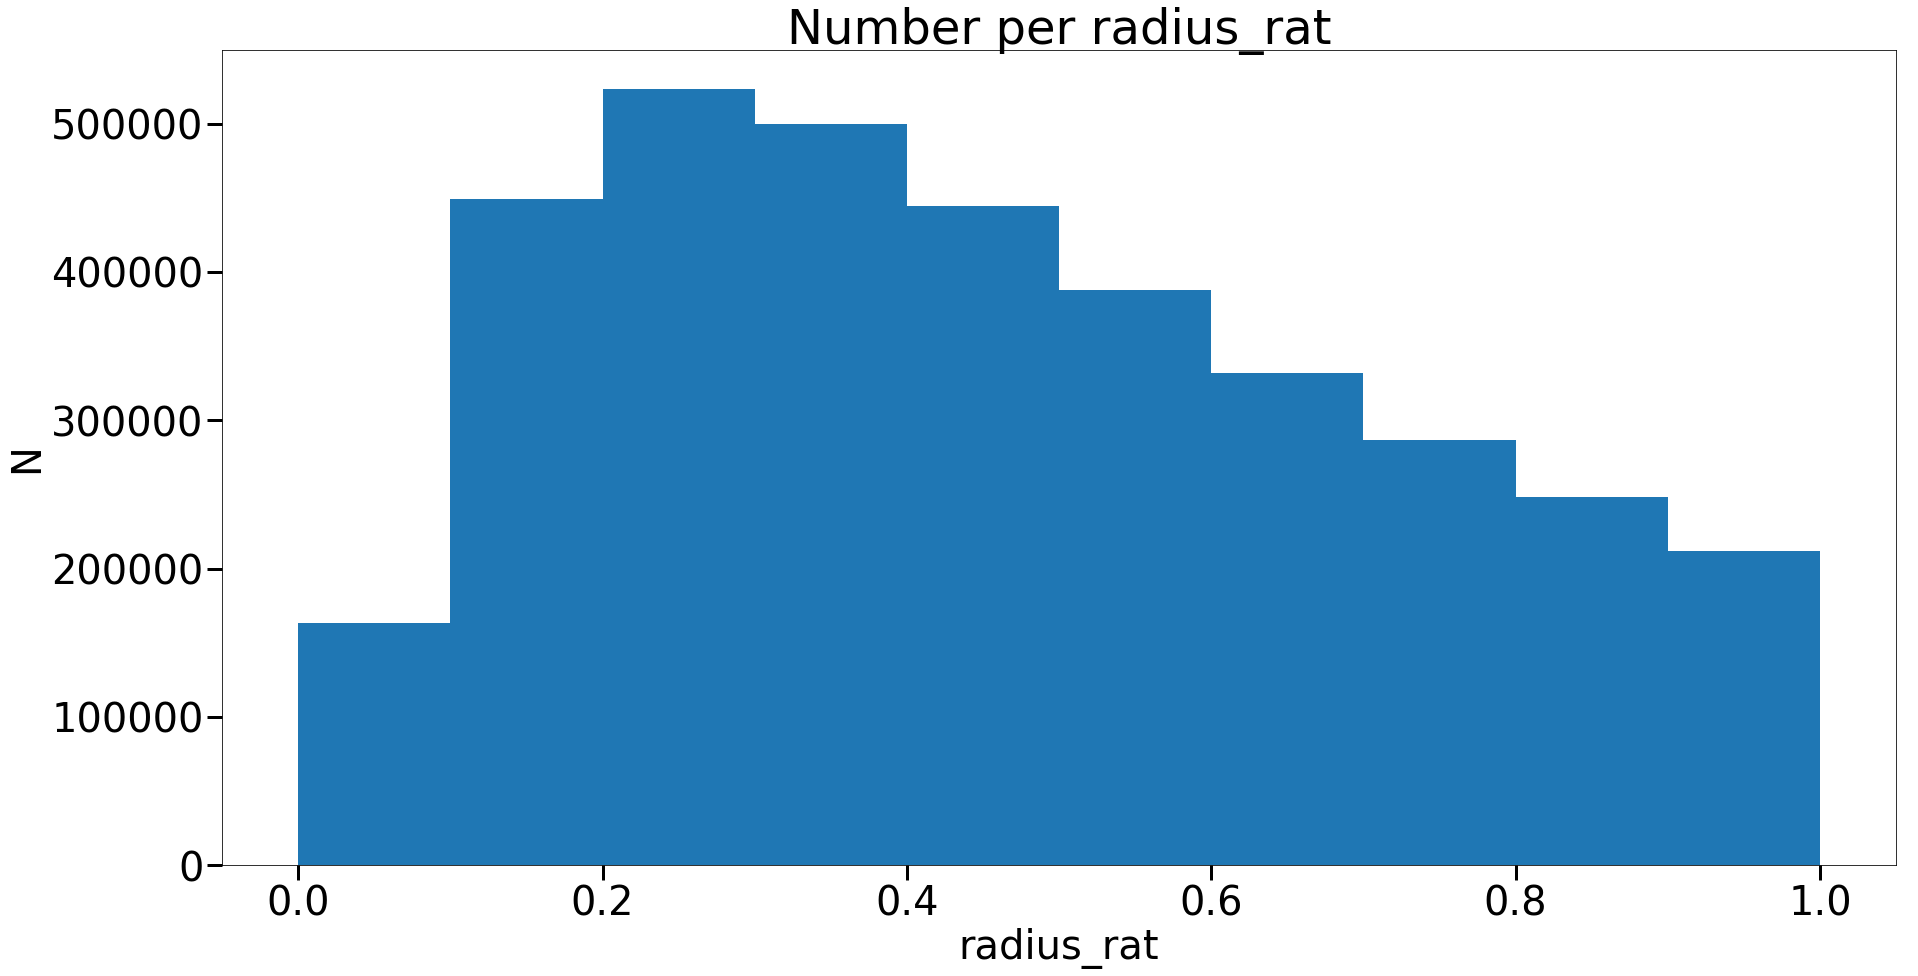

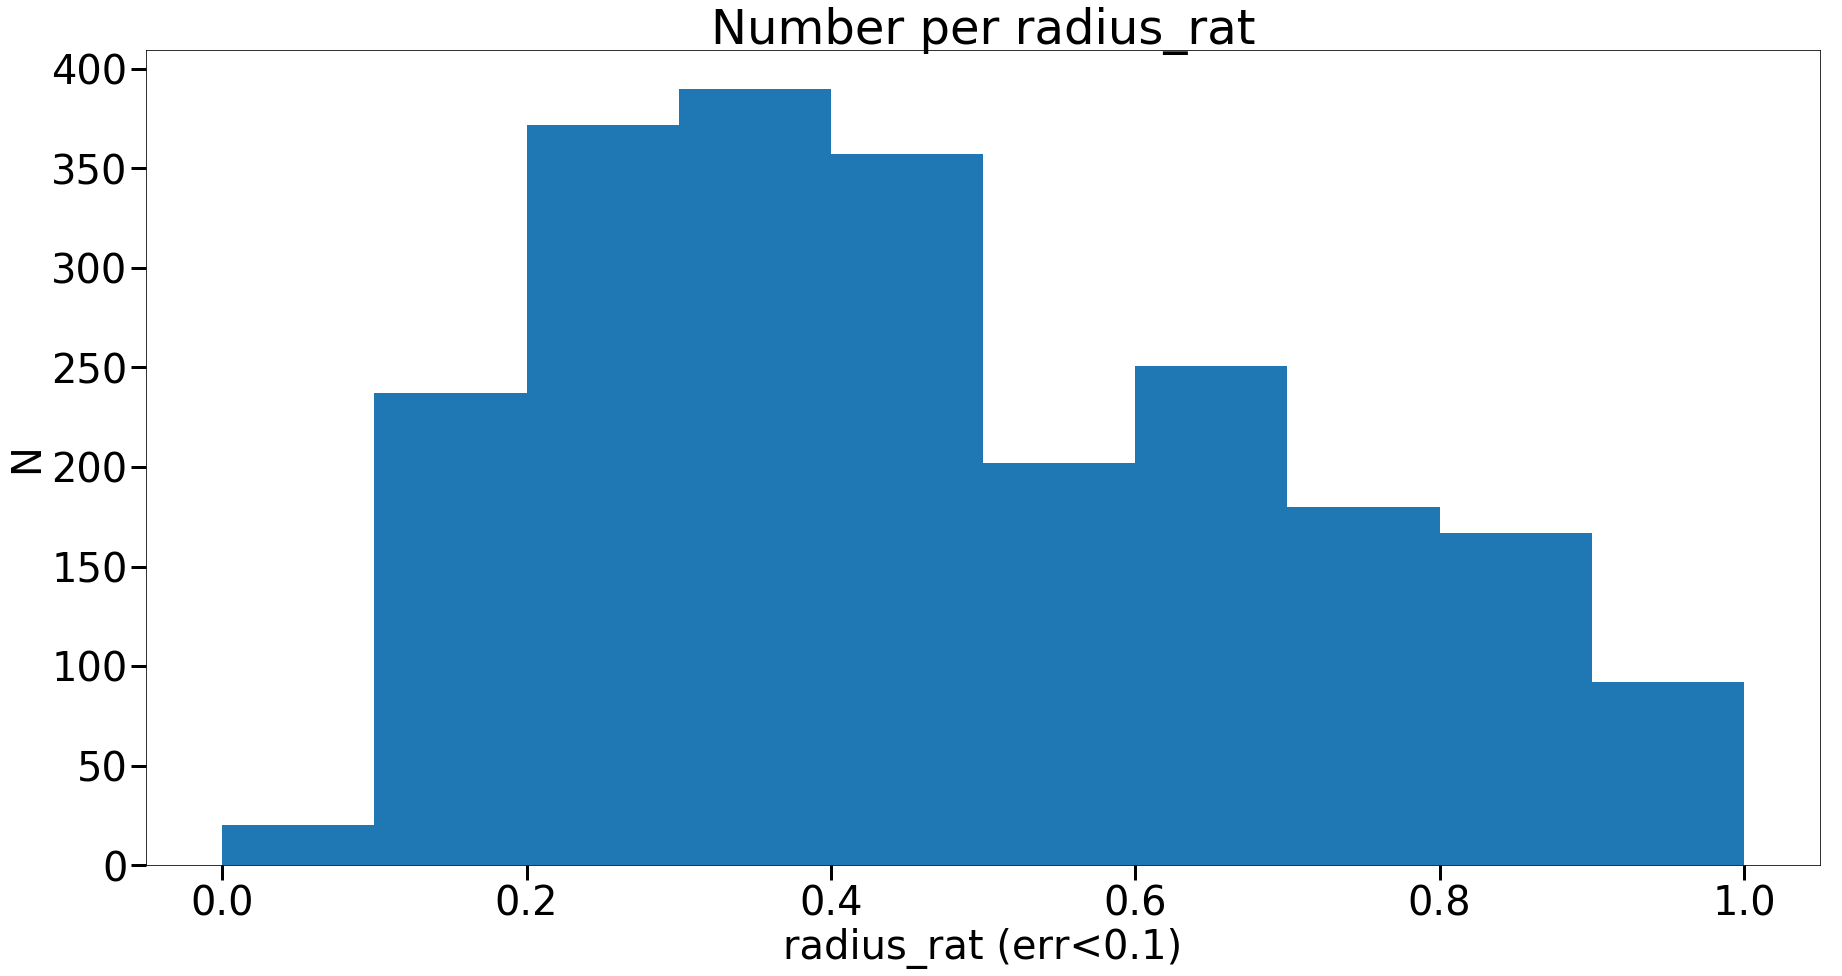

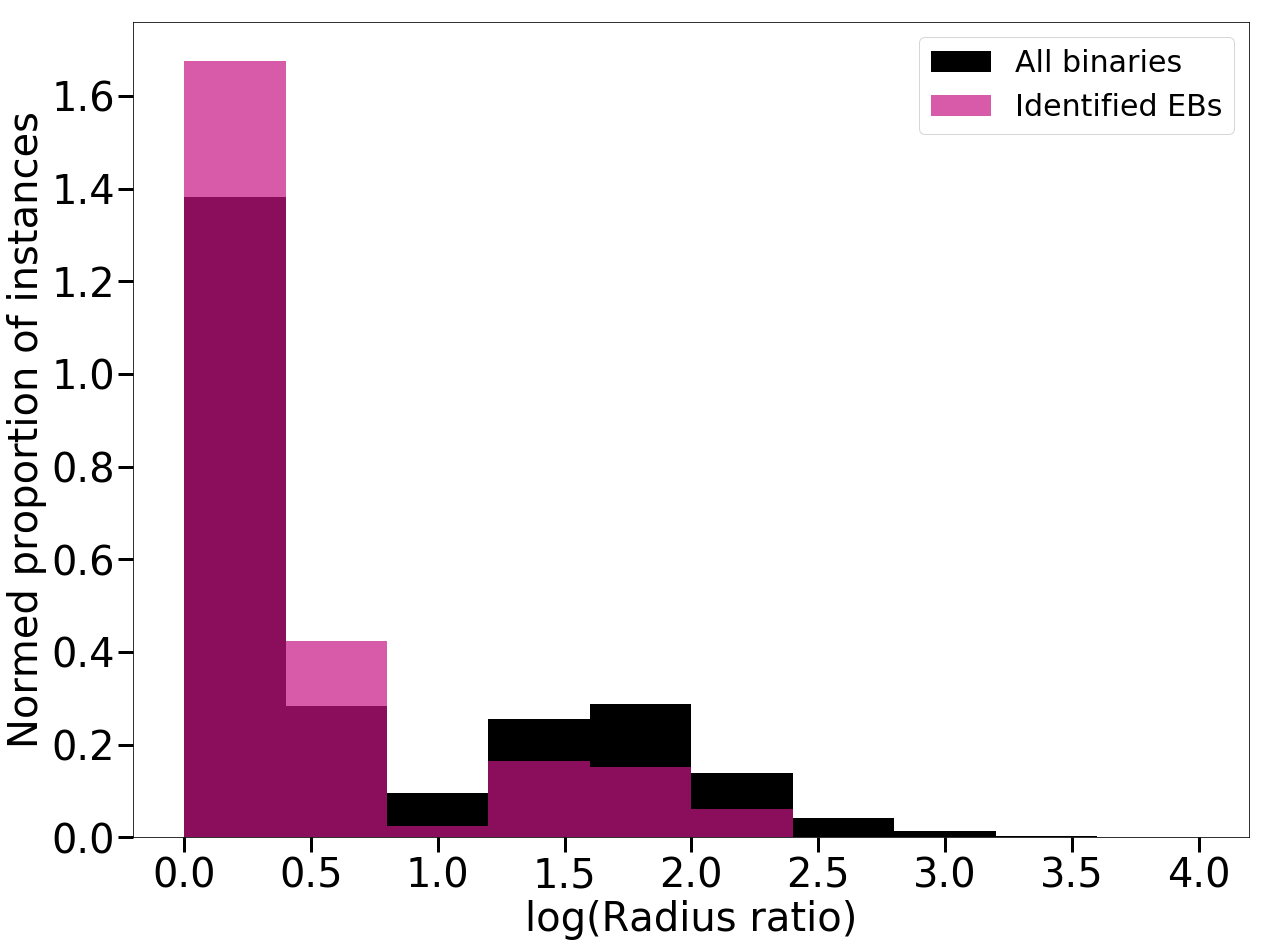

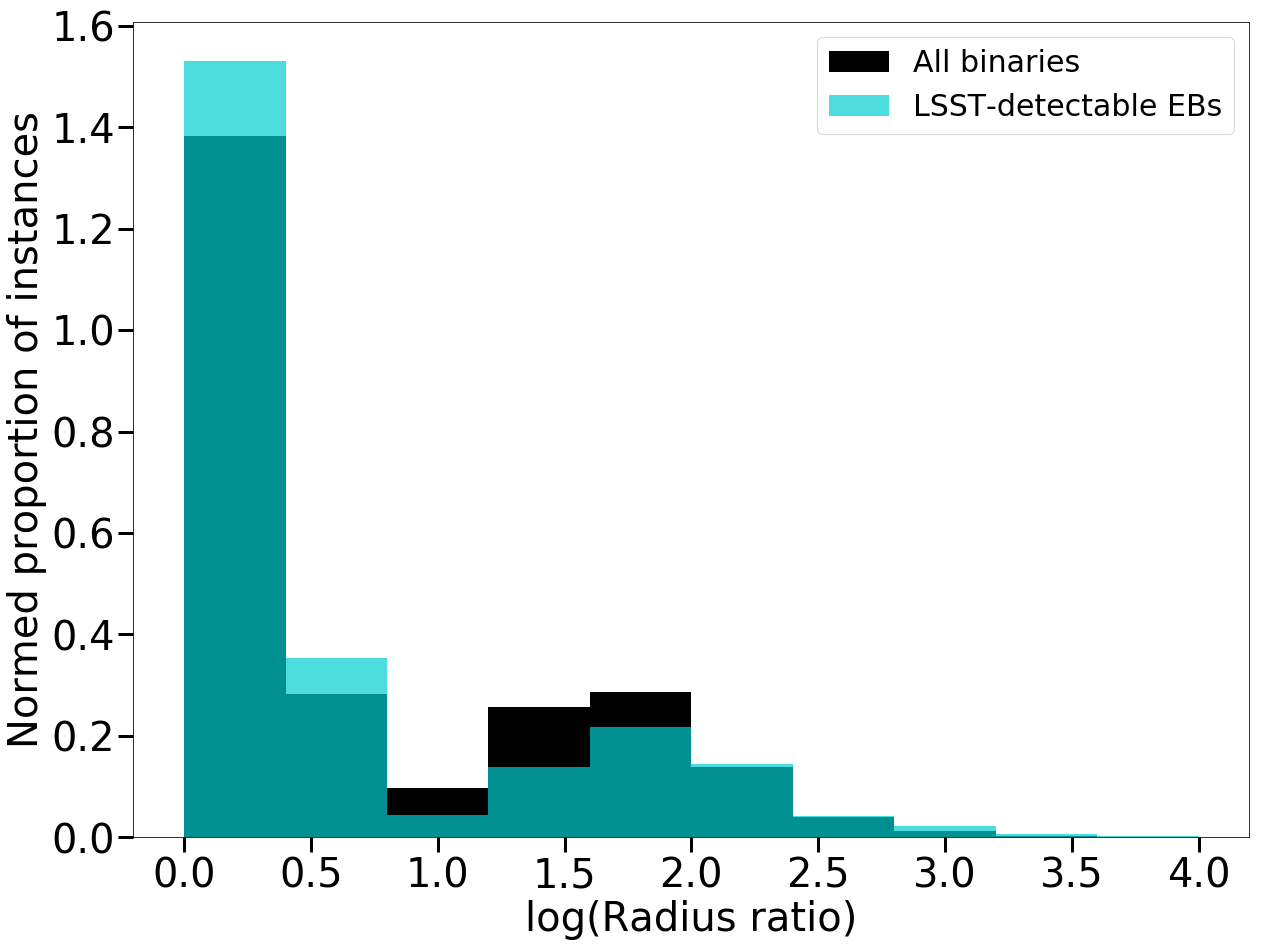

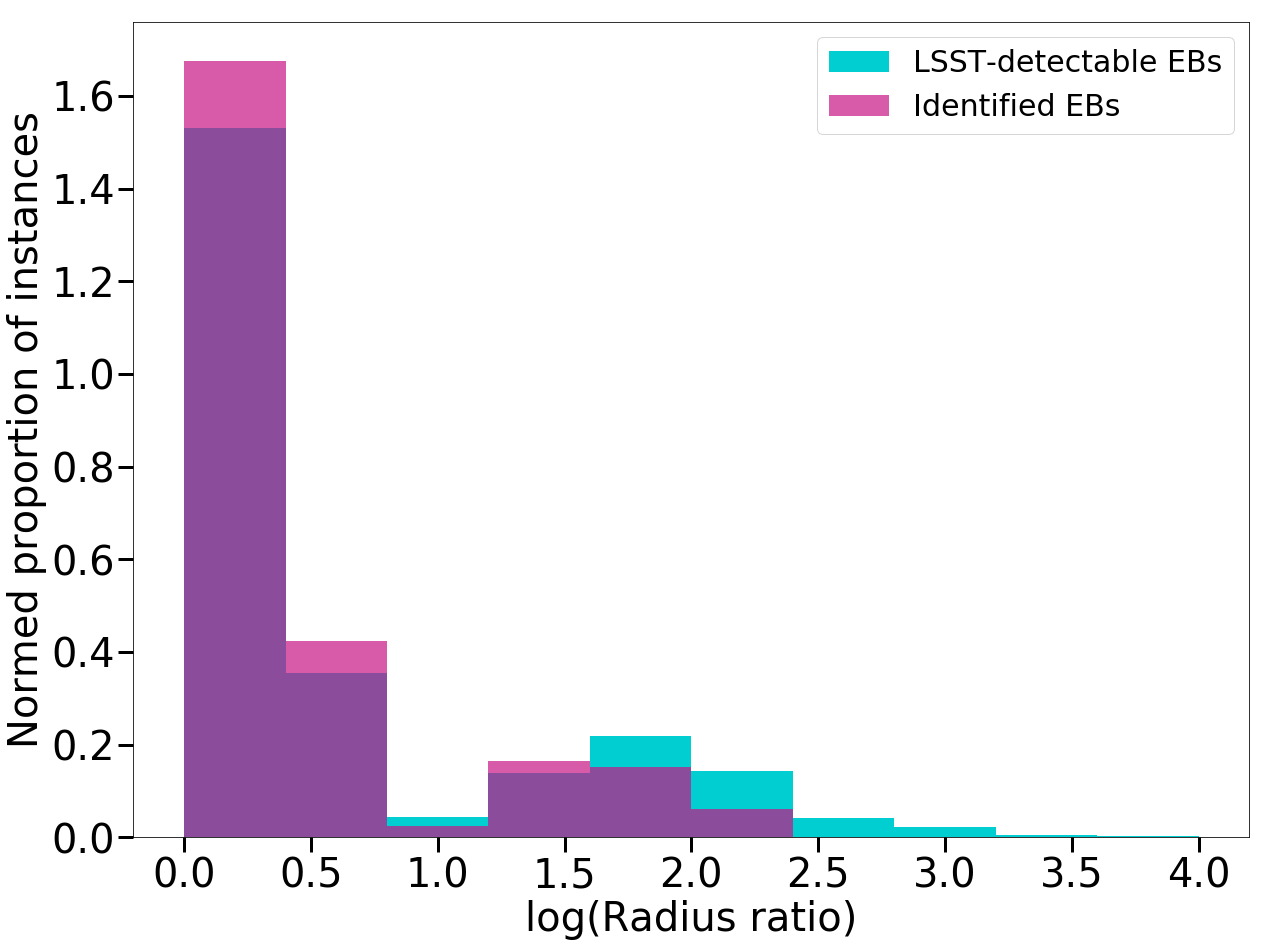

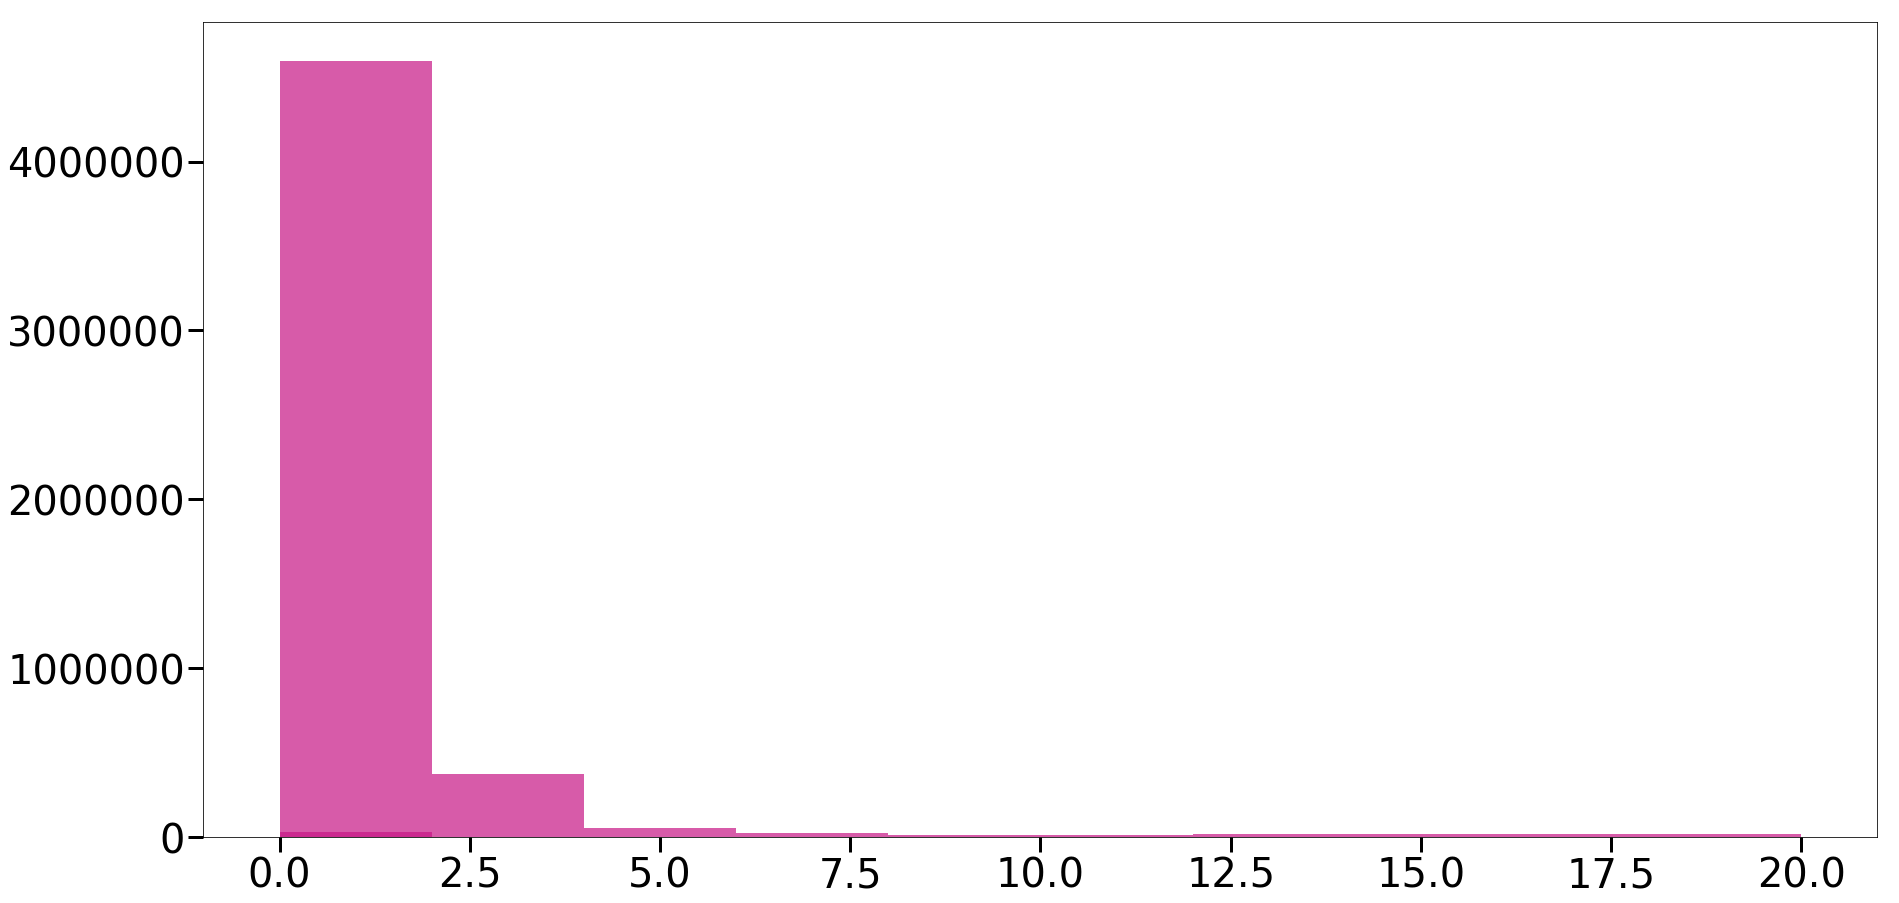

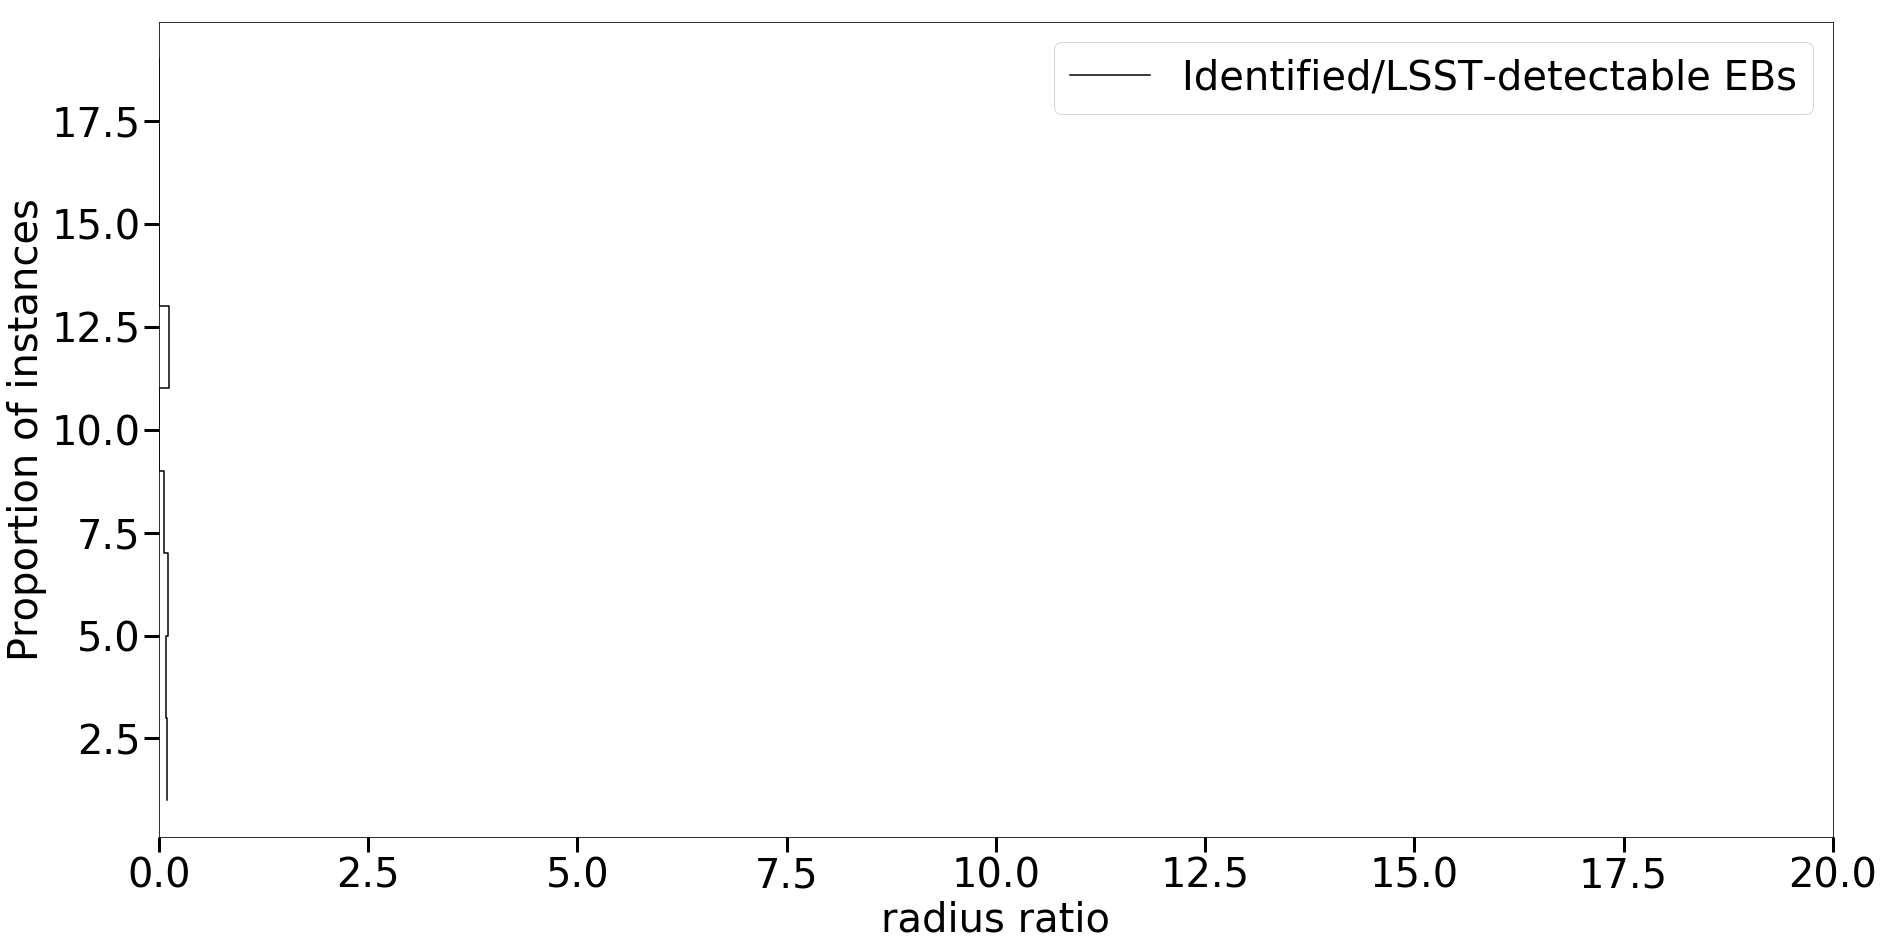

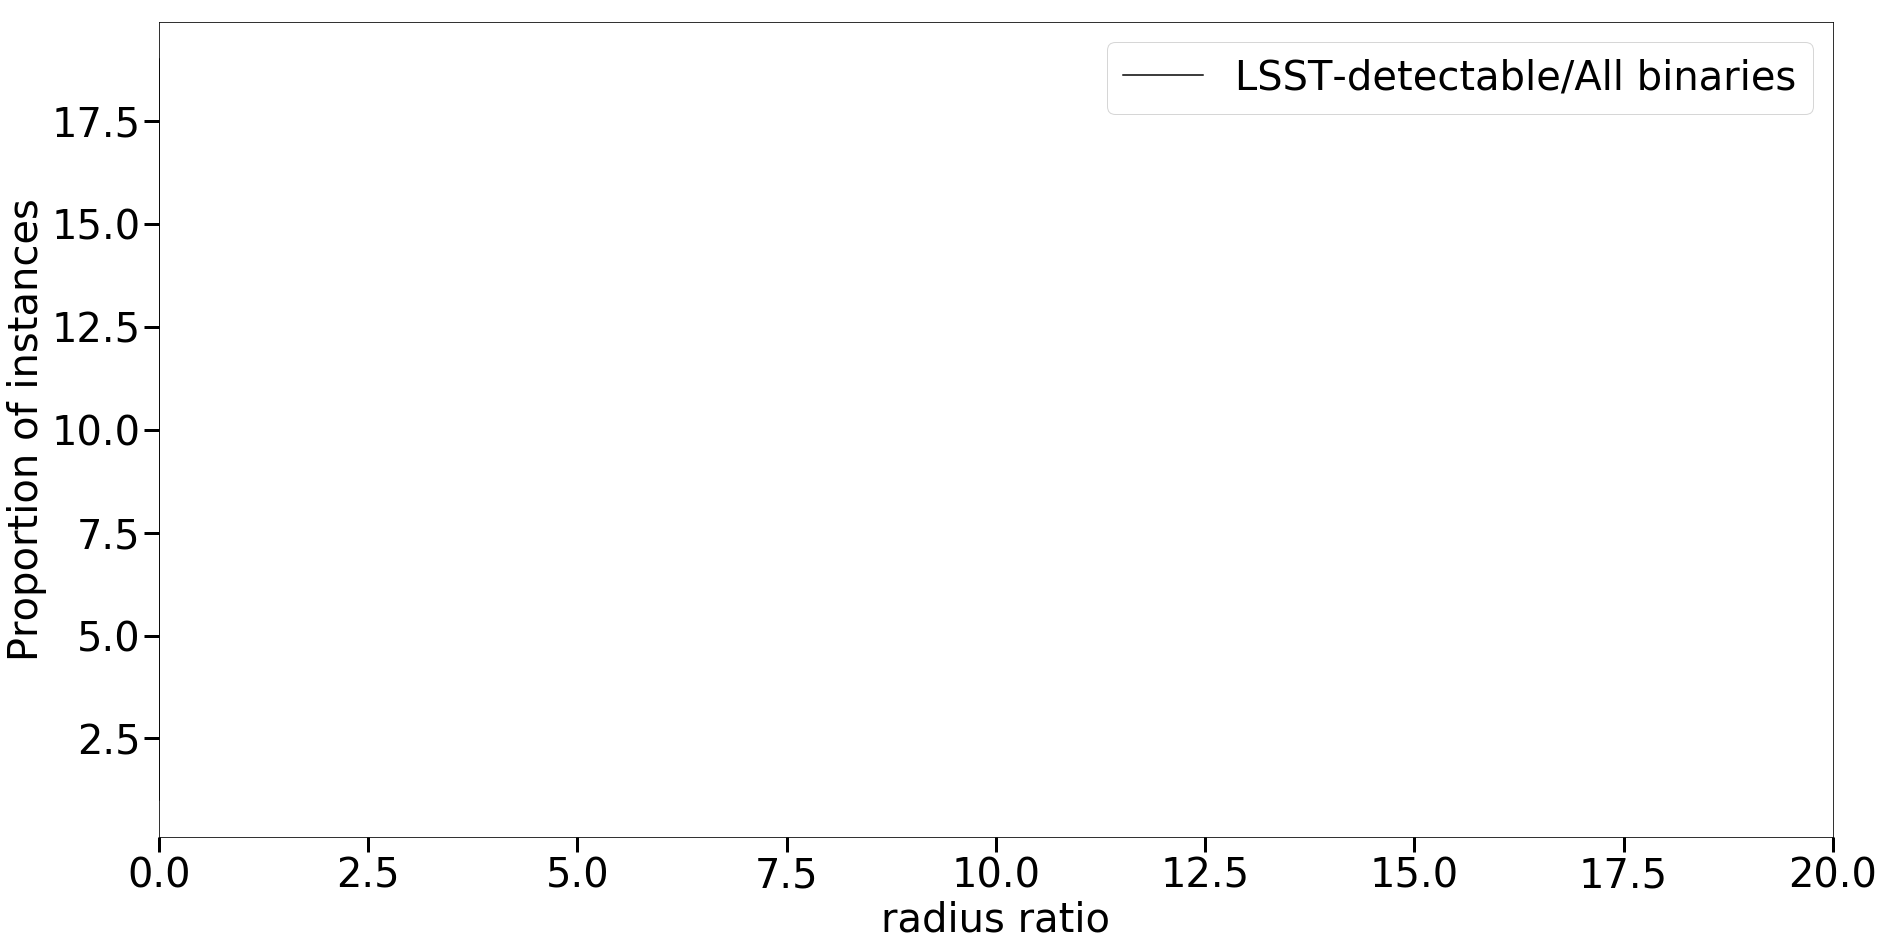

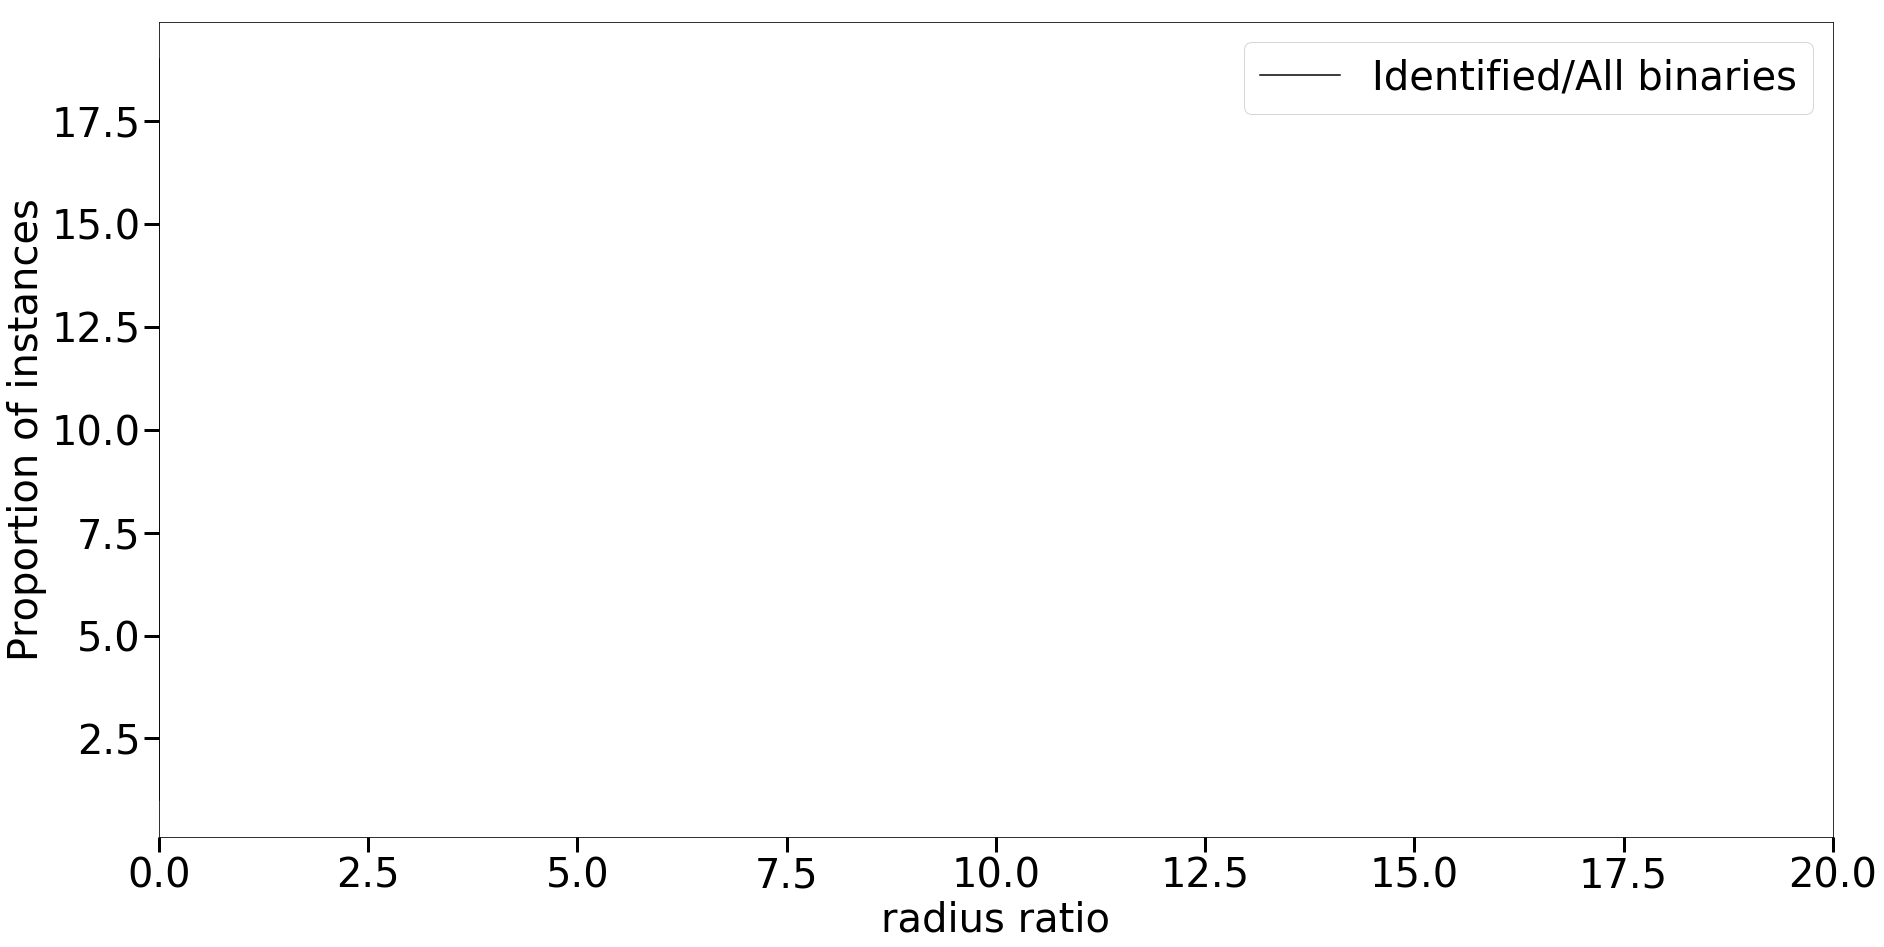

Ks_2sampResult(statistic=0.1321947947235419, pvalue=1.6481608313633638e-47)

In [16]:
fig = plt.figure(figsize=(30,15))
pylab.hist(radius_rat, bins = 10, range = (0, 1))
pylab.title('Number per radius_rat')
pylab.xlabel('radius_rat')
pylab.ylabel('N')
pylab.show()

fig = plt.figure(figsize=(30,15))
pylab.hist(radius_rat[use], bins = 10, range = (0, 1))
pylab.title('Number per radius_rat')
pylab.xlabel('radius_rat (err<0.1)')
pylab.ylabel('N')
pylab.show()

rrd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(np.log10(radius_rat), bins = 10, color = 'k', normed = True, label = "All binaries", range = (0,4))
n10, bins10, patches10 = plt.hist(np.log10(radius_rat[use]), bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (0,4))
plt.xlabel('log(Radius ratio)')
#plt.xlim([0,11.5])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
rrd.set_rasterized(True)
rrd.savefig("radiusrat_relativedistribution.eps")
rrd.savefig("radiusrat_relativedistribution.pdf")

obsrrd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(np.log10(radius_rat), bins = 10, color = 'k', normed = True, label = "All binaries", range = (0,4))
n20, bins20, patches20 = plt.hist(np.log10(radius_rat[obs]), bins = 10, color = 'darkturquoise', alpha = 0.7, normed = True, label = "LSST-detectable EBs", range = (0,4))
#n10, bins10, patches10 = plt.hist(mass_rat[use], bins = 100, color = 'mediumvioletred', alpha = 0.5, normed = True, label = "Identified binaries")
plt.xlabel('log(Radius ratio)')
#plt.xlim([0,40])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsrrd.set_rasterized(True)
obsrrd.savefig("radiusrat_obs_relativedistribution.eps")
obsrrd.savefig("radiusrat_obs_relativedistribution.pdf")

obsidrrd = plt.figure(figsize=(20,15))
#n, bins, patches = plt.hist(mass_rat, bins = 100, color = 'k', normed = True, label = "All binaries")
n20, bins20, patches20 = plt.hist(np.log10(radius_rat[obs]), bins = 10, color = 'darkturquoise', alpha = 1.0, normed = True, label = "LSST-detectable EBs", range = (0,4))
n10, bins10, patches10 = plt.hist(np.log10(radius_rat[use]), bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (0,4))
plt.xlabel('log(Radius ratio)')
#plt.xlim([0,20])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsidrrd.set_rasterized(True)
obsidrrd.savefig("radiusrat_obsid_relativedistribution.eps")
obsidrrd.savefig("radiusrat_obsid_relativedistribution.pdf")


newbins=[]

for i in range(len(bins)-1):
  newbins.append((bins[i] + bins[i+1])/2.)

#print ("bin length = ", len(bins), "   bins = ", bins)
#print ("newbin length = ", len(newbins), "   newbins = ", newbins)

#divhistrrd = plt.figure(figsize=(20,15))
#plt.step(newbins, n10/n, label="Identified/All binaries")
#plt.step(newbins, n20/n, label="LSST-Detectable/All binaries")
#plt.step(newbins, n10/n20, label="Identified/LSST-detectable")
#plt.xlabel('Radius ratio')
#plt.ylabel('Normed proportion of instances')
#plt.legend(loc = "best", prop={'size': 30})
#plt.show()
#divhistrrd.set_rasterized(True)
#divhistrrd.savefig("radrat_divhist.eps")
#divhistrrd.savefig("radrat_divhist.pdf")

#densrrd = plt.figure(figsize=(30,15))
#sns.distplot(radius_rat, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'k', label = 'All binaries')
#sns.distplot(radius_rat[obs], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'darkturquoise', label = 'LSST-detectable EBs')
#sns.distplot(radius_rat[use], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'mediumvioletred', label = 'Identified EBs')
#plt.xlim([0,20])
#plt.xlabel('Radius ratio')
#plt.ylabel('Proportion of instances')
#plt.legend(loc = "best")
#plt.show()
#densrrd.set_rasterized(True)
#densrrd.savefig("radiusrat_dens.eps")
#densrrd.savefig("radiusrat_dens.pdf")


fig = plt.figure(figsize=(30,15))
n1, bins1, patches1 = plt.hist(radius_rat, bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "All binaries", range = (0,20))
n11, bins11, patches11 = plt.hist(radius_rat[use], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "Identified EBs", range = (0,20))
n21, bins21, patches21 = plt.hist(radius_rat[obs], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "LSST-detectable EBs", range = (0,20))
plt.show

newbins1=[]

for i in range(len(bins1)-1):
  newbins1.append((bins1[i] + bins1[i+1])/2.)

densdivrrd1 = plt.figure(figsize=(30,15))
plt.step(n11/n21, newbins1, color = 'k', label = 'Identified/LSST-detectable EBs')
plt.xlim([0,20])
plt.xlabel('radius ratio')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivrrd1.set_rasterized(True)
densdivrrd1.savefig("radrat_ID-LD_dens.eps")
densdivrrd1.savefig("radrat_ID-LD_dens.pdf")


densdivrrd2 = plt.figure(figsize=(30,15))
plt.step(n21/n1, newbins1, color = 'k', label = 'LSST-detectable/All binaries')
plt.xlim([0,20])
plt.xlabel('radius ratio')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivrrd2.set_rasterized(True)
densdivrrd2.savefig("radrat_LD-AB_dens.eps")
densdivrrd2.savefig("radrat_LD-AB_dens.pdf")


densdivrrd3 = plt.figure(figsize=(30,15))
plt.step(n11/n1, newbins1, color = 'k', label = 'Identified/All binaries')
plt.xlim([0,20])
plt.xlabel('radius ratio')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivrrd3.set_rasterized(True)
densdivrrd3.savefig("radrat_ID-AB_dens.eps")
densdivrrd3.savefig("radrat_ID-AB_dens.pdf")



stats.ks_2samp(radius_rat, radius_rat[use])

# ECCENTRICITY

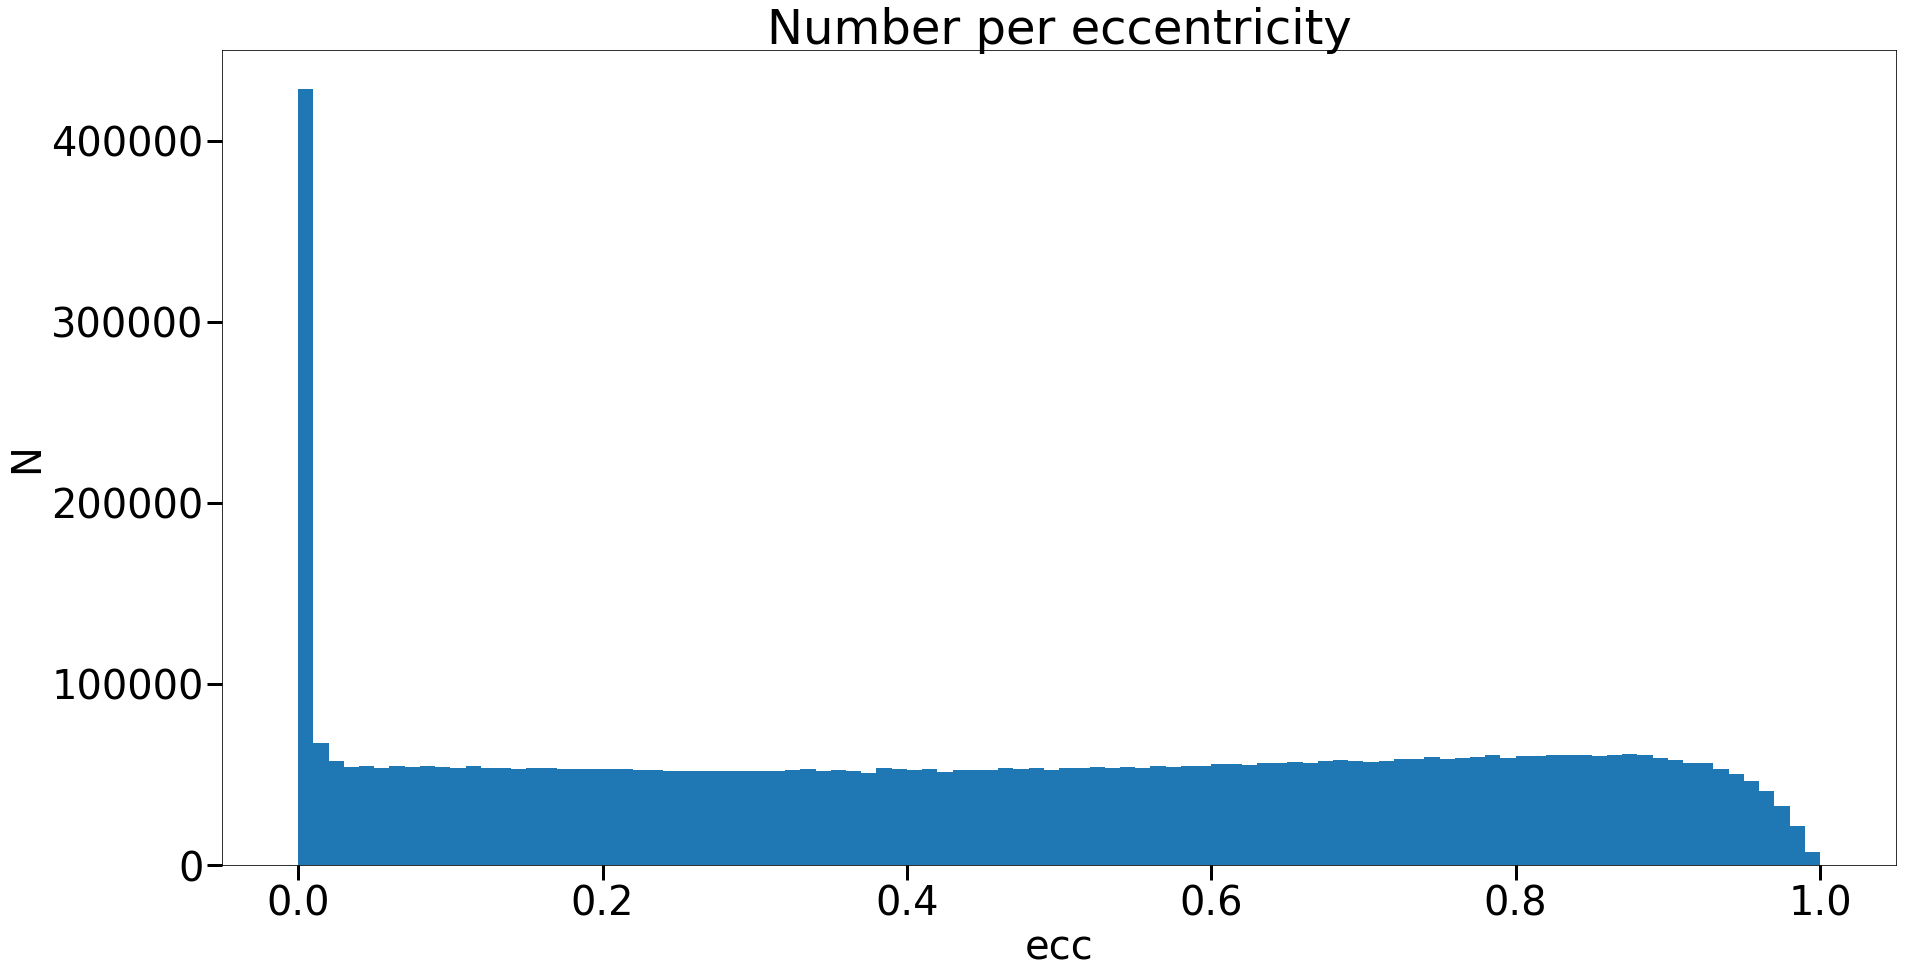

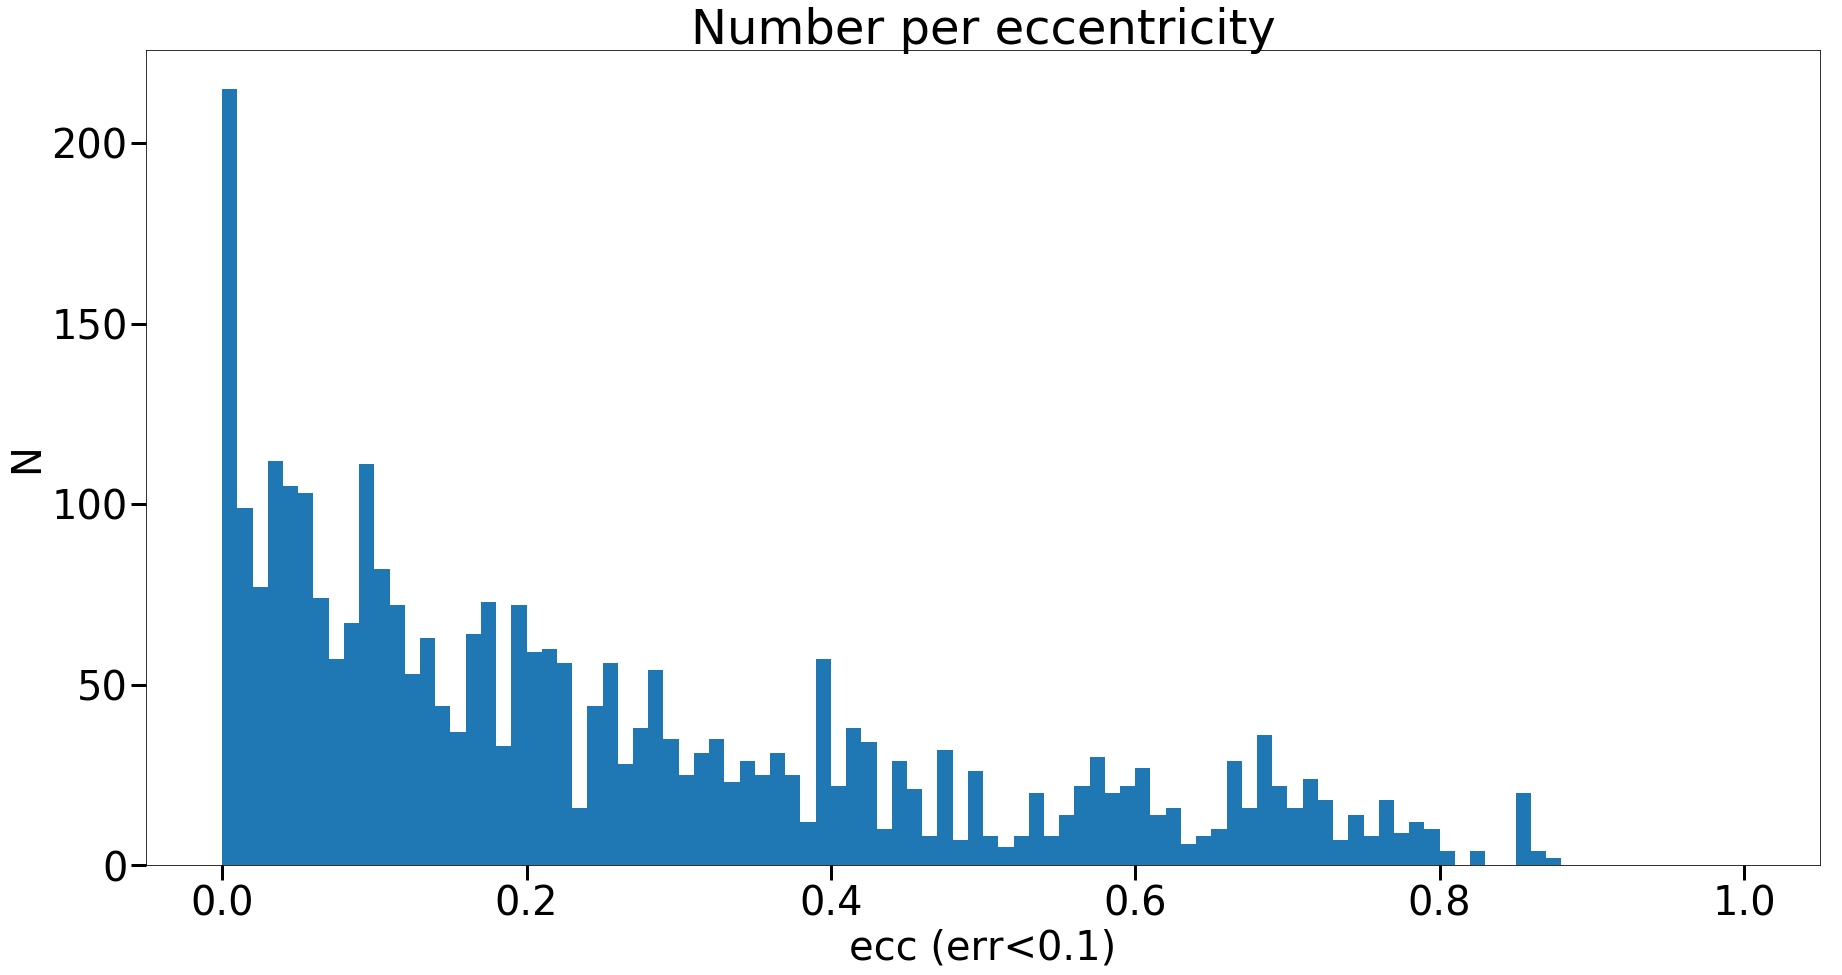

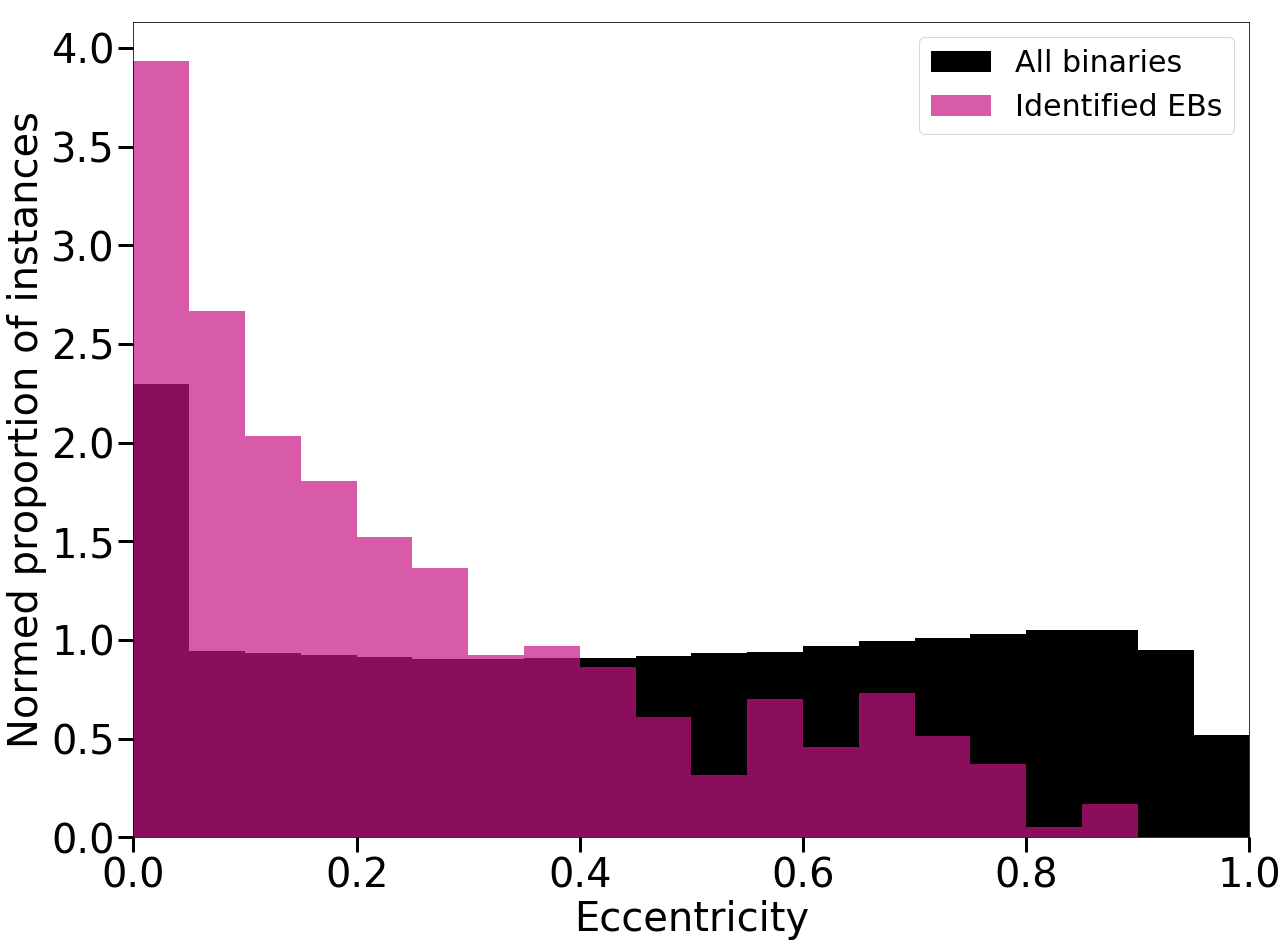

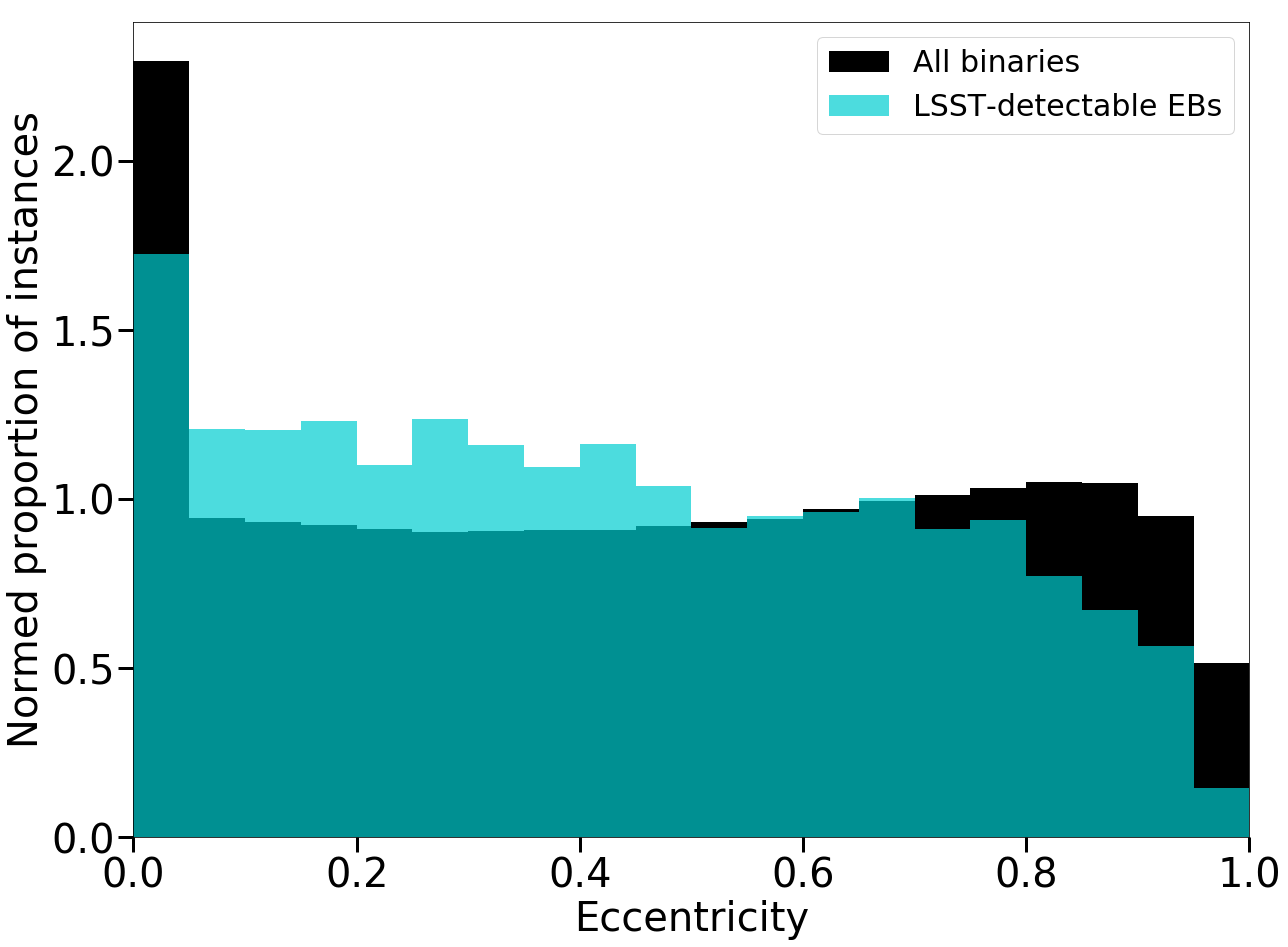

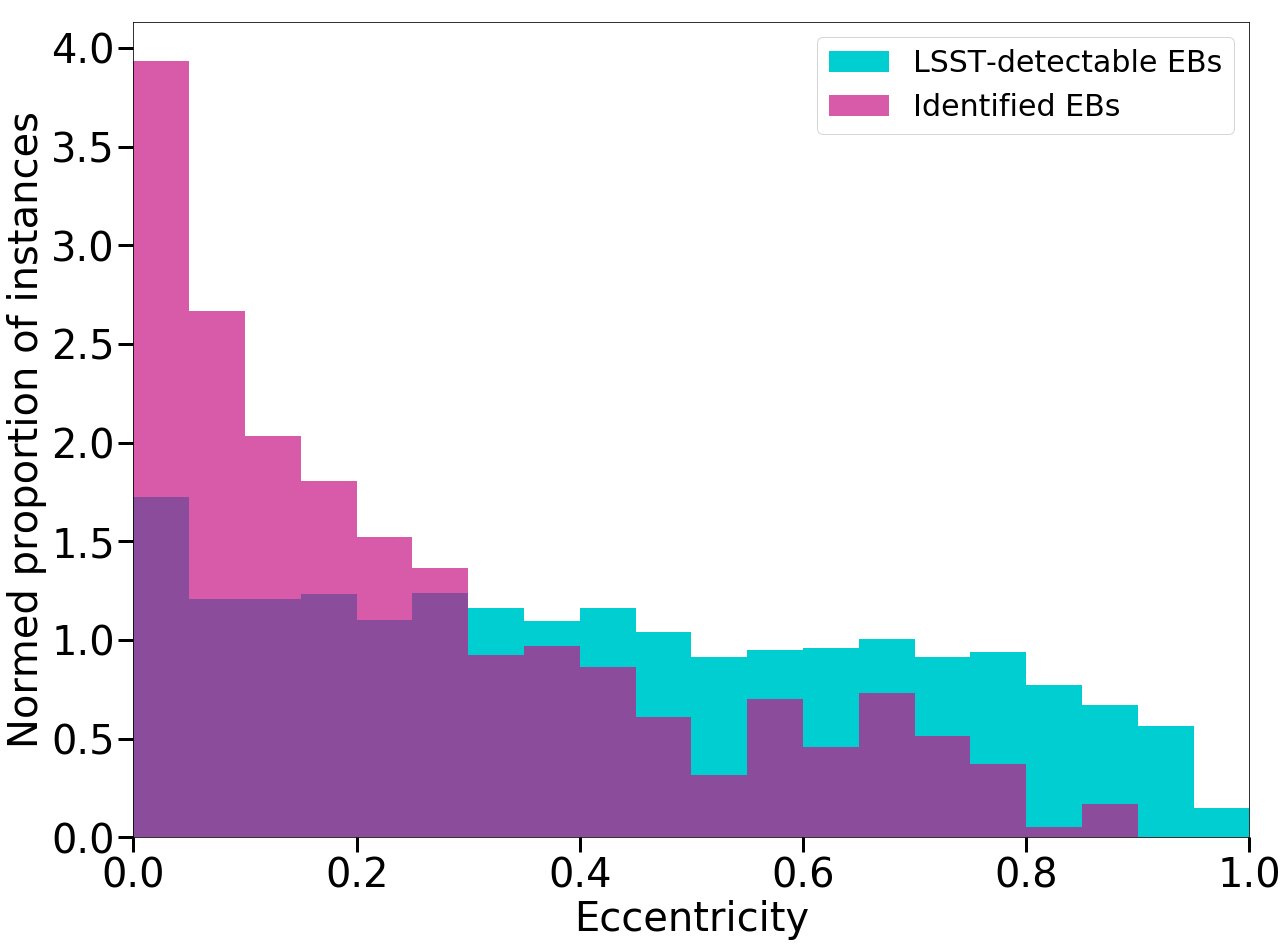

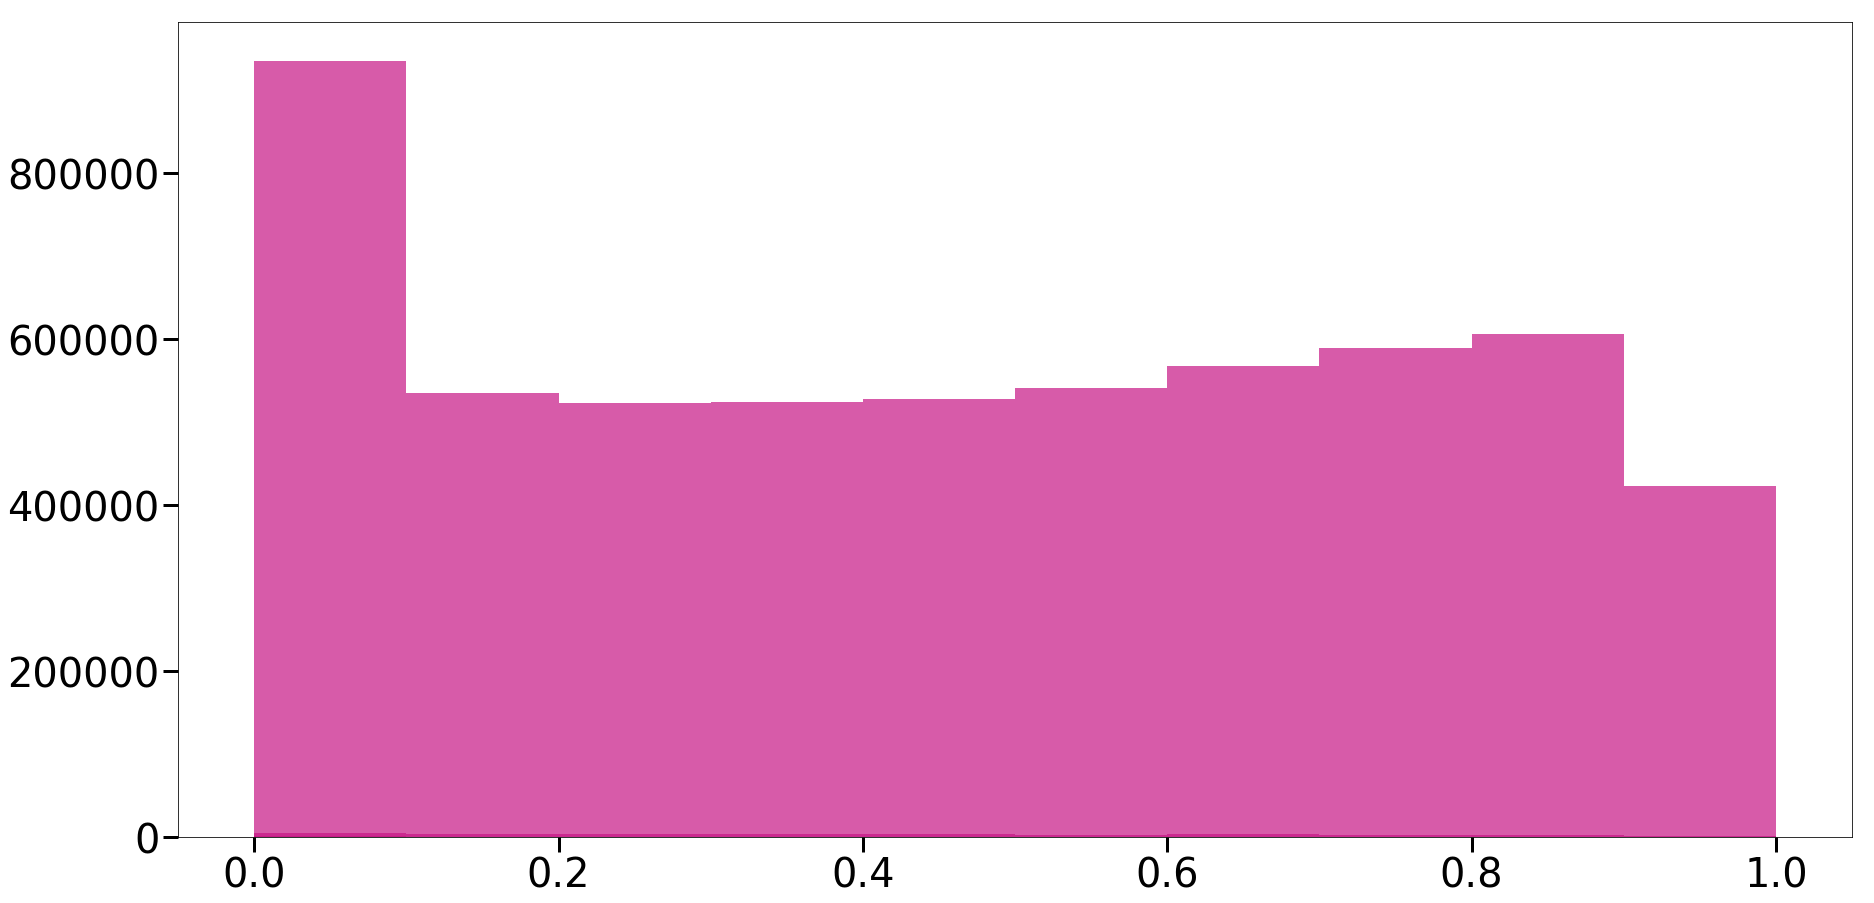

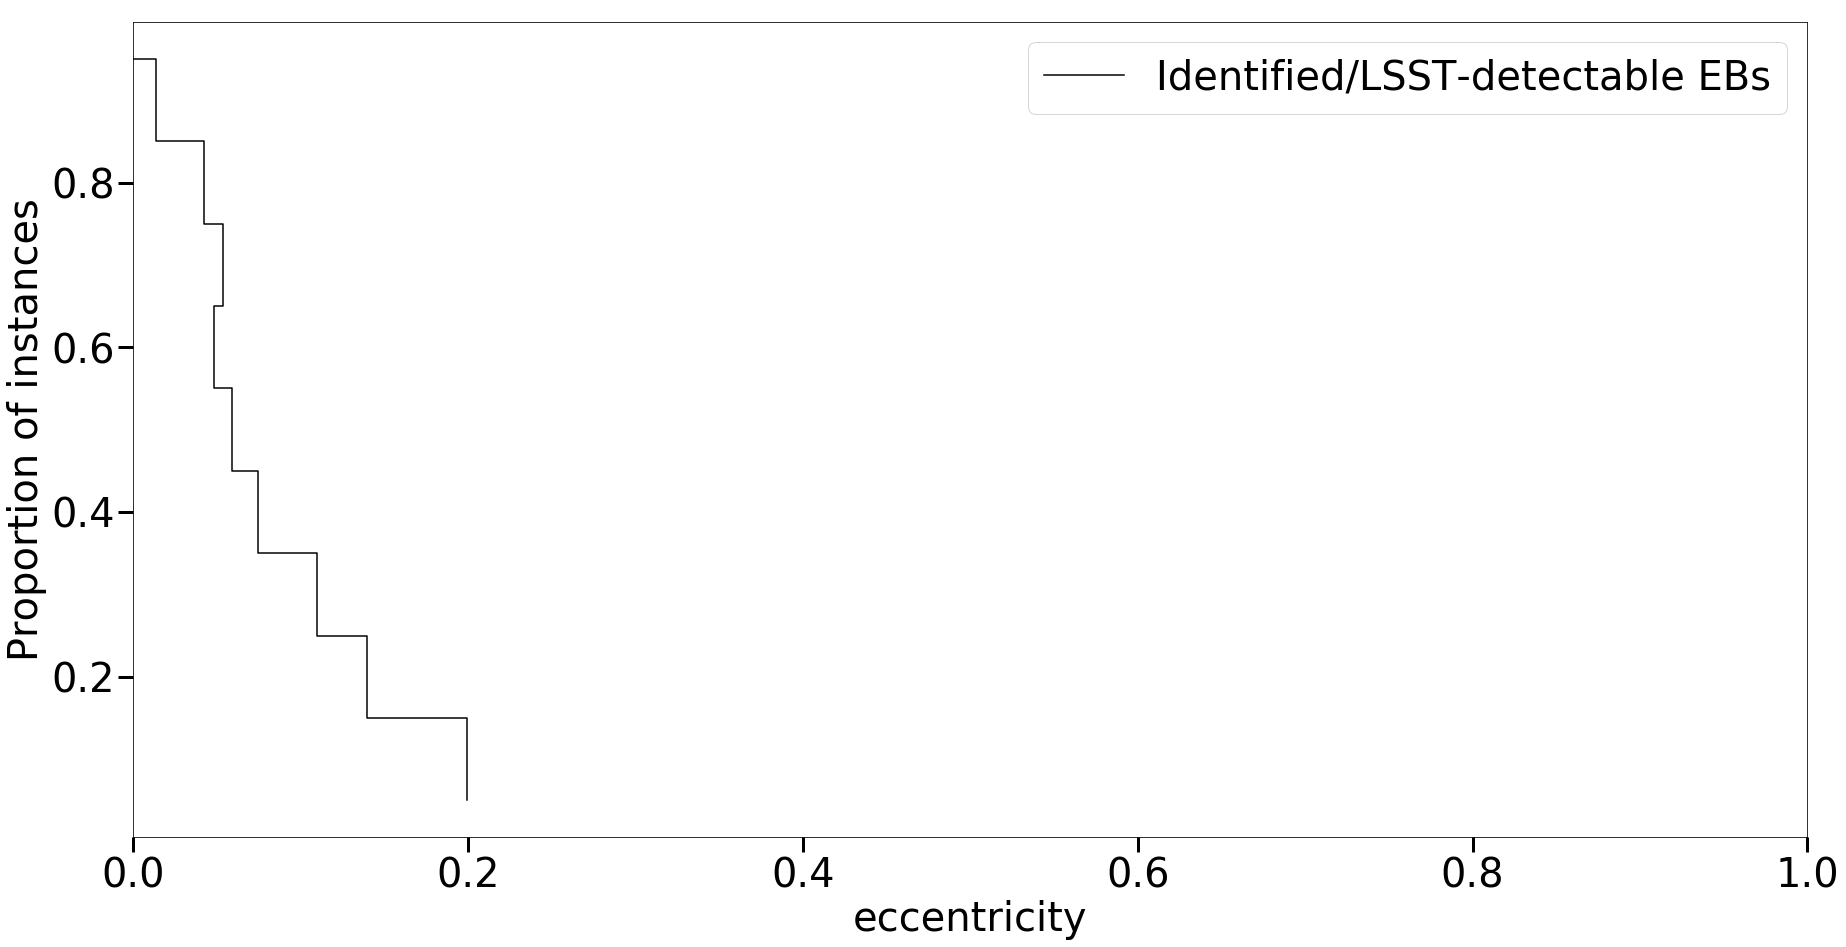

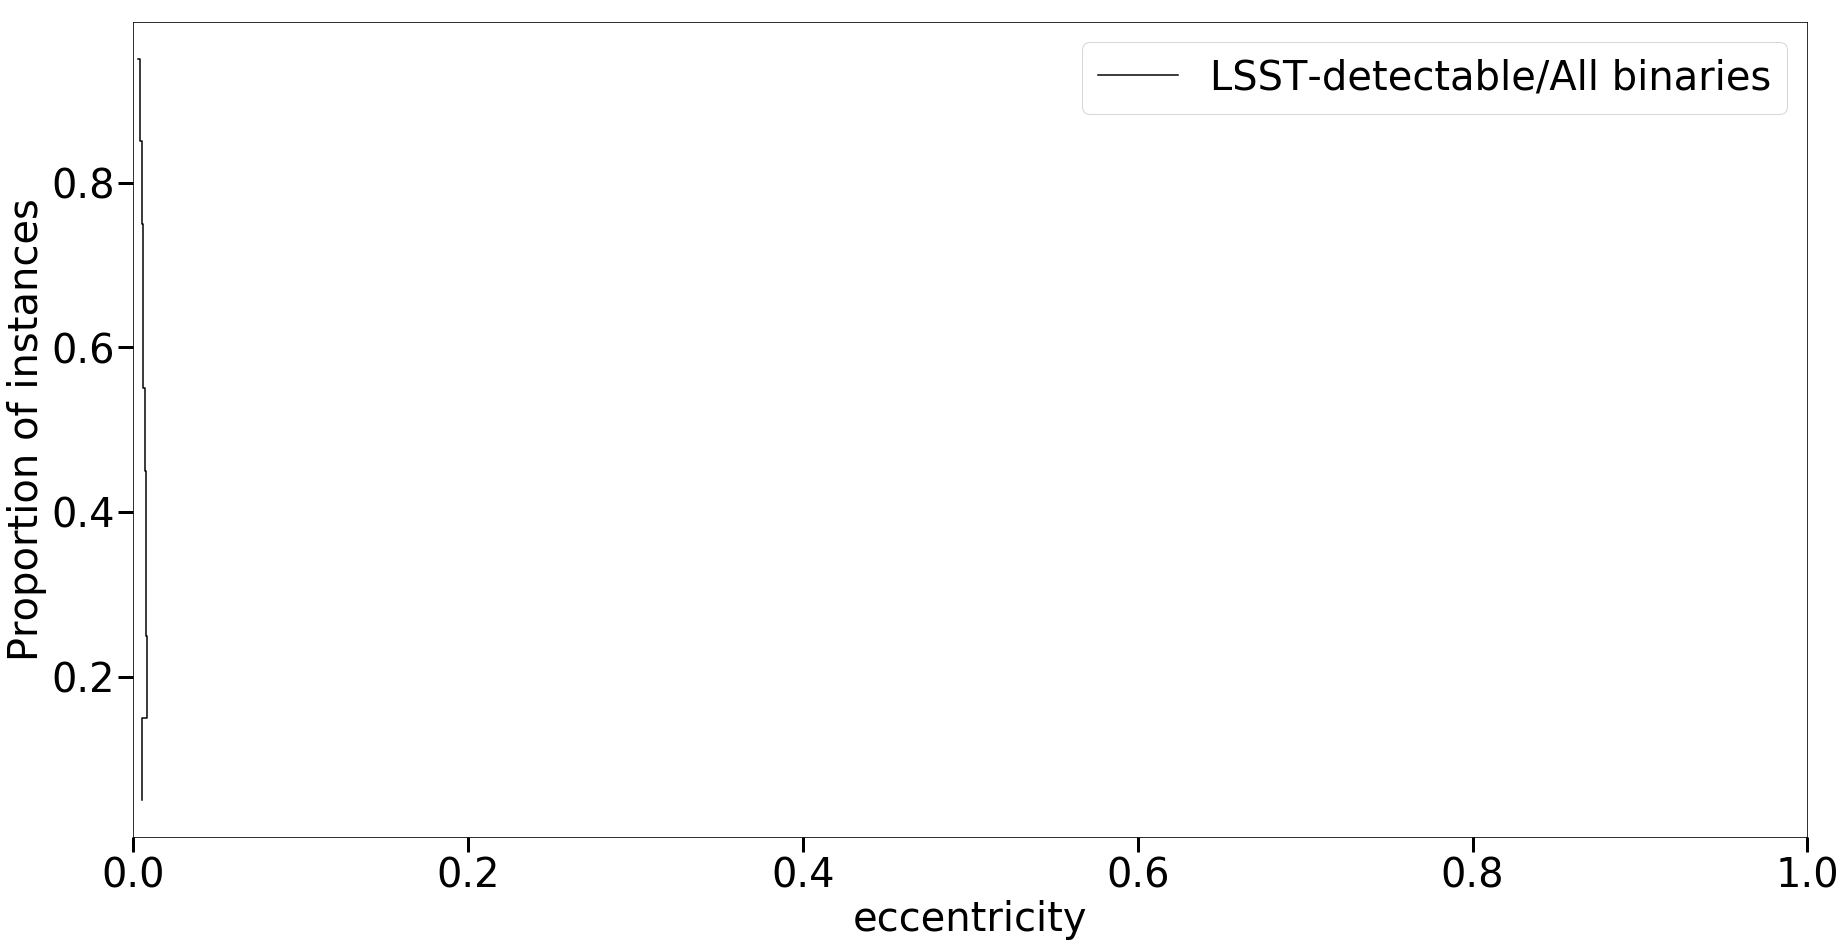

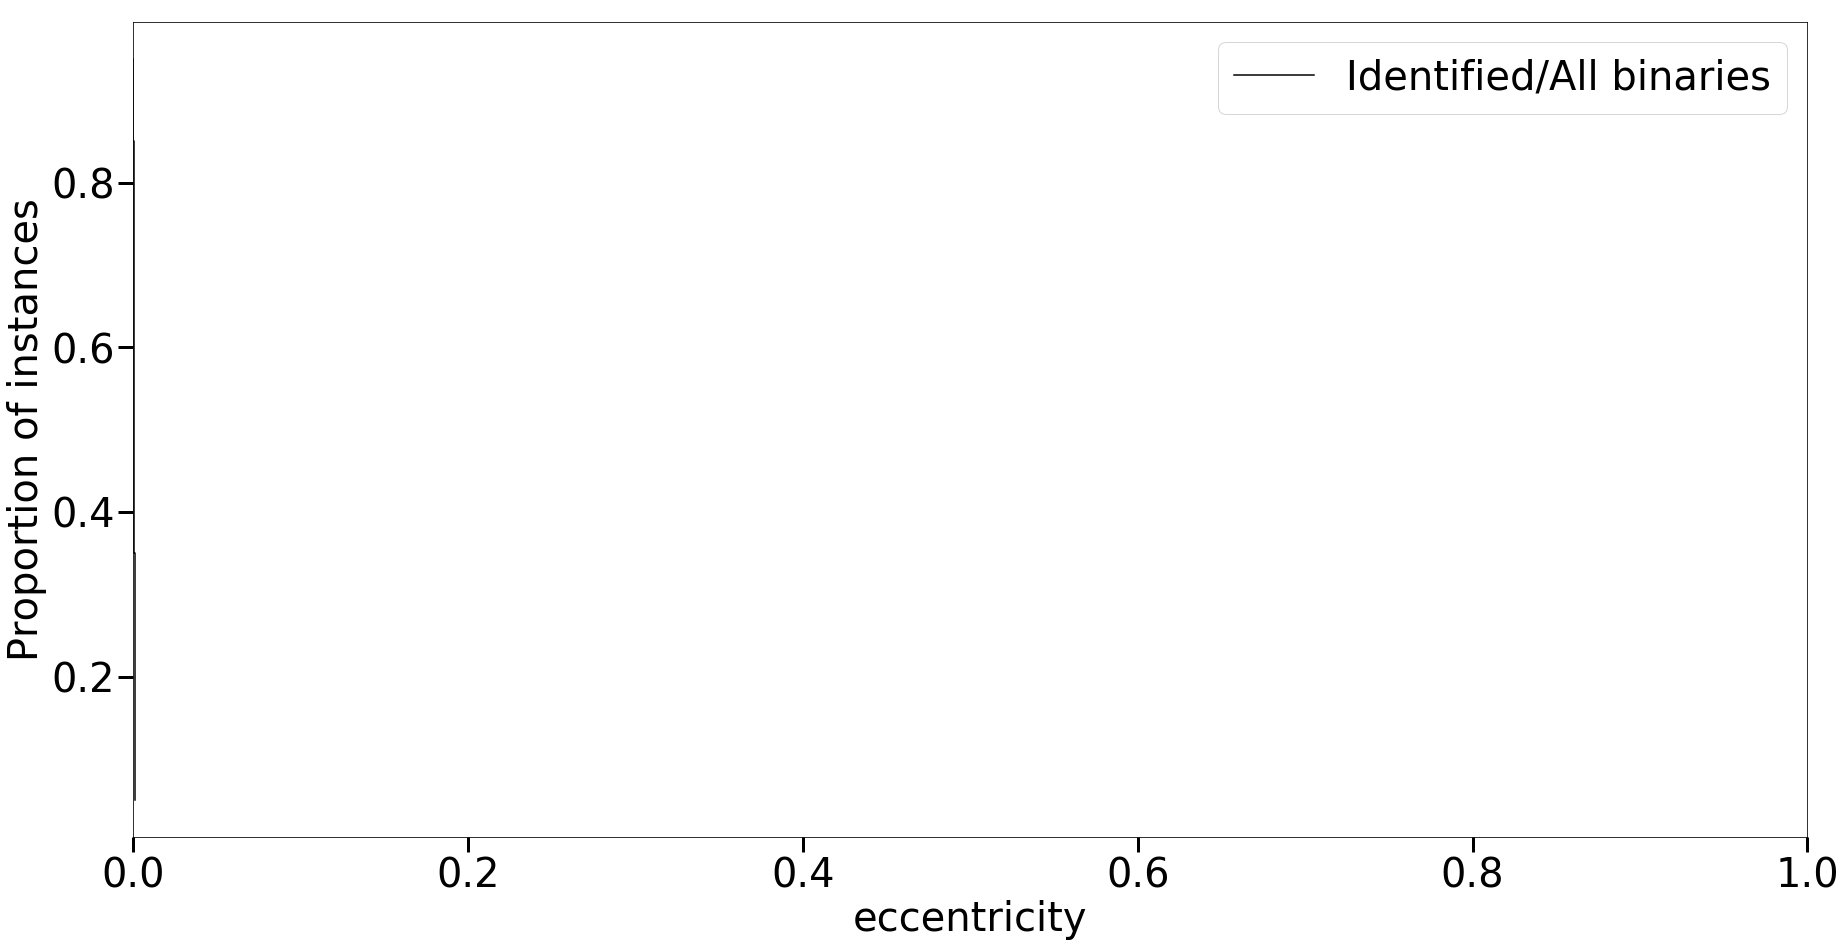

Ks_2sampResult(statistic=0.33072797874568205, pvalue=3.9492176410098033e-295)

In [17]:
fig = plt.figure(figsize=(30,15))
pylab.hist(ecc, bins = 100, range = (0, 1))
pylab.title('Number per eccentricity')
pylab.xlabel('ecc')
pylab.ylabel('N')
pylab.show()

fig = plt.figure(figsize=(30,15))
pylab.hist(ecc[use], bins = 100, range = (0, 1))
pylab.title('Number per eccentricity')
pylab.xlabel('ecc (err<0.1)')
pylab.ylabel('N')
pylab.show()

erd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(ecc, bins = 20, color = 'k', normed = True, label = "All binaries", range = (0,1))
n10, bins10, patches10 = plt.hist(ecc[use], bins = 20, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (0,1))
plt.xlabel('Eccentricity')
plt.ylabel('Normed proportion of instances')
plt.xlim([0,1])
plt.legend (loc = "best", prop={'size': 30})
plt.show()
erd.set_rasterized(True)
erd.savefig("ecc_relativedistribution.eps")
erd.savefig("ecc_relativedistribution.pdf")

obserd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(ecc, bins = 20, color = 'k', normed = True, label = "All binaries", range = (0,1))
n20, bins20, patches20 = plt.hist(ecc[obs], bins = 20, color = 'darkturquoise', alpha = 0.7, normed = True, label = "LSST-detectable EBs", range = (0,1))
#n10, bins10, patches10 = plt.hist(mass_rat[use], bins = 100, color = 'mediumvioletred', alpha = 0.5, normed = True, label = "Identified binaries")
plt.xlabel('Eccentricity')
plt.xlim([0,1])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obserd.set_rasterized(True)
obserd.savefig("ecc_obs_relativedistribution.eps")
obserd.savefig("ecc_obs_relativedistribution.pdf")

obsiderd = plt.figure(figsize=(20,15))
#n, bins, patches = plt.hist(mass_rat, bins = 100, color = 'k', normed = True, label = "All binaries")
n20, bins20, patches20 = plt.hist(ecc[obs], bins = 20, color = 'darkturquoise', alpha = 1.0, normed = True, label = "LSST-detectable EBs", range = (0,1))
n10, bins10, patches10 = plt.hist(ecc[use], bins = 20, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (0,1))
plt.xlabel('Eccentricity')
plt.xlim([0,1])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsiderd.set_rasterized(True)
obsiderd.savefig("eccentricity_obsid_relativedistribution.eps")
obsiderd.savefig("eccentricity_obsid_relativedistribution.pdf")


newbins=[]

for i in range(len(bins)-1):
  newbins.append((bins[i] + bins[i+1])/2.)

#print ("bin length = ", len(bins), "   bins = ", bins)
#print ("newbin length = ", len(newbins), "   newbins = ", newbins)

#divhisterd = plt.figure(figsize=(20,15))
#plt.step(newbins, n10/n, label="Identified/All binaries")
#plt.step(newbins, n20/n, label="LSST-Detectable/All binaries")
#plt.step(newbins, n10/n20, label="Identified/LSST-detectable")
#plt.xlabel('Eccentricity')
#plt.ylabel('Normed proportion of instances')
#plt.legend(loc = "best", prop={'size': 30})
#plt.show()
#divhisterd.set_rasterized(True)
#divhisterd.savefig("ecc_divhist.eps")
#divhisterd.savefig("ecc_divhist.pdf")

#denserd = plt.figure(figsize=(30,15))
#sns.distplot(ecc, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'k', label = 'All binaries')
#sns.distplot(ecc[obs], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'darkturquoise', label = 'LSST-detectable EBs')
#sns.distplot(ecc[use], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'mediumvioletred', label = 'Identified EBs')
#plt.xlim([0,1])
#plt.xlabel('Eccentricity')
#plt.ylabel('Proportion of instances')
#plt.legend(loc = "best")
#plt.show()
#denserd.set_rasterized(True)
#denserd.savefig("ecc_dens.eps")
#denserd.savefig("ecc_dens.pdf")


fig = plt.figure(figsize=(30,15))
n1, bins1, patches1 = plt.hist(ecc, bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "All binaries", range = (0,1))
n11, bins11, patches11 = plt.hist(ecc[use], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "Identified EBs", range = (0,1))
n21, bins21, patches21 = plt.hist(ecc[obs], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "LSST-detectable EBs", range = (0,1))
plt.show

newbins1=[]

for i in range(len(bins1)-1):
  newbins1.append((bins1[i] + bins1[i+1])/2.)

densdiverd1 = plt.figure(figsize=(30,15))
plt.step(n11/n21, newbins1, color = 'k', label = 'Identified/LSST-detectable EBs')
plt.xlim([0,1])
plt.xlabel('eccentricity')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdiverd1.set_rasterized(True)
densdiverd1.savefig("ecc_ID-LD_dens.eps")
densdiverd1.savefig("ecc_ID-LD_dens.pdf")


densdiverd2 = plt.figure(figsize=(30,15))
plt.step(n21/n1, newbins1, color = 'k', label = 'LSST-detectable/All binaries')
plt.xlim([0,1])
plt.xlabel('eccentricity')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdiverd2.set_rasterized(True)
densdiverd2.savefig("ecc_LD-AB_dens.eps")
densdiverd2.savefig("ecc_LD-AB_dens.pdf")


densdiverd3 = plt.figure(figsize=(30,15))
plt.step(n11/n1, newbins1, color = 'k', label = 'Identified/All binaries')
plt.xlim([0,1])
plt.xlabel('eccentricity')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdiverd3.set_rasterized(True)
densdiverd3.savefig("ecc_ID-AB_dens.eps")
densdiverd3.savefig("ecc_ID-AB_dens.pdf")

stats.ks_2samp(ecc, ecc[use])

# DISTANCE (kpc)

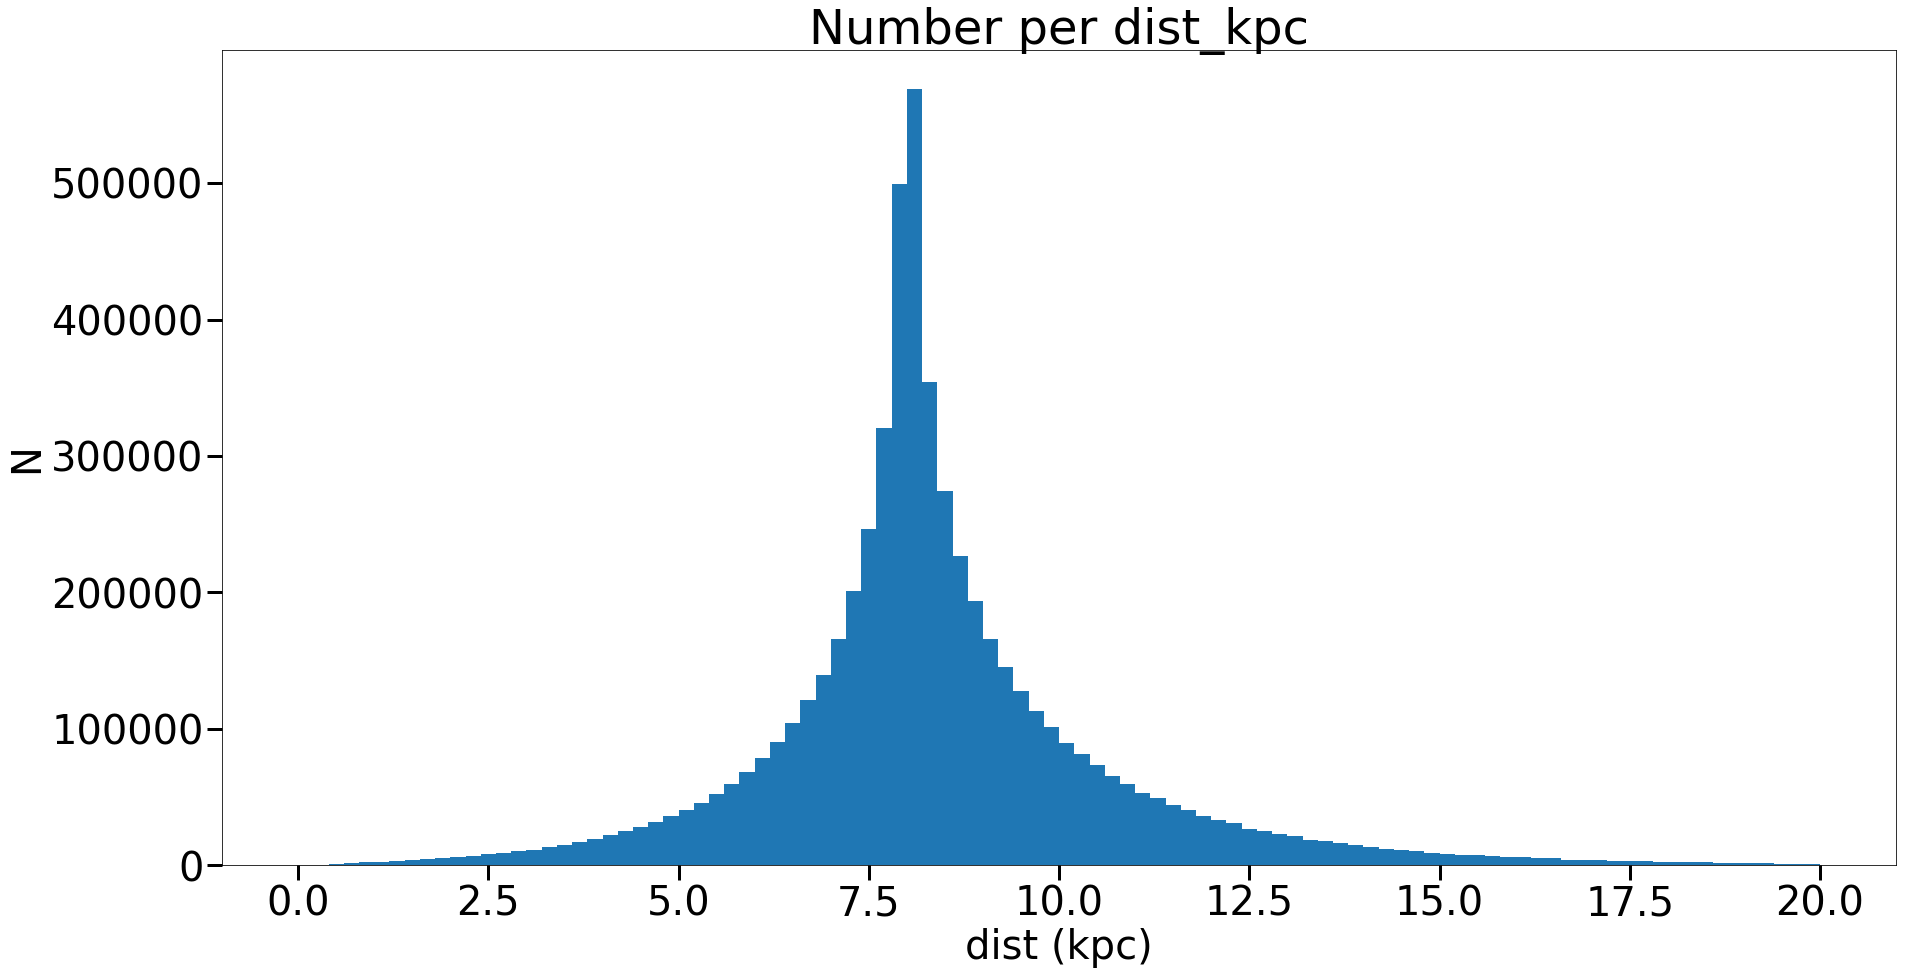

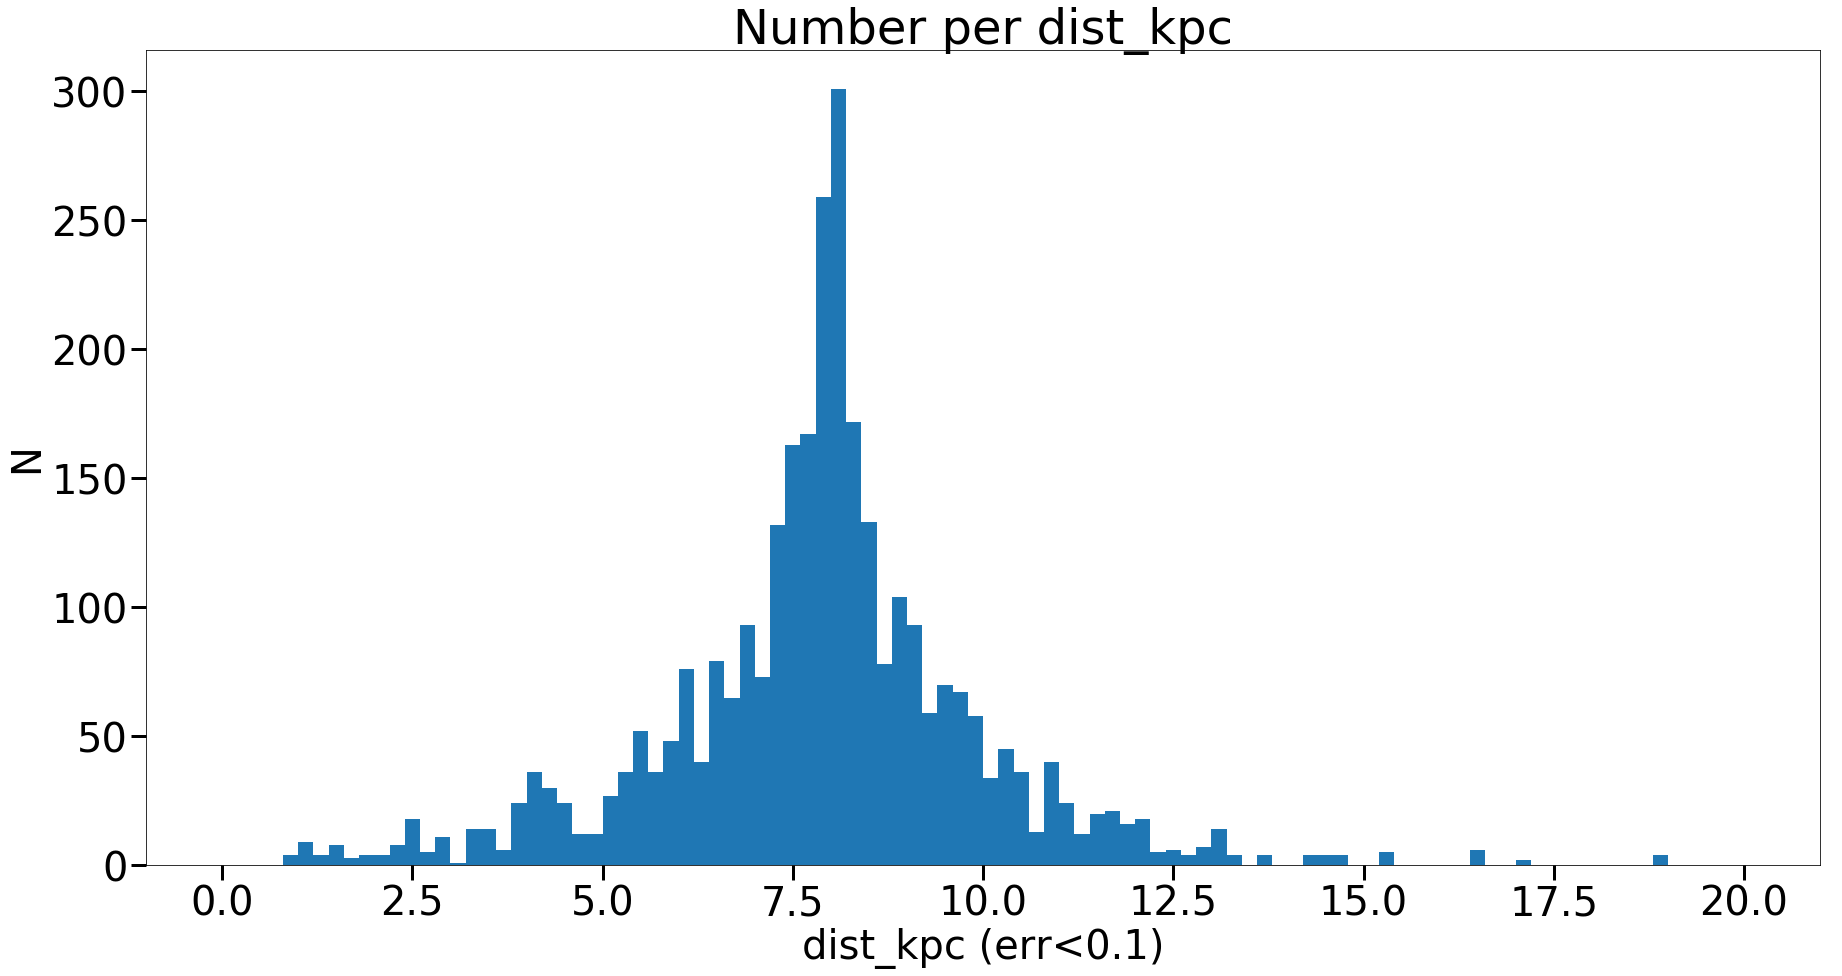

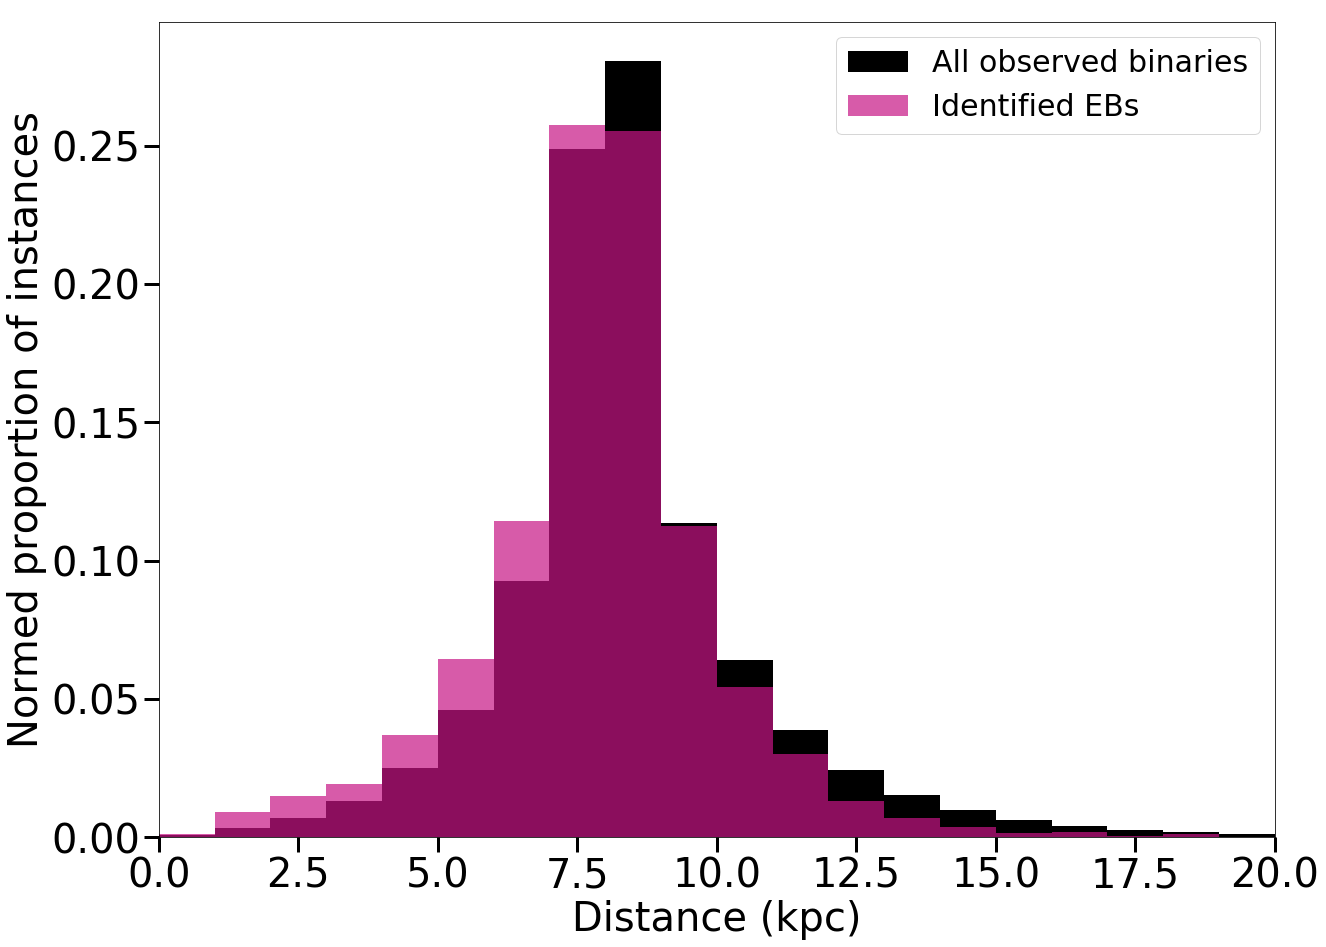

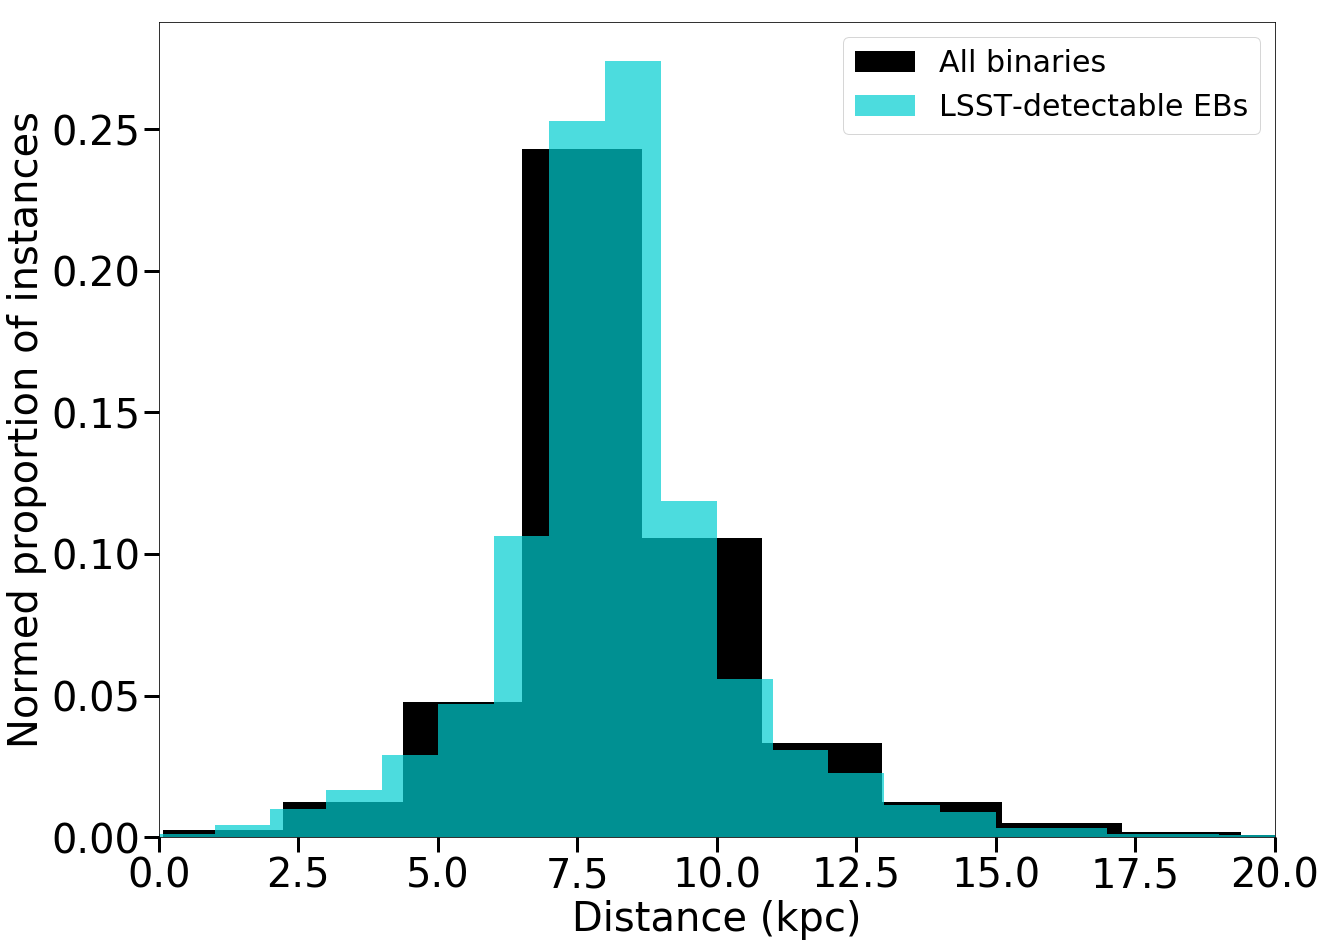

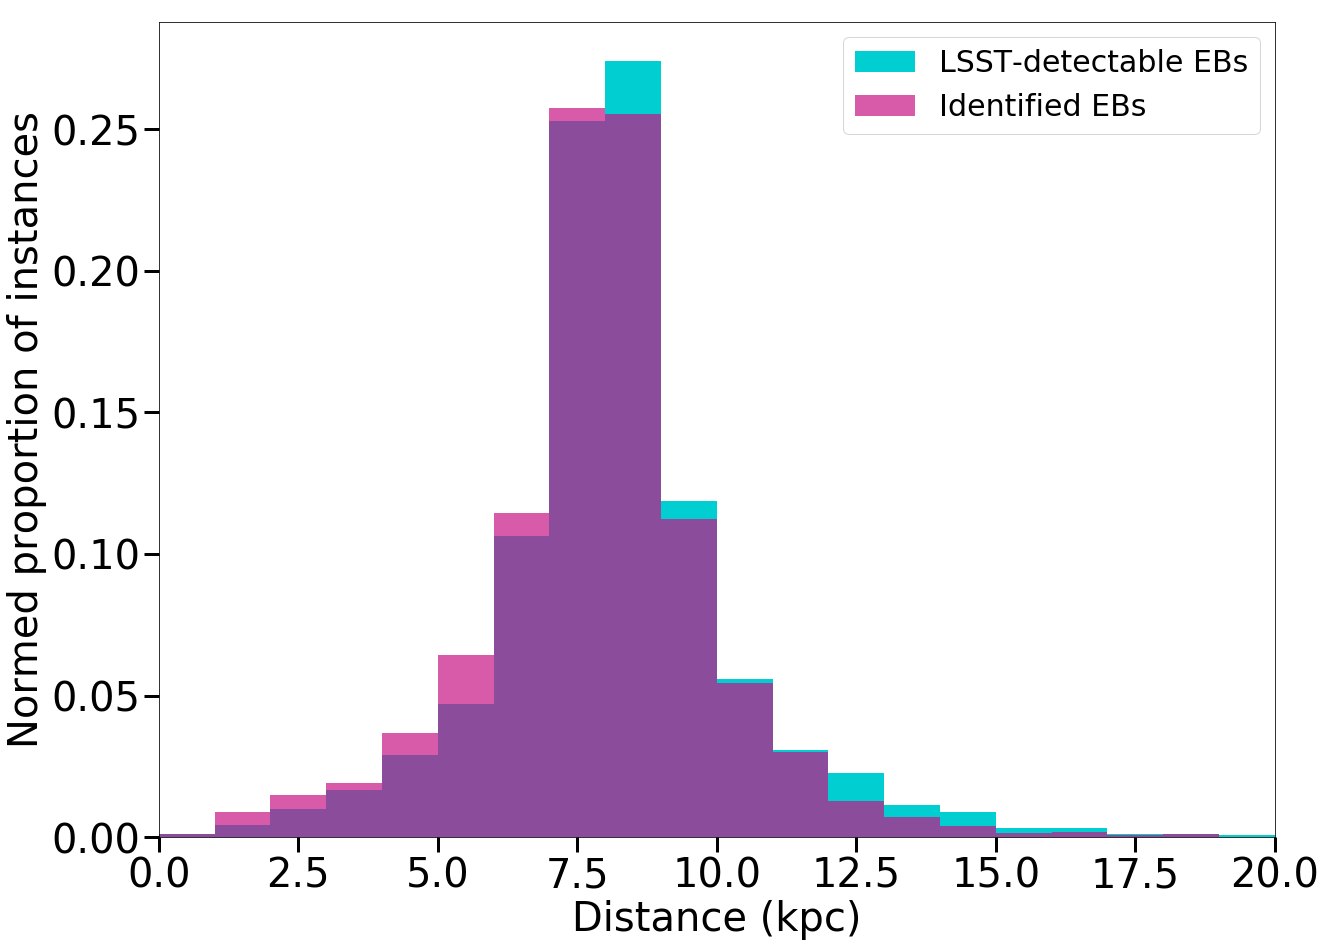

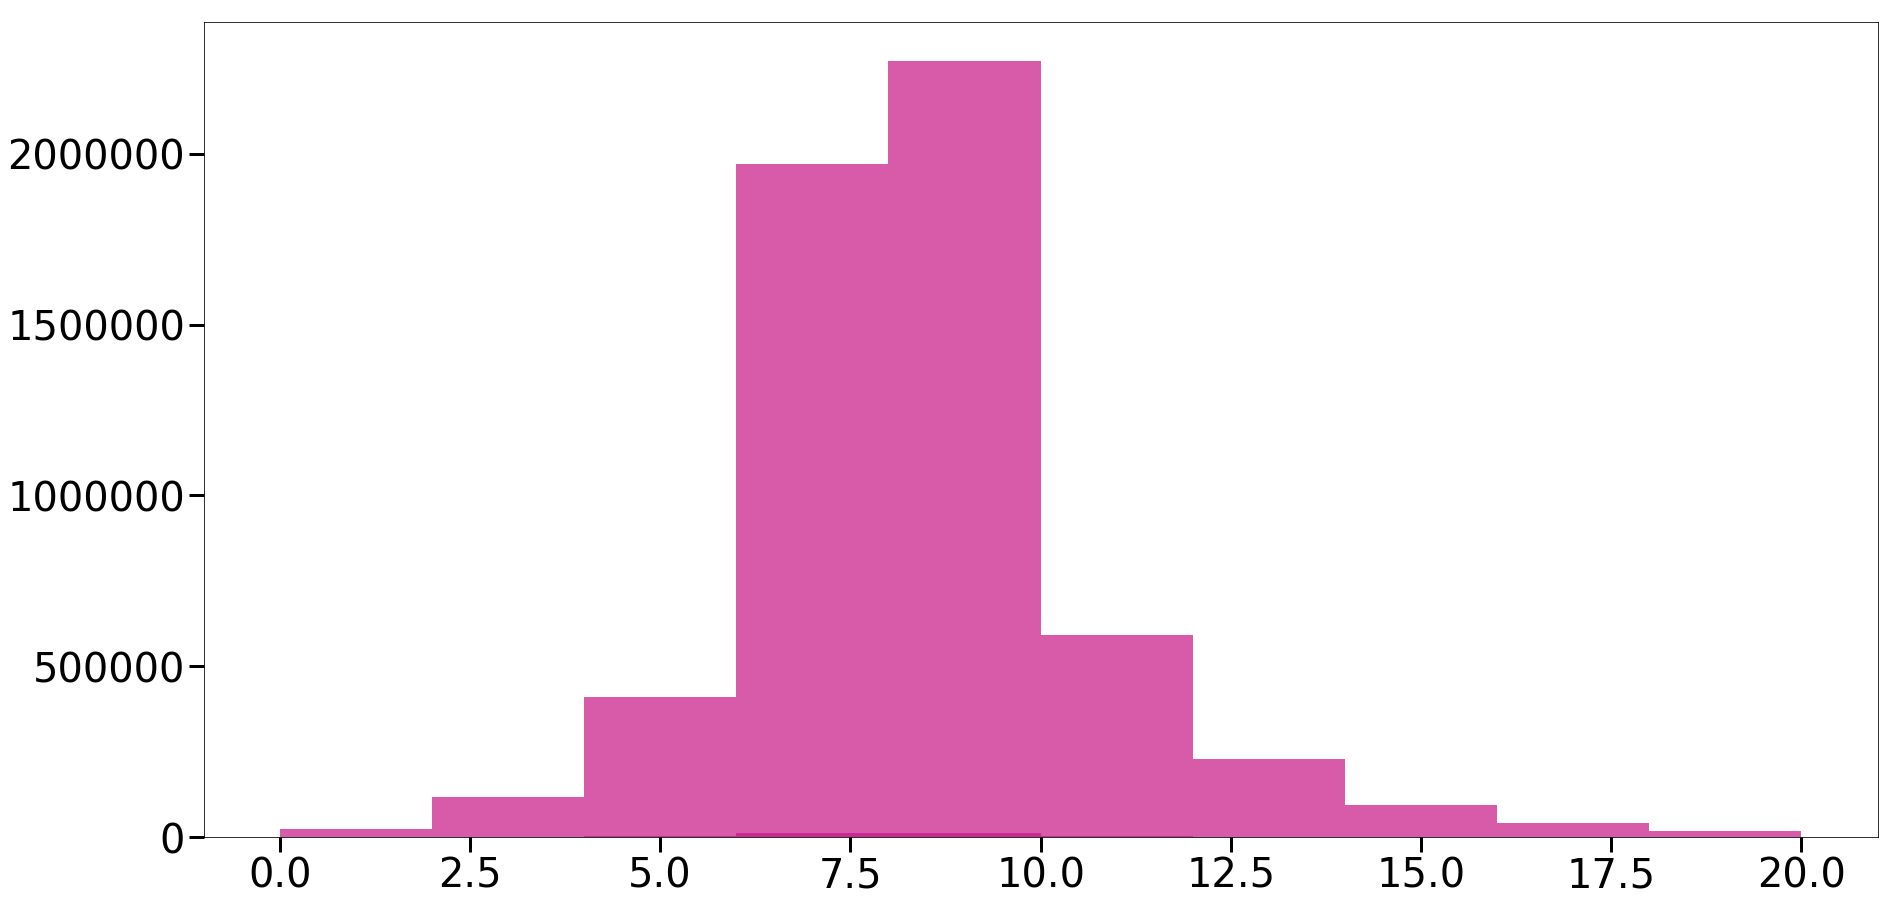

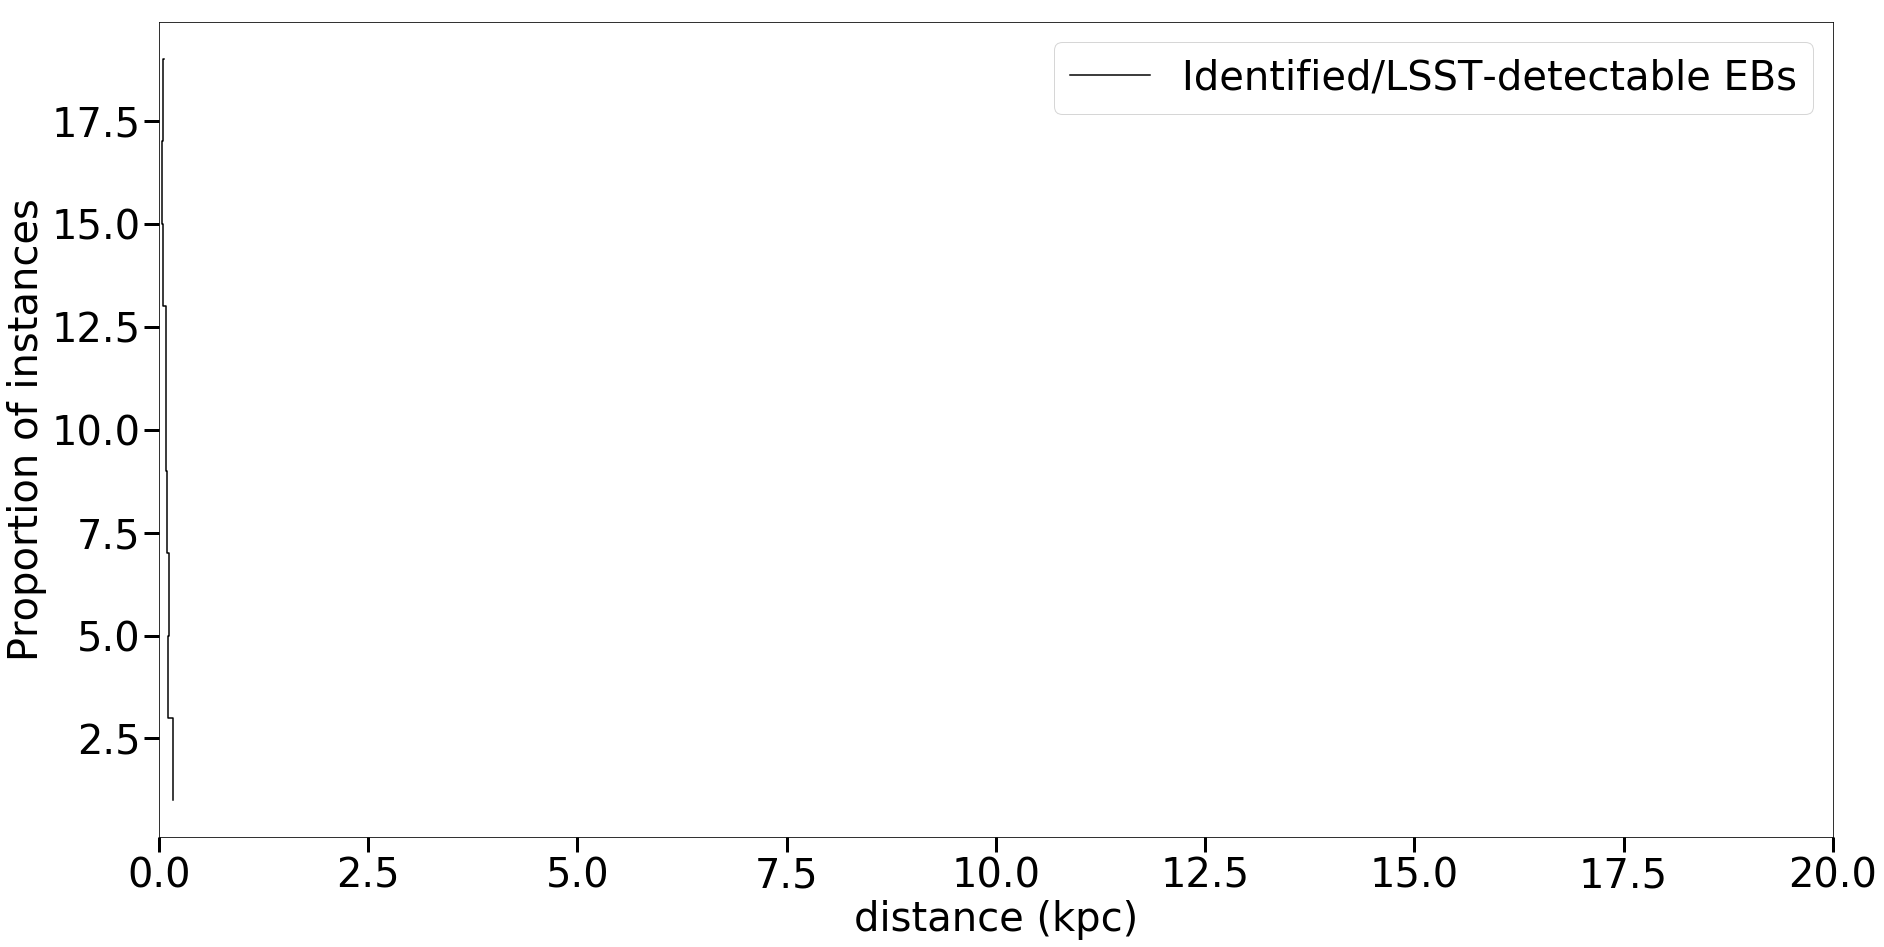

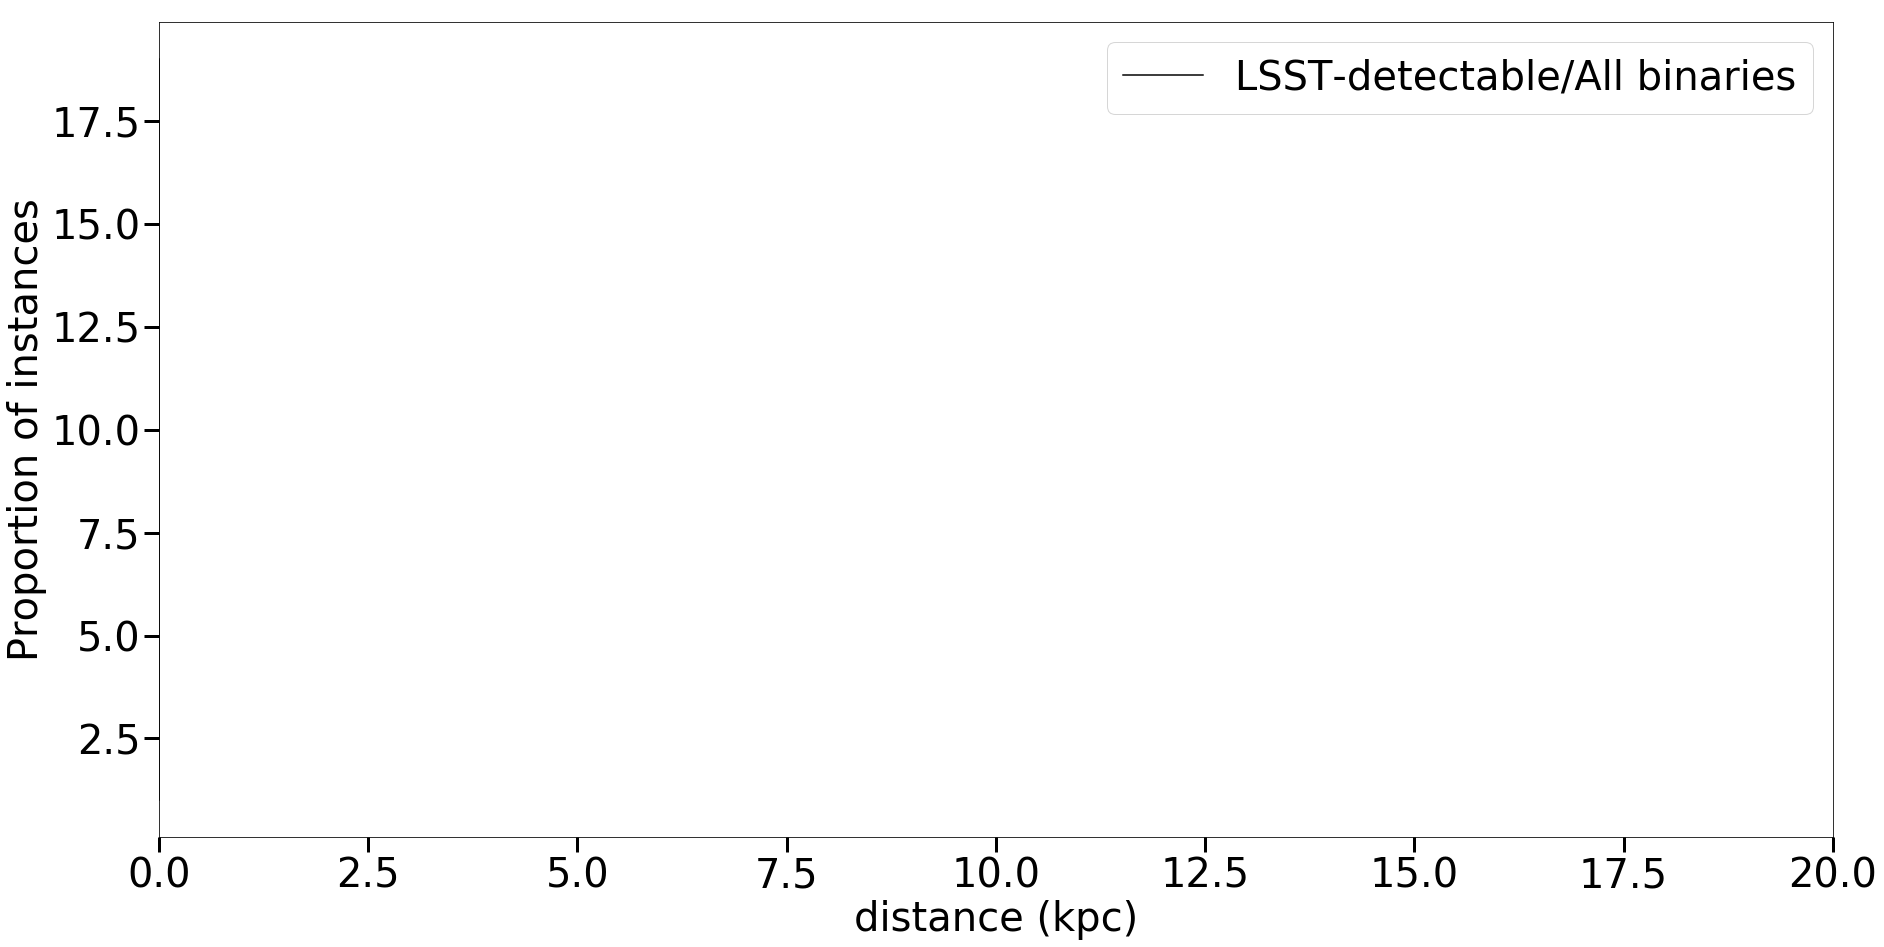

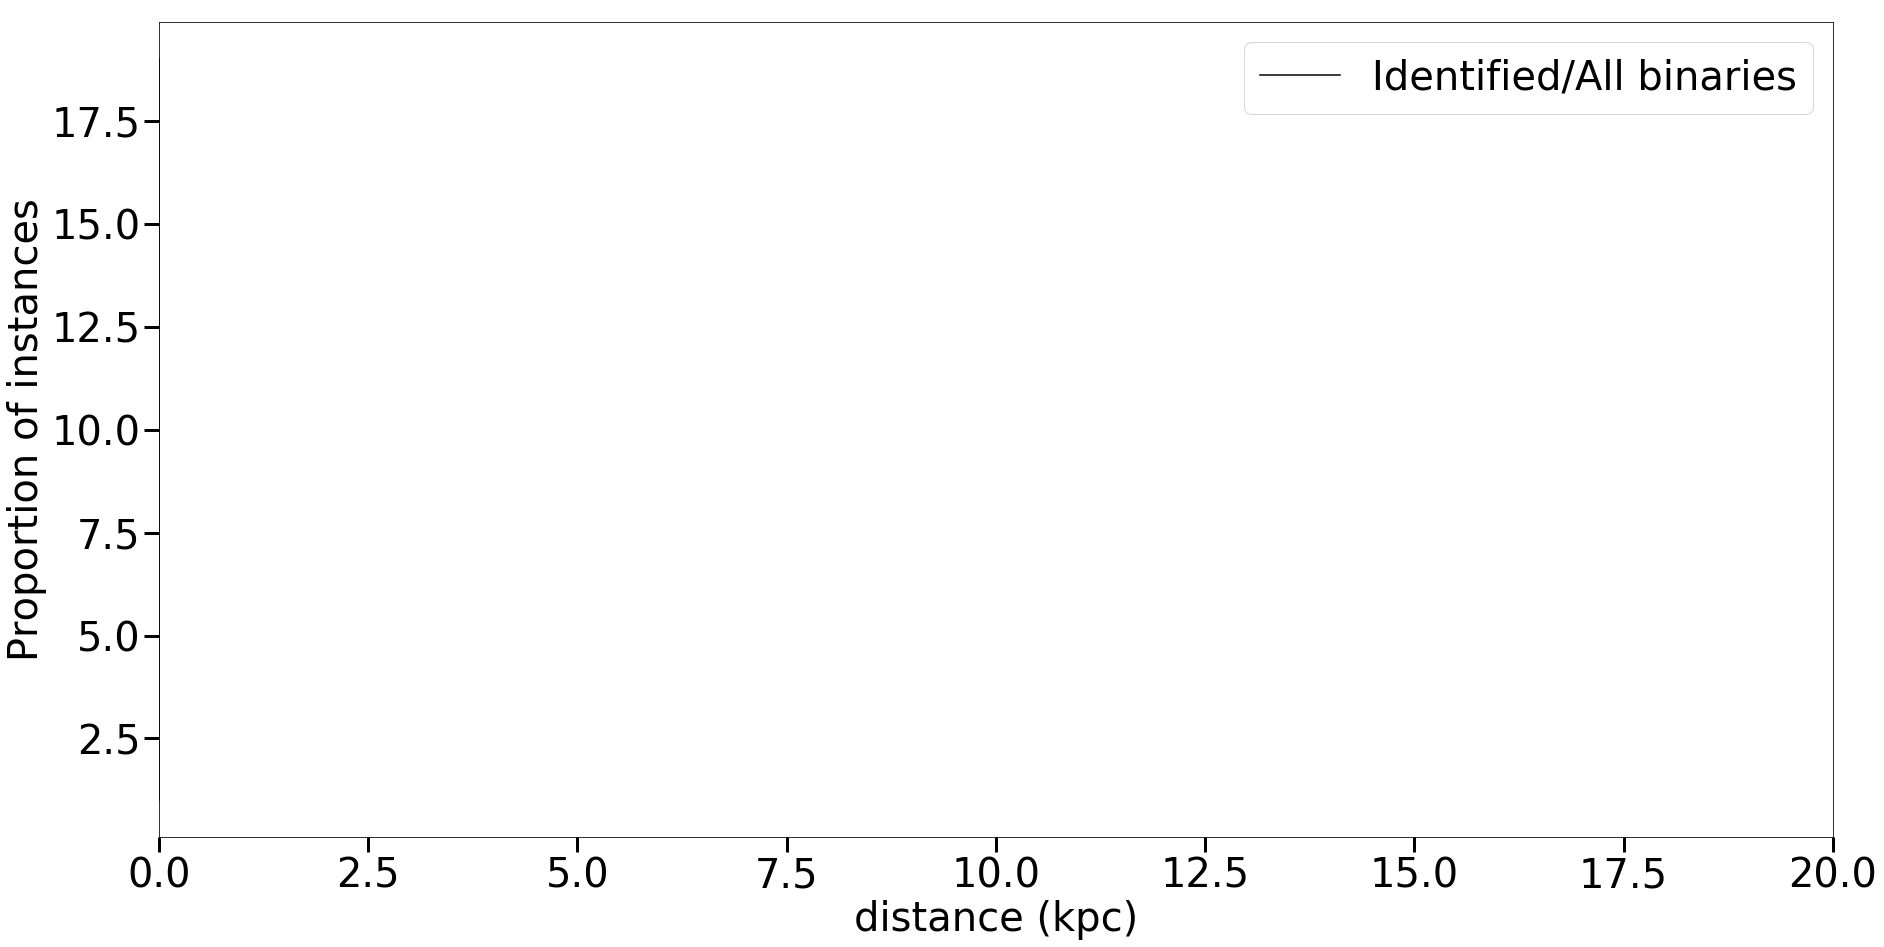

Ks_2sampResult(statistic=0.091427209895461159, pvalue=6.0201259854149951e-23)

In [ ]:
fig = plt.figure(figsize=(30,15))
pylab.hist(dist_kpc, bins = 100, range = (0, 20))
pylab.title('Number per dist_kpc')
pylab.xlabel('dist (kpc)')
pylab.ylabel('N')
pylab.show()

fig = plt.figure(figsize=(30,15))
pylab.hist(dist_kpc[use], bins = 100, range = (0, 20))
pylab.title('Number per dist_kpc')
pylab.xlabel('dist_kpc (err<0.1)')
pylab.ylabel('N')
pylab.show()

drd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(dist_kpc, bins = 20, color = 'k', normed = True, label = "All observed binaries", range =(0,20))
n10, bins10, patches10 = plt.hist(dist_kpc[use], bins = 20, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range =(0,20))
plt.xlabel('Distance (kpc)')
plt.xlim([0,20])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best" , prop={'size': 30})
plt.show()
drd.set_rasterized(True)
drd.savefig("distkpc_relativedistribution.eps")
drd.savefig("distkpc_relativedistribution.pdf")

obsdrd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(dist_kpc, bins = 20, color = 'k', normed = True, label = "All binaries")
n20, bins20, patches20 = plt.hist(dist_kpc[obs], bins = 20, color = 'darkturquoise', alpha = 0.7, normed = True, label = "LSST-detectable EBs", range =(0,20))
#n10, bins10, patches10 = plt.hist(mass_rat[use], bins = 100, color = 'mediumvioletred', alpha = 0.5, normed = True, label = "Identified binaries")
plt.xlabel('Distance (kpc)')
plt.xlim([0,20])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsdrd.set_rasterized(True)
obsdrd.savefig("dist_obs_relativedistribution.eps")
obsdrd.savefig("dist_obs_relativedistribution.pdf")

obsiddrd = plt.figure(figsize=(20,15))
#n, bins, patches = plt.hist(mass_rat, bins = 100, color = 'k', normed = True, label = "All binaries")
n20, bins20, patches20 = plt.hist(dist_kpc[obs], bins = 20, color = 'darkturquoise', alpha = 1.0, normed = True, label = "LSST-detectable EBs", range =(0,20))
n10, bins10, patches10 = plt.hist(dist_kpc[use], bins = 20, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range =(0,20))
plt.xlabel('Distance (kpc)')
plt.xlim([0,20])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsiddrd.set_rasterized(True)
obsiddrd.savefig("dist_obsid_relativedistribution.eps")
obsiddrd.savefig("dist_obsid_relativedistribution.pdf")


newbins=[]

for i in range(len(bins)-1):
  newbins.append((bins[i] + bins[i+1])/2.)

#print ("bin length = ", len(bins), "   bins = ", bins)
#print ("newbin length = ", len(newbins), "   newbins = ", newbins)

#divhistdrd = plt.figure(figsize=(20,15))
#plt.step(newbins, n10/n, label="Identified/All binaries")
#plt.step(newbins, n20/n, label="LSST-Detectable/All binaries")
#plt.step(newbins, n10/n20, label="Identified/LSST-detectable")
#plt.xlabel('Distance (kpc)')
#plt.ylabel('Normed proportion of instances')
#plt.legend(loc = "best", prop={'size': 30})
#plt.show()
#divhistdrd.set_rasterized(True)
#divhistdrd.savefig("dist_divhist.eps")
#divhistdrd.savefig("dist_divhist.pdf")


#densdrd = plt.figure(figsize=(30,15))
#sns.distplot(dist_kpc, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'k', label = 'All binaries')
#sns.distplot(dist_kpc[obs], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'darkturquoise', label = 'LSST-detectable EBs')
#sns.distplot(dist_kpc[use], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'mediumvioletred', label = 'Identified EBs')
#plt.xlim([0,20])
#plt.xlabel('distance (kpc)')
#plt.ylabel('Proportion of instances')
#plt.legend(loc = "best")
#plt.show()
#densdrd.set_rasterized(True)
#densdrd.savefig("dist_dens.eps")
#densdrd.savefig("dist_dens.pdf")

fig = plt.figure(figsize=(30,15))
n1, bins1, patches1 = plt.hist(dist_kpc, bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "All binaries", range = (0,20))
n11, bins11, patches11 = plt.hist(dist_kpc[use], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "Identified EBs", range = (0,20))
n21, bins21, patches21 = plt.hist(dist_kpc[obs], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "LSST-detectable EBs", range = (0,20))
plt.show

newbins1=[]

for i in range(len(bins1)-1):
  newbins1.append((bins1[i] + bins1[i+1])/2.)



densdivdrd1 = plt.figure(figsize=(30,15))
plt.step(n11/n21, newbins1, color = 'k', label = 'Identified/LSST-detectable EBs')
plt.xlim([0,20])
plt.xlabel('distance (kpc)')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivdrd1.set_rasterized(True)
densdivdrd1.savefig("dist_ID-LD_dens.eps")
densdivdrd1.savefig("dist_ID-LD_dens.pdf")


densdivdrd2 = plt.figure(figsize=(30,15))
plt.step(n21/n1, newbins1, color = 'k', label = 'LSST-detectable/All binaries')
plt.xlim([0,20])
plt.xlabel('distance (kpc)')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivdrd2.set_rasterized(True)
densdivdrd2.savefig("dist_LD-AB_dens.eps")
densdivdrd2.savefig("dist_LD-AB_dens.pdf")


densdivdrd3 = plt.figure(figsize=(30,15))
plt.step(n11/n1, newbins1, color = 'k', label = 'Identified/All binaries')
plt.xlim([0,20])
plt.xlabel('distance (kpc)')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivdrd3.set_rasterized(True)
densdivdrd3.savefig("dist_ID-AB_dens.eps")
densdivdrd3.savefig("dist_ID-AB_dens.pdf")



stats.ks_2samp(dist_kpc, dist_kpc[use])

# INCLINATION

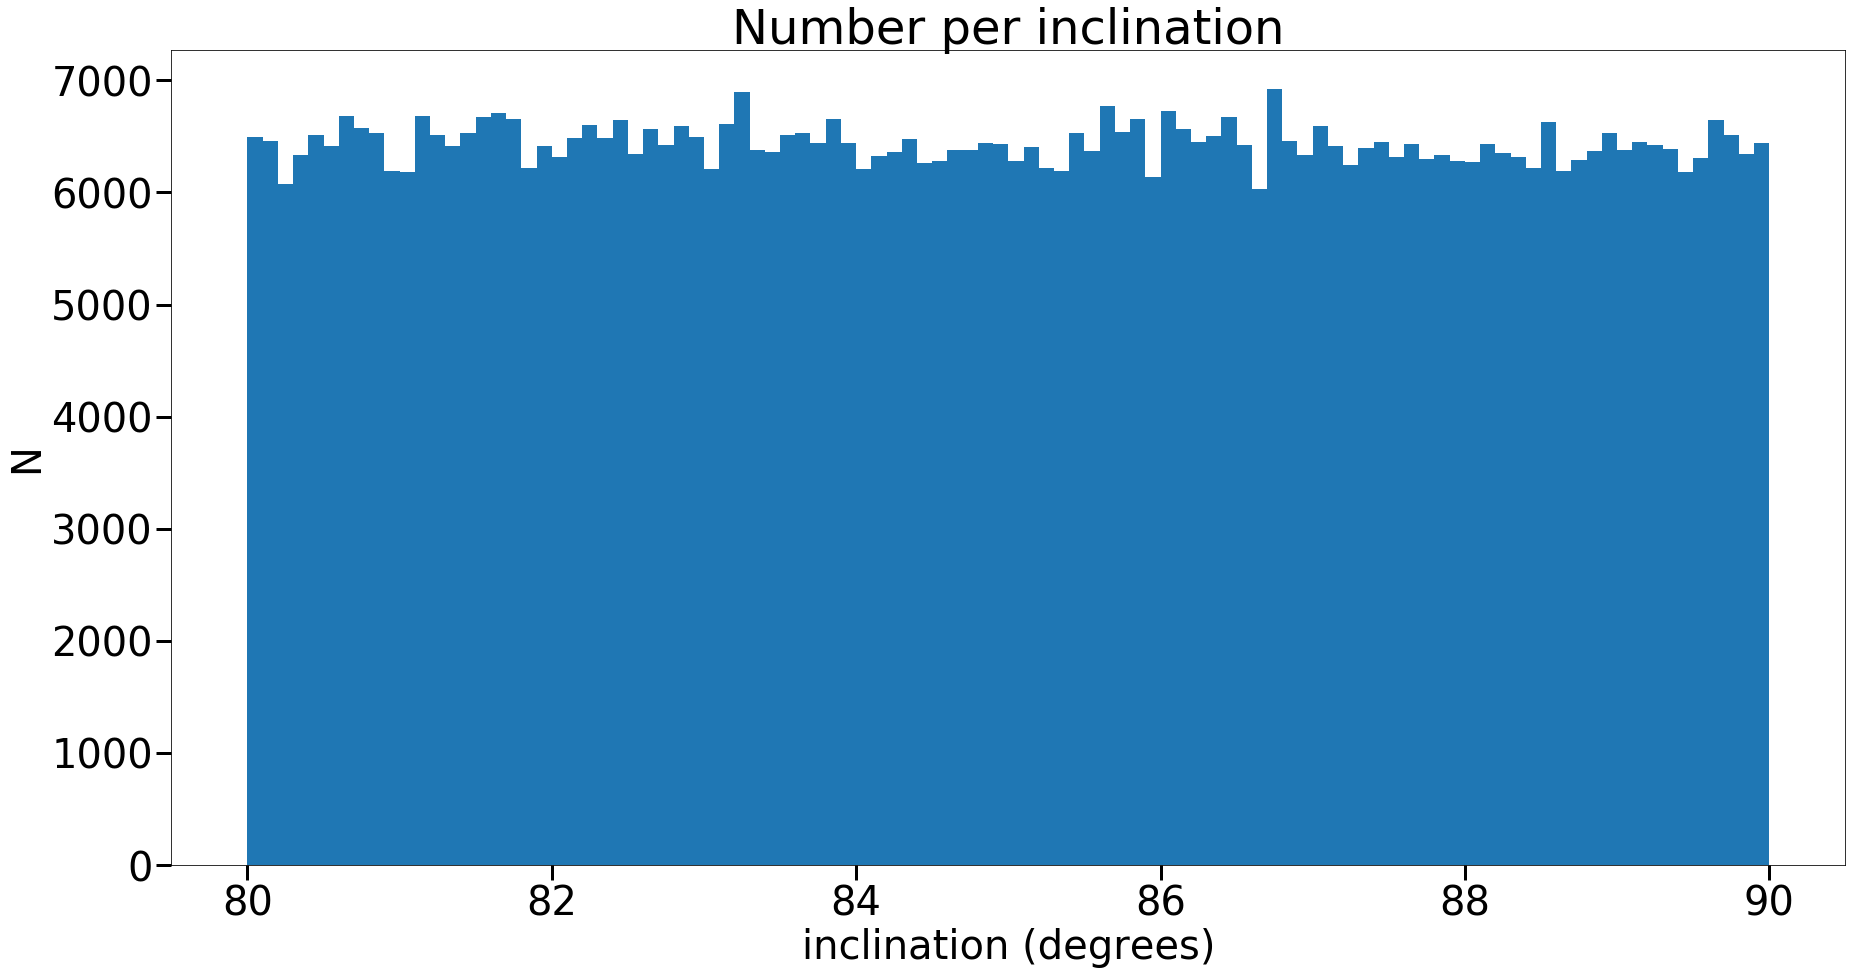

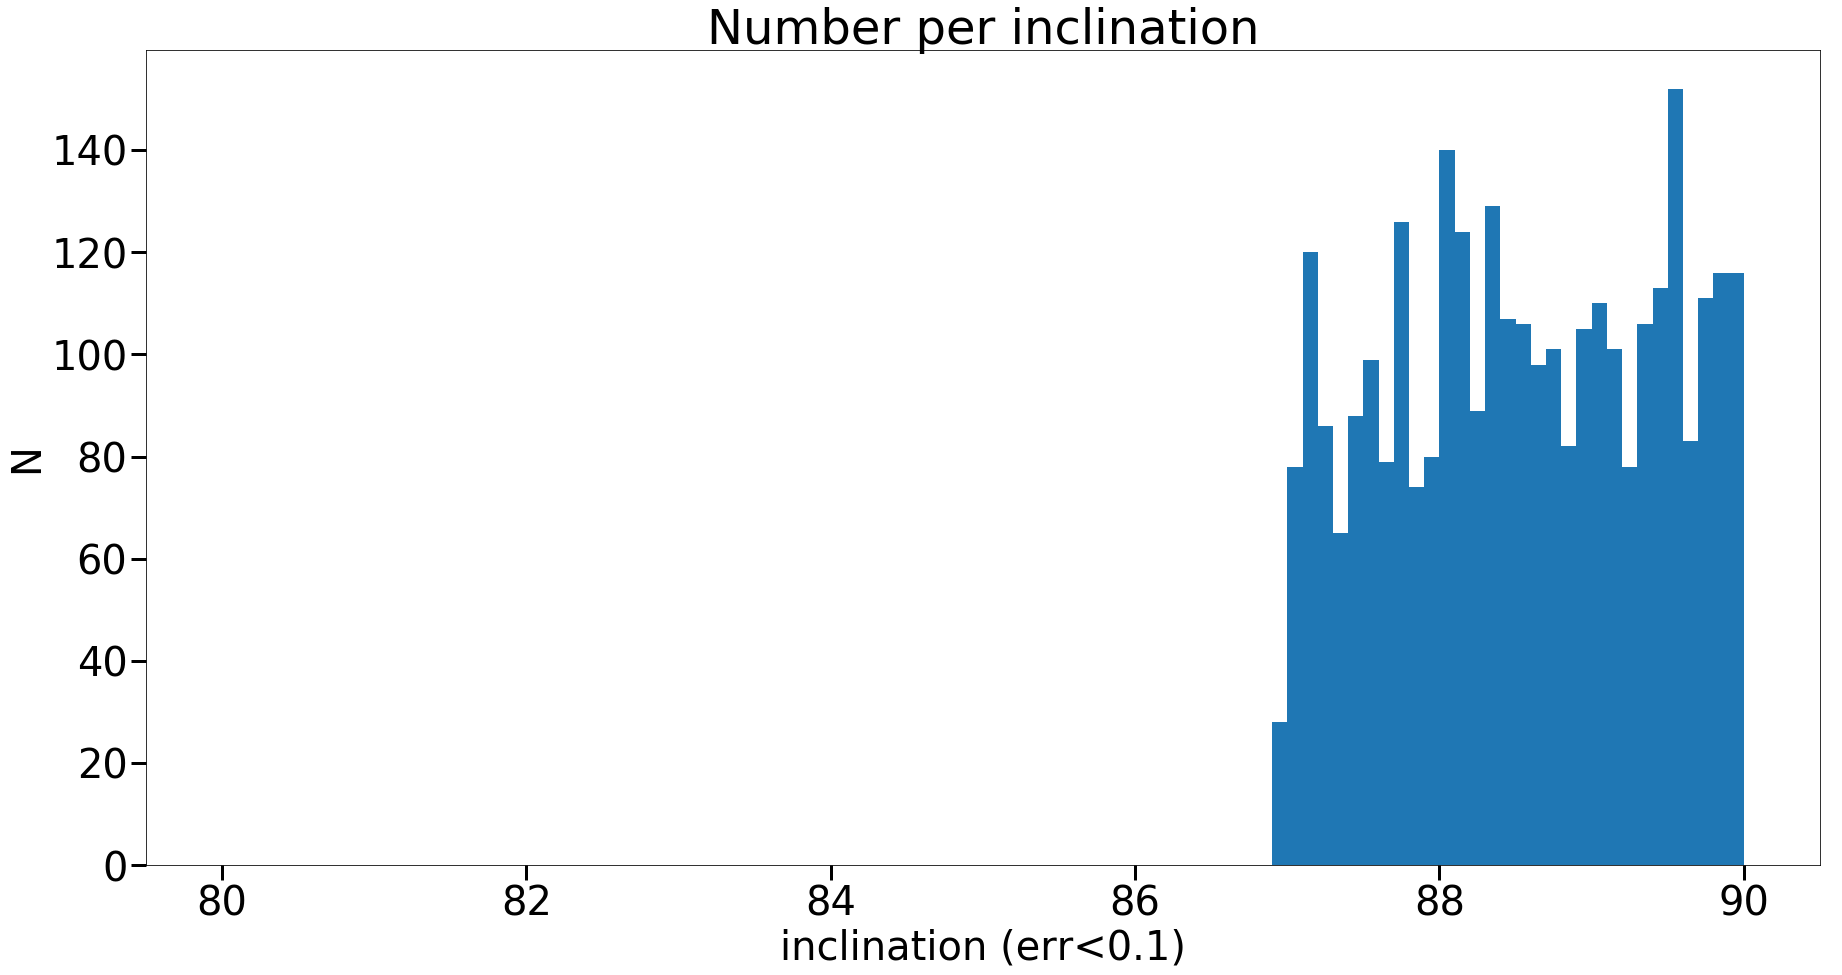

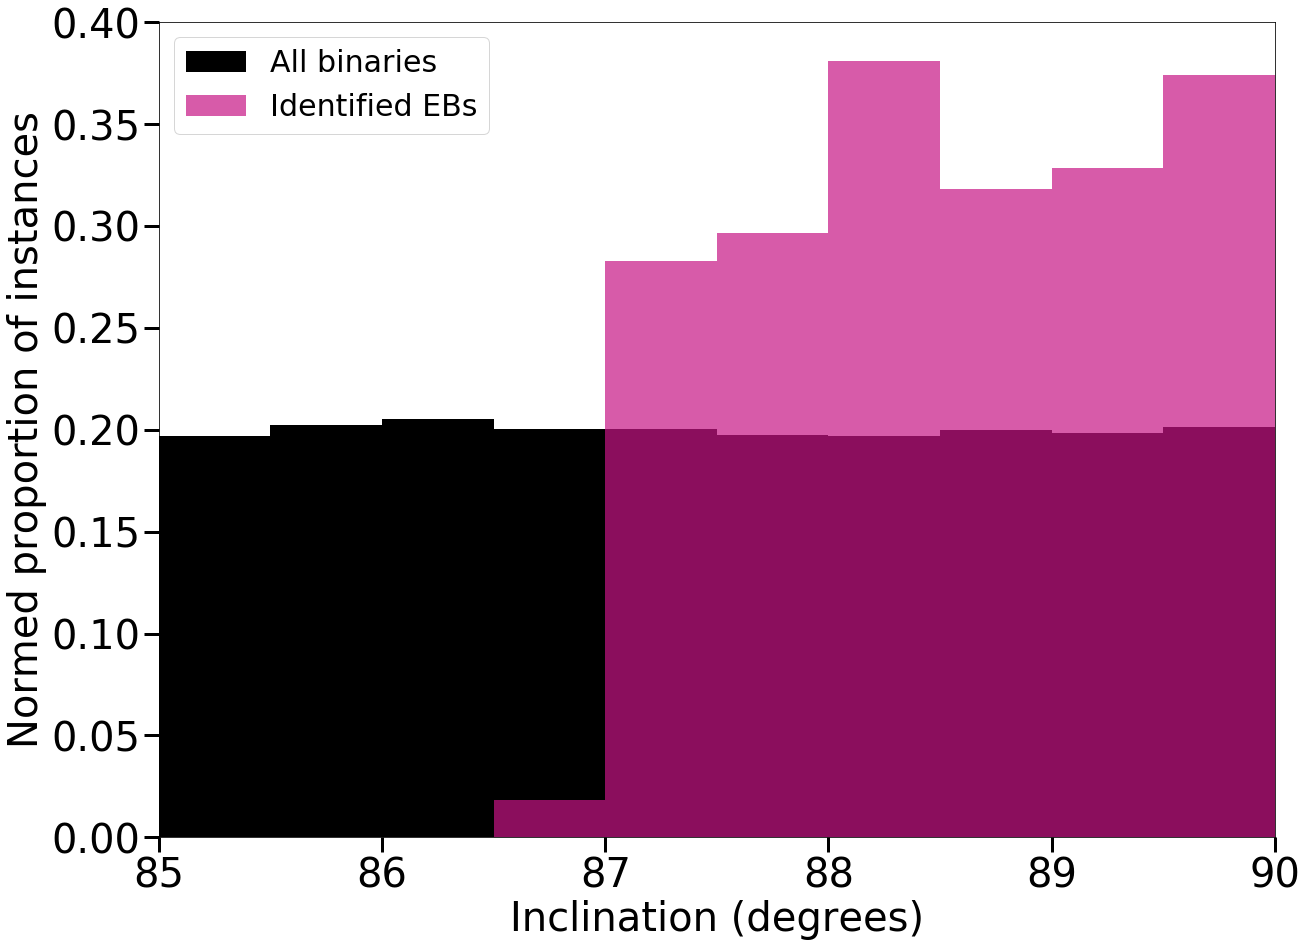

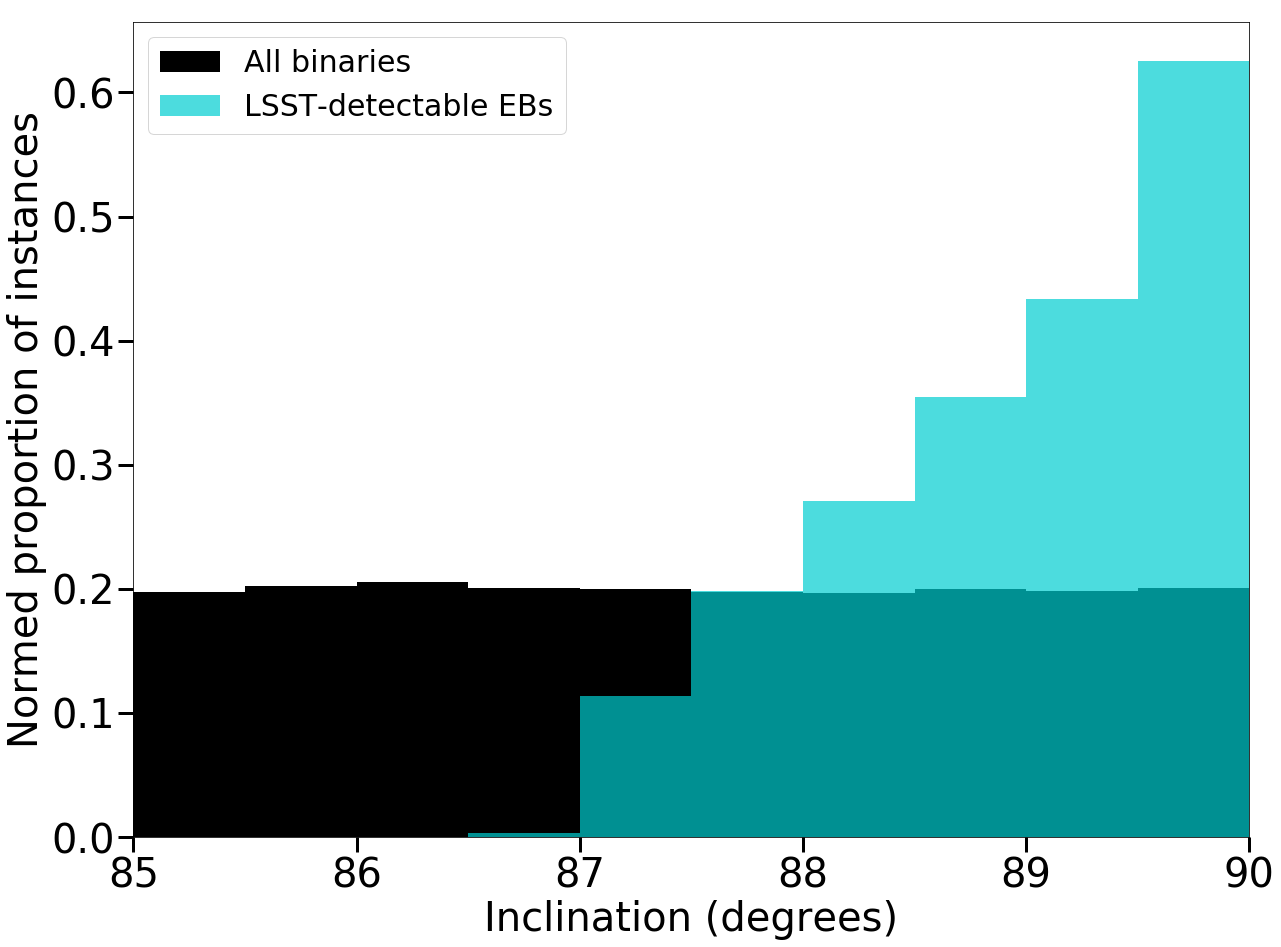

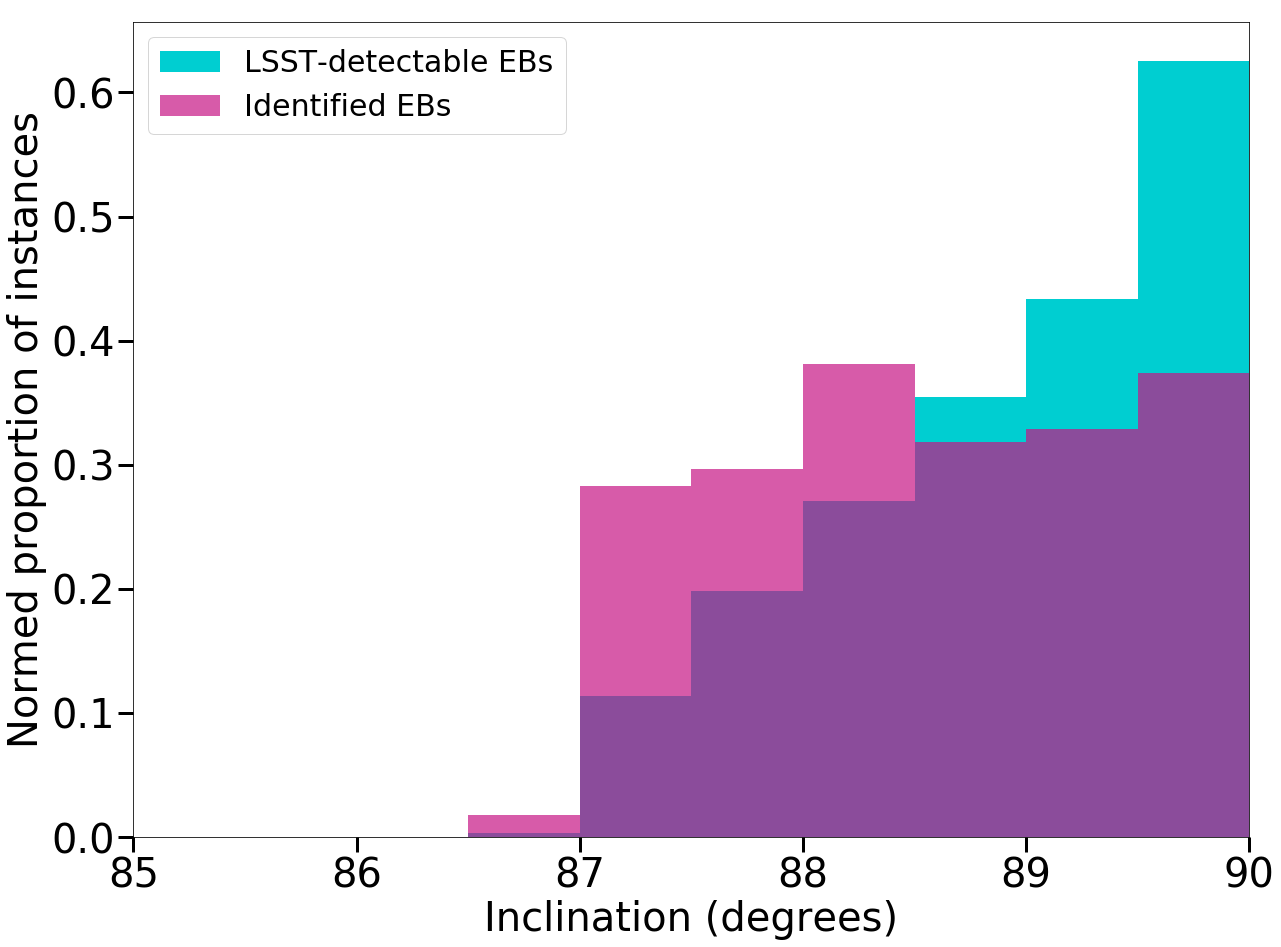

/anaconda/envs/NUREU17/lib/python3.6/site-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in true_divide


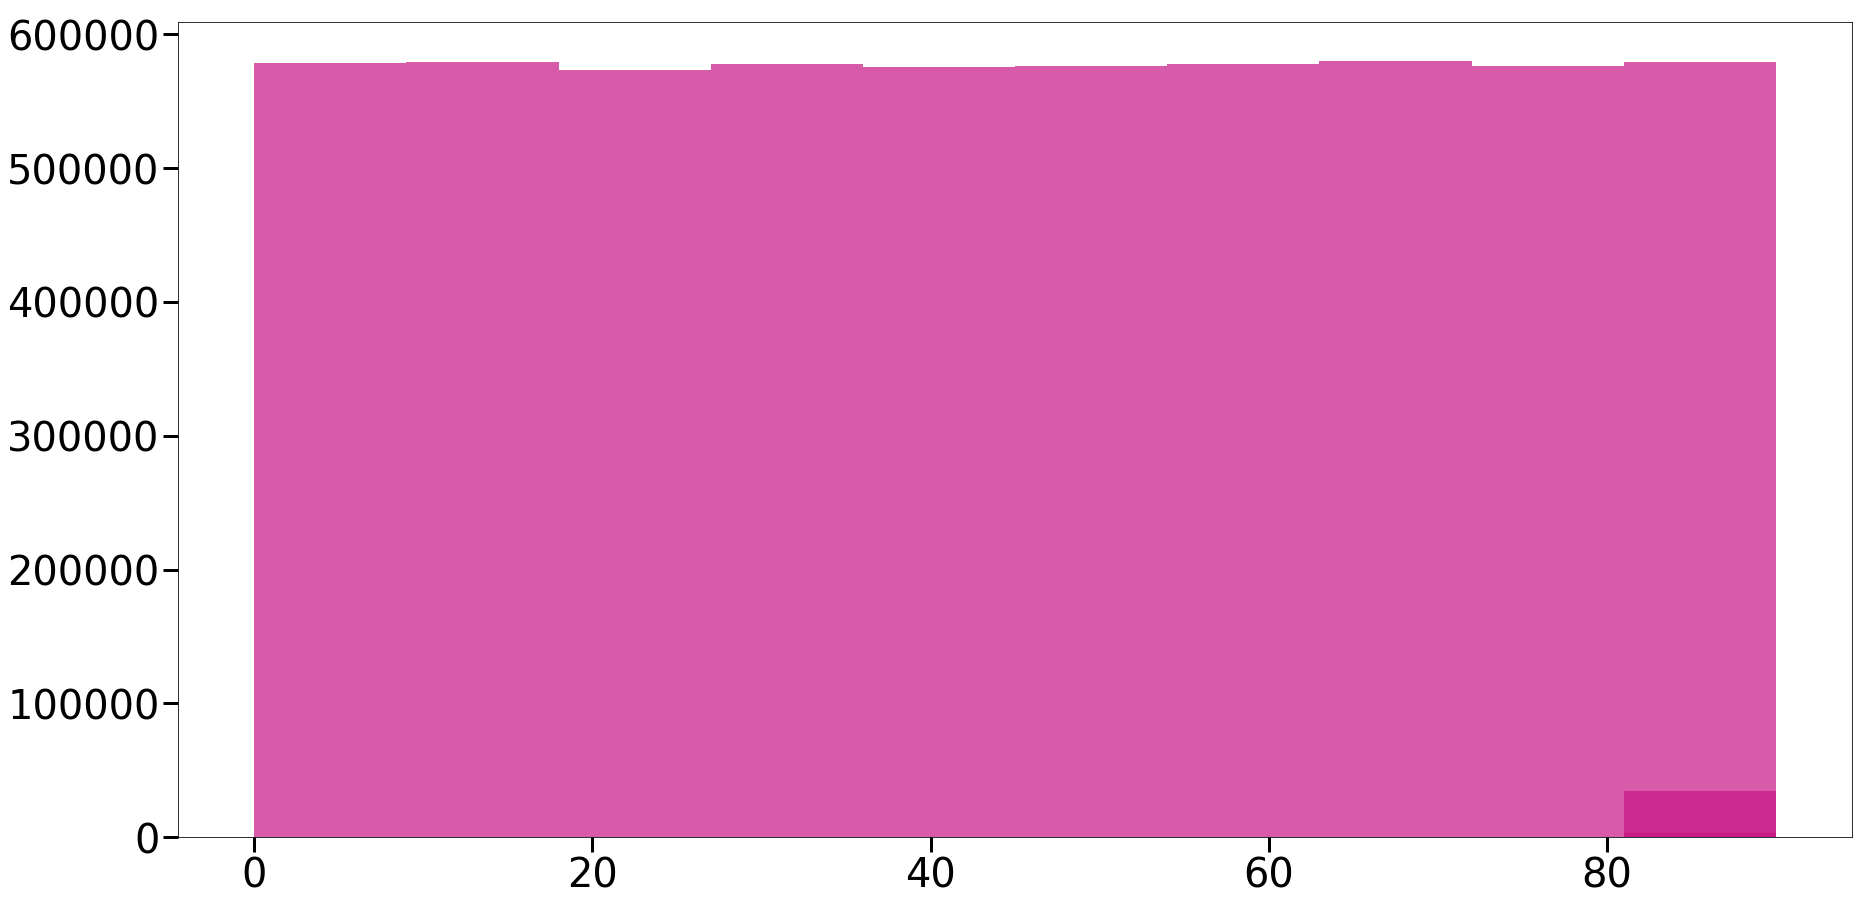

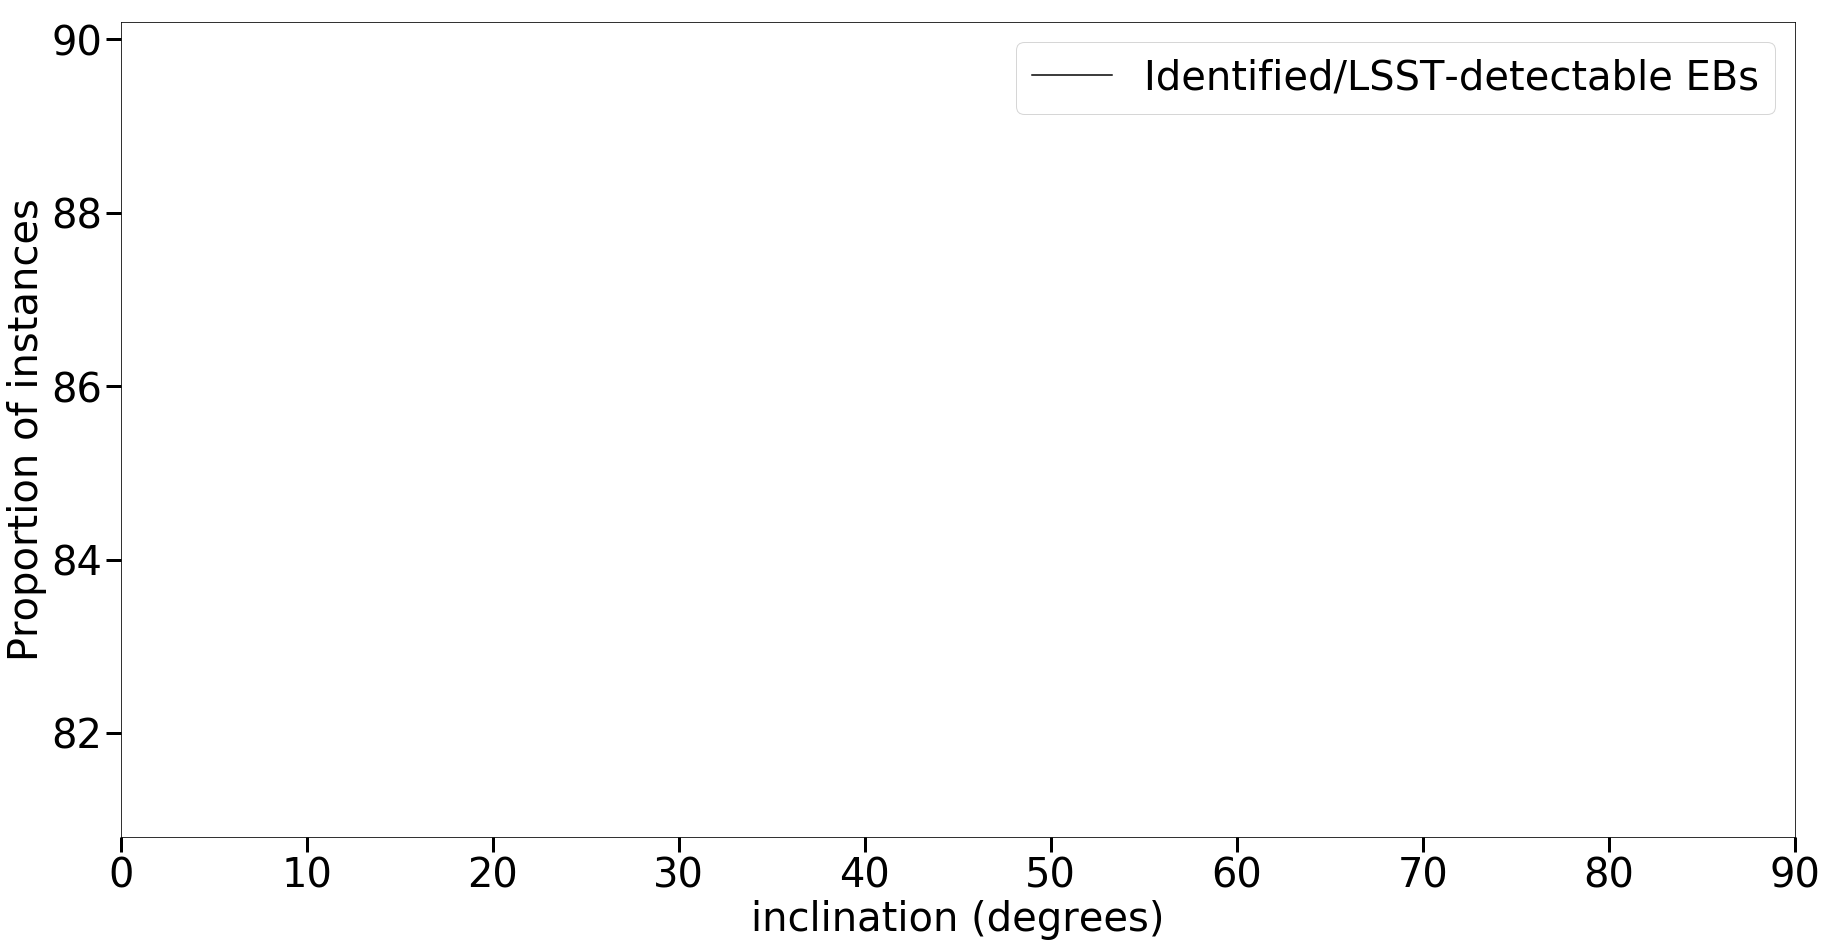

In [ ]:
fig = plt.figure(figsize=(30,15))
pylab.hist(INCL, bins = 100, range = (80, 90))
pylab.title('Number per inclination')
pylab.xlabel('inclination (degrees)')
pylab.ylabel('N')
pylab.show()

fig = plt.figure(figsize=(30,15))
pylab.hist(INCL[use], bins = 100, range = (80, 90))
pylab.title('Number per inclination')
pylab.xlabel('inclination (err<0.1)')
pylab.ylabel('N')
pylab.show()

ird = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(INCL, bins = 10, color = 'k', normed = True, label = "All binaries", range = (85,90))
n10, bins10, patches10 = plt.hist(INCL[use], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (85,90))
plt.xlabel('Inclination (degrees)')
plt.xlim([85,90])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
ird.set_rasterized(True)
ird.savefig("inclination_relativedistribution.eps")
ird.savefig("inclination_relativedistribution.pdf")

obsird = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(INCL, bins = 10, color = 'k', normed = True, label = "All binaries", range = (85,90))
n20, bins20, patches20 = plt.hist(INCL[obs], bins = 10, color = 'darkturquoise', alpha = 0.7, normed = True, label = "LSST-detectable EBs", range = (85,90))
#n10, bins10, patches10 = plt.hist(mass_rat[use], bins = 100, color = 'mediumvioletred', alpha = 0.5, normed = True, label = "Identified binaries")
plt.xlabel('Inclination (degrees)')
plt.xlim([85,90])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsird.set_rasterized(True)
obsird.savefig("incl_obs_relativedistribution.eps")
obsird.savefig("incl_obs_relativedistribution.pdf")

obsidird = plt.figure(figsize=(20,15))
#n, bins, patches = plt.hist(mass_rat, bins = 100, color = 'k', normed = True, label = "All binaries")
n20, bins20, patches20 = plt.hist(INCL[obs], bins = 10, color = 'darkturquoise', alpha = 1.0, normed = True, label = "LSST-detectable EBs", range = (85,90))
n10, bins10, patches10 = plt.hist(INCL[use], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (85,90))
plt.xlabel('Inclination (degrees)')
plt.xlim([85,90])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsidird.set_rasterized(True)
obsidird.savefig("incl_obsid_relativedistribution.eps")
obsidird.savefig("incl_obsid_relativedistribution.pdf")

newbins=[]

for i in range(len(bins)-1):
  newbins.append((bins[i] + bins[i+1])/2.)

#print ("bin length = ", len(bins), "   bins = ", bins)
#print ("newbin length = ", len(newbins), "   newbins = ", newbins)

#divhistird = plt.figure(figsize=(20,15))
#plt.step(newbins, n10/n, label="Identified/All binaries")
#plt.step(newbins, n20/n, label="LSST-Detectable/All binaries")
#plt.step(newbins, n10/n20, label="Identified/LSST-detectable")
#plt.xlabel('Inclination (degrees)')
#plt.ylabel('Normed proportion of instances')
#plt.legend(loc = "best", prop={'size': 30})
#plt.show()
#divhistird.set_rasterized(True)
#divhistird.savefig("incl_divhist.eps")
#divhistird.savefig("incl_divhist.pdf")


#densird = plt.figure(figsize=(30,15))
#sns.distplot(INCL, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'k', label = 'All binaries')
#sns.distplot(INCL[obs], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'darkturquoise', label = 'LSST-detectable EBs')
#sns.distplot(INCL[use], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'mediumvioletred', label = 'Identified EBs')
#plt.xlim([0,90])
#plt.xlabel('Inclination (degrees)')
#plt.ylabel('Proportion of instances')
#plt.legend(loc = "best")
#plt.show()
#densird.set_rasterized(True)
#densird.savefig("incl_dens.eps")
#densird.savefig("incl_dens.pdf")

fig = plt.figure(figsize=(30,15))
n1, bins1, patches1 = plt.hist(INCL, bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "All binaries", range = (0,90))
n11, bins11, patches11 = plt.hist(INCL[use], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "Identified EBs", range = (0,90))
n21, bins21, patches21 = plt.hist(INCL[obs], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "LSST-detectable EBs", range = (0,90))
plt.show

newbins1=[]

for i in range(len(bins1)-1):
  newbins1.append((bins1[i] + bins1[i+1])/2.)

densdivird1 = plt.figure(figsize=(30,15))
plt.step(n11/n21, newbins1, color = 'k', label = 'Identified/LSST-detectable EBs')
plt.xlim([0,90])
plt.xlabel('inclination (degrees)')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivird1.set_rasterized(True)
densdivird1.savefig("incl_ID-LD_dens.eps")
densdivird1.savefig("incl_ID-LD_dens.pdf")


densdivird2 = plt.figure(figsize=(30,15))
plt.step(n21/n1, newbins1, color = 'k', label = 'LSST-detectable/All binaries')
plt.xlim([0,90])
plt.xlabel('inclination (degrees)')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivird2.set_rasterized(True)
densdivird2.savefig("incl_LD-AB_dens.eps")
densdivird2.savefig("incl_LD-AB_dens.pdf")


densdivird3 = plt.figure(figsize=(30,15))
plt.step(n11/n1, newbins1, color = 'k', label = 'Identified/All binaries')
plt.xlim([0,90])
plt.xlabel('inclination (degrees)')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivird3.set_rasterized(True)
densdivird3.savefig("incl_ID-AB_dens.eps")
densdivird3.savefig("incl_ID-AB_dens.pdf")



stats.ks_2samp(INCL, INCL[use])

# APPARENT MAGNITUDE

## MAXIMUM

In [ ]:
fig = plt.figure(figsize=(30,15))
pylab.hist(MaxAppmag, bins = 100)
pylab.title('Number per maximum apparent magnitude')
pylab.xlabel('maximum apparent magnitude')
pylab.ylabel('N')
pylab.show()

fig = plt.figure(figsize=(30,15))
pylab.hist(MaxAppmag[use], bins = 100)
pylab.title('Number per maximum apparent magnitude')
pylab.xlabel('maximum apparent magnitude (err<0.1)')
pylab.ylabel('N')
pylab.show()

maxrd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(MaxAppmag, bins = 30, color = 'k', normed = True, label = "All binaries", range = (0,30))
n10, bins10, patches10 = plt.hist(MaxAppmag[use], bins = 30, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (0,30))
plt.xlabel('Maximum apparent magnitude')
plt.xlim([10,30])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
maxrd.set_rasterized(True)
maxrd.savefig("maxappmag_relativedistribution.eps")
maxrd.savefig("maxappmag_relativedistribution.pdf")

obsmaxrd = plt.figure(figsize=(20,15))
n, bins, patches = plt.hist(MaxAppmag, bins = 30, color = 'k', normed = True, label = "All binaries")
n20, bins20, patches20 = plt.hist(MaxAppmag[obs], bins = 30, color = 'darkturquoise', alpha = 0.7, normed = True, label = "LSST-detectable EBs", range = (0,30))
#n10, bins10, patches10 = plt.hist(mass_rat[use], bins = 100, color = 'mediumvioletred', alpha = 0.5, normed = True, label = "Identified binaries")
plt.xlabel('Maximum apparent magnitude')
plt.xlim([10,30])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsmaxrd.set_rasterized(True)
obsmaxrd.savefig("maxappmag_obs_relativedistribution.eps")
obsmaxrd.savefig("maxappmag_obs_relativedistribution.pdf")

obsidmaxrd = plt.figure(figsize=(20,15))
#n, bins, patches = plt.hist(mass_rat, bins = 100, color = 'k', normed = True, label = "All binaries")
n20, bins20, patches20 = plt.hist(MaxAppmag[obs], bins = 30, color = 'darkturquoise', alpha = 1.0, normed = True, label = "LSST-detectable EBs", range = (0,30))
n10, bins10, patches10 = plt.hist(MaxAppmag[use], bins = 30, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified EBs", range = (0,30))
plt.xlabel('Maximum apparent magnitude')
plt.xlim([10,25])
plt.ylabel('Normed proportion of instances')
plt.legend(loc = "best", prop={'size': 30})
plt.show()
obsidmaxrd.set_rasterized(True)
obsidmaxrd.savefig("maxappmag_obsid_relativedistribution.eps")
obsidmaxrd.savefig("maxappmag_obsid_relativedistribution.pdf")

newbins=[]

for i in range(len(bins)-1):
  newbins.append((bins[i] + bins[i+1])/2.)

#print ("bin length = ", len(bins), "   bins = ", bins)
#print ("newbin length = ", len(newbins), "   newbins = ", newbins)

#divhistamrd = plt.figure(figsize=(20,15))
#plt.step(newbins, n10/n, label="Identified/All binaries")
#plt.step(newbins, n20/n, label="LSST-Detectable/All binaries")
#plt.step(newbins, n10/n20, label="Identified/LSST-detectable")
#plt.xlabel('Maximum apparent magnitude')
#plt.ylabel('Normed proportion of instances')
#plt.legend(loc = "best", prop={'size': 30})
#plt.show()
#divhistamrd.set_rasterized(True)
#divhistamrd.savefig("maxappmag_divhist.eps")
#divhistamrd.savefig("maxappmag_divhist.pdf")


#densamrd = plt.figure(figsize=(30,15))
#sns.distplot(MaxAppmag, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'k', label = 'All binaries')
#sns.distplot(MaxAppmag[obs], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'darkturquoise', label = 'LSST-detectable EBs')
#n1 = sns.distplot(MaxAppmag[use], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color = 'mediumvioletred', label = 'Identified EBs')
#plt.xlim([0,20])
#plt.xlabel('Mass ratio')
#plt.ylabel('Proportion of instances')
#plt.legend(loc = "best")
#plt.show()
#densamrd.set_rasterized(True)
#densamrd.savefig("appmag_dens.eps")
#densamrd.savefig("appmag_dens.pdf")


fig = plt.figure(figsize=(30,15))
n1, bins1, patches1 = plt.hist(MaxAppmag, bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "All binaries", range = (10,30))
n11, bins11, patches11 = plt.hist(MaxAppmag[use], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "Identified EBs", range = (10,30))
n21, bins21, patches21 = plt.hist(MaxAppmag[obs], bins = 10, color = 'mediumvioletred', alpha = 0.7, normed = False, label = "LSST-detectable EBs", range = (10,30))
plt.show

newbins1=[]

for i in range(len(bins1)-1):
  newbins1.append((bins1[i] + bins1[i+1])/2.)

densdivard1 = plt.figure(figsize=(30,15))
plt.step(n11/n21, newbins1, color = 'k', label = 'Identified/LSST-detectable EBs')
plt.xlim([10,30])
plt.xlabel('apparent magnitude')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivard1.set_rasterized(True)
densdivard1.savefig("appmag_ID-LD_dens.eps")
densdivard1.savefig("appmag_ID-LD_dens.pdf")


densdivard2 = plt.figure(figsize=(30,15))
plt.step(n21/n1, newbins1, color= 'k', label = 'LSST-detectable/All binaries')
plt.xlim([10,30])
plt.xlabel('apparent magnitude')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivard2.set_rasterized(True)
densdivard2.savefig("appmag_LD-AB_dens.eps")
densdivard2.savefig("appmag_LD-AB_dens.pdf")


densdivard3 = plt.figure(figsize=(30,15))
plt.step(n11/n1, newbins1, color= 'k', label = 'Identified/All binaries')
plt.xlim([10,30])
plt.xlabel('apparent magnitude')
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
densdivard3.set_rasterized(True)
densdivard3.savefig("appmag_ID-AB_dens.eps")
densdivard3.savefig("appmag_ID-AB_dens.pdf")



stats.ks_2samp(MaxAppmag, MaxAppmag[use])

## AVERAGE
Not sure why this one never works?

fig = plt.figure(figsize=(30,15))
pylab.hist(delmag, bins = 100)
pylab.title('Number per base apparent magnitude')
pylab.xlabel('base apparent magnitude')
pylab.ylabel('N')
pylab.show()

fig = plt.figure(figsize=(30,15))
pylab.hist(delmag[use], bins = 100)
pylab.title('Number per base apparent magnitude')
pylab.xlabel('base apparent magnitude (err<0.1)')
pylab.ylabel('N')
pylab.show()

bamrd = plt.figure(figsize=(30,15))
n, bins, patches = plt.hist(delmag, bins = 100, color = 'k', normed = True, label = "All observed binaries")
n10, bins10, patches10 = plt.hist(delmag[use], bins = 100, color = 'mediumvioletred', alpha = 0.7, normed = True, label = "Identified binaries")
plt.xlabel('Base apparent magnitude')
#plt.xlim([10,30])
plt.ylabel('Proportion of instances')
plt.legend(loc = "best")
plt.show()
bamrd.set_rasterized(True)
bamrd.savefig("baseappmag_relativedistribution.eps")

bamcd = plt.figure(figsize=(30,15))
values, base = np.histogram(delmag, bins=np.sort(MaxAppmag))
cumulative = np.cumsum(values)
cumulative = cumulative/max(cumulative)
#make an additional cumulative dist for PeriodIn < 5d, or 10d?
plt.step(base[:-1], cumulative, linestyle = ':', linewidth = 5, color = 'k', label = "All observed binaries")
values, base = np.histogram(delmag[use], bins=np.sort(MaxAppmag[use]))
cumulative = np.cumsum(values)
cumulative = cumulative/max(cumulative)
plt.step(base[:-1], cumulative, linestyle = '-', linewidth = 5, color='k', label = "Identified binaries")
plt.xlabel("Base apparent magnitude")
plt.ylabel("Fraction of population")
plt.legend(loc = 'best')
#plt.xlim(80,90)
plt.show()
bamcd.set_rasterized(True)
bamcd.savefig("baseappmag_cumulativedistribution.eps")